<a href="https://colab.research.google.com/github/achmadarifin31/Machine-Learning/blob/main/DS70202_Achmad_Nurs_Syururi_Arifin_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 - Data Preparation

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Proses ekstraksi data
data_oecd_china = pd.read_csv('https://raw.githubusercontent.com/achmadarifin31/Assignment2DS_SC-KelC/main/OECD.ENV.EPI%2CDSD_GG%40DF_GREEN_GROWTH%2C%2BCHN.A....csv', sep=',')

# Tampilkan hasilnya
display(data_oecd_china)

STRUCTURE                              STRUCTURE_ID STRUCTURE_NAME  \
0     DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
1     DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
2     DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
3     DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
4     DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
...        ...                                       ...            ...   
2904  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
2905  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
2906  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
2907  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
2908  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   

     ACTION REF_AREA                Reference area FREQ  \
0         I      CHN  China (People’s Republic of)    A   
1         I      CHN  China (People’s Republic of)    A   
2         I      CHN  China (People’s Republic of)    A   
3         I      CHN  China (People’s Republic of)    A   
4         I      CHN  China (People’s Republic of)    A   
...     ...      ...                           ...  ...   
2904      I      CHN  China (People’s Republic of)    A   
2905      I      CHN  China (People’s Republic of)    A   
2906      I      CHN  China (People’s Republic of)    A   
2907      I      CHN  China (People’s Republic of)    A   
2908      I      CHN  China (People’s Republic of)    A   

     Frequency of observation        MEASURE  \
0                      Annual         GDP_PC   
1                      Annual         GDP_PC   
2                      Annual         GDP_PC   
3                      Annual         GDP_PC   
4                      Annual         GDP_PC   
...                       ...            ...   
2904                   Annual         GDP_PC   
2905                   Annual  CO2_AIRTRAGDP   
2906                   Annual  FOR_IF_EXTENT   
2907                   Annual        GPAT_DE   
2908                   Annual        PET_FFS   

                                               Measure    UNIT_MEASURE  \
0                                          Value added          PT_B1G   
1                                          Value added          PT_B1G   
2                                          Value added          PT_B1G   
3                                          Value added          PT_B1G   
4                                          Value added          PT_B1G   
...                                                ...             ...   
2904                                       Value added          PT_B1G   
2905  CO2 emissions from air transport per unit of GDP              KG   
2906                           Intact forest landscape             KM2   
2907   Development of environment-related technologies      INV_10P6HB   
2908                                 Petroleum support  PT_SUPP_FOS_FL   

                           Unit of measure ACTIVITY  \
0          Percentage of gross value added      BTE   
1          Percentage of gross value added      BTE   
2          Percentage of gross value added      BTE   
3          Percentage of gross value added      BTE   
4          Percentage of gross value added      BTE   
...                                    ...      ...   
2904       Percentage of gross value added      HTN   
2905                            Kilogramme       _T   
2906                     Square kilometres       _T   
2907  Inventions per 1 000 000 inhabitants       _T   
2908     Percentage of fossil fuel support       _T   

                   Economic activity  TIME_PERIOD  Time period  OBS_VALUE  \
0     Industry (except construction)         2007          NaN      47.04   
1     Industry (except construction)         2006          NaN      47.71   
2     Industry (except construction) 

Dataset tersebut berisi data yang berasal dari **OECD (Organization for Economic Co-operation and Development)** dengan fokus pada indikator green growth (pertumbuhan hijau) dari **negara China (CHN)**

In [ ]:
# akses informasi umum pada data
data_oecd_china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STRUCTURE                 2909 non-null   object 
 1   STRUCTURE_ID              2909 non-null   object 
 2   STRUCTURE_NAME            2909 non-null   object 
 3   ACTION                    2909 non-null   object 
 4   REF_AREA                  2909 non-null   object 
 5   Reference area            2909 non-null   object 
 6   FREQ                      2909 non-null   object 
 7   Frequency of observation  2909 non-null   object 
 8   MEASURE                   2909 non-null   object 
 9   Measure                   2909 non-null   object 
 10  UNIT_MEASURE              2909 non-null   object 
 11  Unit of measure           2909 non-null   object 
 12  ACTIVITY                  2909 non-null   object 
 13  Economic activity         2909 non-null   object 
 14  TIME_PER

Pada dataset China terdapat **2.909 baris** dan **32 kolom** dengan berbagai tipe data yaitu Object (21 kolom), Int64 (2 kolom), Float64 (9 kolom). Beberapa kolom memiliki data yang hilang atau kosong, dan ada juga kolom yang tampak redundan. Sebelum melakukan analisis lebih lanjut, diperlukan **pembersihan data** untuk menghapus kolom yang kosong, mengatasi kolom duplikat, dan menangani nilai yang hilang.

# **C. Data Preparation**

**Memilih kolom yang akan dipakai**

In [ ]:
# Definisikan kolom yang dibutuhkan
column = ['Reference area', 'Measure', 'Unit of measure', 'Economic activity', 'TIME_PERIOD', 'OBS_VALUE', 'Unit multiplier']

# Ambil kolom yang dibutuhkan saja
data_oecd_china = data_oecd_china.loc[:, column]

# Ubah nama kolom menjadi lowercase dan ubah spasi menjadi underscore
data_oecd_china.columns = data_oecd_china.columns.str.lower().str.replace(' ', '_')

# Tampilkan hasilnya
display(data_oecd_china)

reference_area  \
0     China (People’s Republic of)   
1     China (People’s Republic of)   
2     China (People’s Republic of)   
3     China (People’s Republic of)   
4     China (People’s Republic of)   
...                            ...   
2904  China (People’s Republic of)   
2905  China (People’s Republic of)   
2906  China (People’s Republic of)   
2907  China (People’s Republic of)   
2908  China (People’s Republic of)   

                                               measure  \
0                                          Value added   
1                                          Value added   
2                                          Value added   
3                                          Value added   
4                                          Value added   
...                                                ...   
2904                                       Value added   
2905  CO2 emissions from air transport per unit of GDP   
2906                           Intact forest landscape   
2907   Development of environment-related technologies   
2908                                 Petroleum support   

                           unit_of_measure               economic_activity  \
0          Percentage of gross value added  Industry (except construction)   
1          Percentage of gross value added  Industry (except construction)   
2          Percentage of gross value added  Industry (except construction)   
3          Percentage of gross value added  Industry (except construction)   
4          Percentage of gross value added  Industry (except construction)   
...                                    ...                             ...   
2904       Percentage of gross value added                        Services   
2905                            Kilogramme          Total - all activities   
2906                     Square kilometres          Total - all activities   
2907  Inventions per 1 000 000 inhabitants          Total - all activities   
2908     Percentage of fossil fuel support          Total - all activities   

      time_period  obs_value unit_multiplier  
0            2007      47.04           Units  
1            2006      47.71           Units  
2            2005      47.17           Units  
3            2004      46.03           Units  
4            2003      45.75           Units  
...           ...        ...             ...  
2904         2008      42.38           Units  
2905         2021       3.55           Units  
2906         2013   40151.22           Units  
2907         2008       0.77           Units  
2908         2014      84.30           Units  

[2909 rows x 7 columns]

**Membuat tabel master**

In [ ]:
# Hapus duplikasi
master_measure = data_oecd_china[['economic_activity', 'measure', 'unit_of_measure', 'unit_multiplier']].drop_duplicates()

# Urutkan data
master_measure = master_measure.sort_values(by = ['measure', 'economic_activity'], ignore_index = True)

# Simpan ke excel
master_measure.to_excel('Master Measure.xlsx', index = False, engine = 'openpyxl')

# Tampilkan hasilnya
master_measure

economic_activity  \
0    Total - all activities   
1    Total - all activities   
2    Total - all activities   
3    Total - all activities   
4    Total - all activities   
..                      ...   
156  Total - all activities   
157  Total - all activities   
158  Total - all activities   
159  Total - all activities   
160  Total - all activities   

                                               measure  \
0        Access to drinking water and sewage treatment   
1                   Adjustment for pollution abatement   
2          CO2 emissions from air transport per capita   
3     CO2 emissions from air transport per unit of GDP   
4                                         Coal support   
..                                                 ...   
156  Welfare costs of premature mortalities from ex...   
157  Welfare costs of premature mortalities from ex...   
158  Welfare costs of premature mortalities from ex...   
159  Welfare costs of premature mortalities from ex...   
160                                 Wildlife resources   

                         unit_of_measure unit_multiplier  
0                            Unspecified           Units  
1                      Percentage points           Units  
2    Tonnes of CO2-equivalent per person           Units  
3                             Kilogramme           Units  
4      Percentage of fossil fuel support           Units  
..                                   ...             ...  
156                    Percentage of GDP           Units  
157                    Percentage of GDP           Units  
158                    Percentage of GDP           Units  
159                    Percentage of GDP           Units  
160                          Unspecified           Units  

[161 rows x 4 columns]

**Menggabungkan kolom measure dengan colom economic_activity**

In [ ]:
# Gabungkan kolom
data_oecd_china['measure'] = data_oecd_china['measure'] + ' (' + data_oecd_china['economic_activity'] + ')'

# Tampilkan hasilnya
display(data_oecd_china.head())

reference_area                                       measure  \
0  China (People’s Republic of)  Value added (Industry (except construction))   
1  China (People’s Republic of)  Value added (Industry (except construction))   
2  China (People’s Republic of)  Value added (Industry (except construction))   
3  China (People’s Republic of)  Value added (Industry (except construction))   
4  China (People’s Republic of)  Value added (Industry (except construction))   

                   unit_of_measure               economic_activity  \
0  Percentage of gross value added  Industry (except construction)   
1  Percentage of gross value added  Industry (except construction)   
2  Percentage of gross value added  Industry (except construction)   
3  Percentage of gross value added  Industry (except construction)   
4  Percentage of gross value added  Industry (except construction)   

   time_period  obs_value unit_multiplier  
0         2007      47.04           Units  
1         2006      47.71           Units  
2         2005      47.17           Units  
3         2004      46.03           Units  
4         2003      45.75           Units

**Menghapus kolom econimic_activity**

In [ ]:
# Hapus kolom economic_activity
data_oecd_china = data_oecd_china.drop(columns = 'economic_activity')

# Tampilkan hasilnya
display(data_oecd_china.head())

reference_area                                       measure  \
0  China (People’s Republic of)  Value added (Industry (except construction))   
1  China (People’s Republic of)  Value added (Industry (except construction))   
2  China (People’s Republic of)  Value added (Industry (except construction))   
3  China (People’s Republic of)  Value added (Industry (except construction))   
4  China (People’s Republic of)  Value added (Industry (except construction))   

                   unit_of_measure  time_period  obs_value unit_multiplier  
0  Percentage of gross value added         2007      47.04           Units  
1  Percentage of gross value added         2006      47.71           Units  
2  Percentage of gross value added         2005      47.17           Units  
3  Percentage of gross value added         2004      46.03           Units  
4  Percentage of gross value added         2003      45.75           Units

**Melakukan vipot table**

In [ ]:
# Lakukan pivot table
pvt_data_oecd_china = pd.pivot_table(
    data_oecd_china,
    index = ['reference_area', 'time_period'],
    columns = 'measure',
    values = 'obs_value',
).reset_index()

# Tampilkan hasilnya
display(pvt_data_oecd_china.head(10))

measure                reference_area  time_period  \
0        China (People’s Republic of)         2000   
1        China (People’s Republic of)         2001   
2        China (People’s Republic of)         2002   
3        China (People’s Republic of)         2003   
4        China (People’s Republic of)         2004   
5        China (People’s Republic of)         2005   
6        China (People’s Republic of)         2006   
7        China (People’s Republic of)         2007   
8        China (People’s Republic of)         2008   
9        China (People’s Republic of)         2009   

measure  Adjustment for pollution abatement (Total - all activities)  \
0                                                    -0.04             
1                                                    -0.41             
2                                                    -0.99             
3                                                    -1.51             
4                                                    -1.51             
5                                                    -1.33             
6                                                    -1.03             
7                                                    -1.06             
8                                                    -0.79             
9                                                    -0.71             

measure  CO2 emissions from air transport per capita (Total - all activities)  \
0                                                      NaN                      
1                                                      NaN                      
2                                                      NaN                      
3                                                      NaN                      
4                                                      NaN                      
5                                                      NaN                      
6                                                      NaN                      
7                                                      NaN                      
8                                                      NaN                      
9                                                      NaN                      

measure  CO2 emissions from air transport per unit of GDP (Total - all activities)  \
0                                                      NaN                           
1                                                      NaN                           
2                                                      NaN                           
3                                                      NaN                           
4                                                      NaN                           
5                                                      NaN                           
6                                                      NaN                           
7                                                      NaN                           
8                                                      NaN                           
9                                                      NaN                           

measure  Coal support (Total - all activities)  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
5                                          NaN   
6                                          NaN   
7                                          NaN   
8                                          NaN   
9                                          NaN   

measure  Consumption of biomass (Total - all activities)  \
0                                                  27.17   
1                                                  26.17   
2                                         

## C.1.1 Missing value

In [ ]:
# Tampilkan jumlah data
print(f'Jumlah Data : {pvt_data_oecd_china.shape[0]} Baris\n')

# Hitung missing value
data_kosong = pvt_data_oecd_china.isna().sum().to_frame(name = 'Jumlah Missing Value').reset_index()
data_kosong['Persentase NULL %'] = 100 * (data_kosong['Jumlah Missing Value'] /pvt_data_oecd_china.shape[0]).round(4)

# Tampilkan hasilnya
data_kosong = data_kosong.style\
    .map(lambda val : 'background-color: red' if val > 50 else '', subset=['Persentase NULL %'])\
    .format({'Persentase NULL %': '{:.2f}'})

display(data_kosong)

Jumlah Data : 23 Baris



Mengatasi missing value

In [ ]:
from sklearn.impute import SimpleImputer

# Threshold untuk menghapus kolom dengan missing value
threshold_drop = 90

# Hitung persentase missing value
missing_percentage = (pvt_data_oecd_china.isna().sum() / len(pvt_data_oecd_china)) * 100

# Drop kolom dengan missing value lebih dari 90%
data_cleaned = pvt_data_oecd_china.loc[:, missing_percentage < threshold_drop]

# Pisahkan kolom numerik dan kategorikal
numerical_cols = data_cleaned.select_dtypes(include=['number']).columns
categorical_cols = data_cleaned.select_dtypes(exclude=['number']).columns

# Imputation hanya pada kolom numerik menggunakan SimpleImputer dengan median
imputer = SimpleImputer(strategy='median')  # Menggunakan median
data_imputed_numerical = pd.DataFrame(imputer.fit_transform(data_cleaned[numerical_cols]), columns=numerical_cols)

# Gabungkan kembali data numerik yang telah diimputasi dengan kolom kategorikal
data_china = pd.concat([data_imputed_numerical, data_cleaned[categorical_cols]], axis=1)

# Ubah kolom 'time_period' menjadi integer (hilangkan desimal)
if 'time_period' in data_china.columns:
    data_china['time_period'] = data_china['time_period'].astype(int)

# Tampilkan hasilnya setelah drop, imputasi, dan konversi tipe
print(f"\nJumlah data setelah drop dan imputasi: {data_china.shape[0]} baris, {data_china.shape[1]} kolom\n")
display(data_china.head())



Jumlah data setelah drop dan imputasi: 23 baris, 103 kolom



measure  time_period  \
0               2000   
1               2001   
2               2002   
3               2003   
4               2004   

measure  Adjustment for pollution abatement (Total - all activities)  \
0                                                    -0.04             
1                                                    -0.41             
2                                                    -0.99             
3                                                    -1.51             
4                                                    -1.51             

measure  CO2 emissions from air transport per capita (Total - all activities)  \
0                                                    57.04                      
1                                                    57.04                      
2                                                    57.04                      
3                                                    57.04                      
4                                                    57.04                      

measure  CO2 emissions from air transport per unit of GDP (Total - all activities)  \
0                                                     4.16                           
1                                                     4.16                           
2                                                     4.16                           
3                                                     4.16                           
4                                                     4.16                           

measure  Coal support (Total - all activities)  \
0                                        19.79   
1                                        19.79   
2                                        19.79   
3                                        19.79   
4                                        19.79   

measure  Consumption of biomass (Total - all activities)  \
0                                                  27.17   
1                                                  26.17   
2                                                  25.25   
3                                                  22.77   
4                                                  22.03   

measure  Consumption of metals (Total - all activities)  \
0                                                  6.19   
1                                                  6.22   
2                                                  6.46   
3                                                  6.82   
4                                                  7.47   

measure  Consumption of non-metallic minerals (Total - all activities)  \
0                                                    66.64               
1                                                    67.61               
2                                                    68.30               
3                                                    70.41               
4                                                    70.49               

measure  Contribution of natural capital (Total - all activities)  \
0                                                     0.05          
1                                                     0.04          
2                                                     0.08          
3                                                     0.19          
4                                                     0.39          

measure  Demand-based CO2 emissions (Total - all activities)  \
0                                                  1422.98     
1                                                  1515.45     
2                                                  1622.61     
3                                                  1804.77     
4                                                  2005.74     

measure  Demand-based CO2 intensity energy-related CO2 per capita (Total - all activities)  \
0                                                     2.13    

## C.1.2 Duplikasi Data

In [ ]:
print(f'Banyak duplikasi pada data : {data_china.duplicated().sum()}')

Banyak duplikasi pada data : 0


# C.1.3 Outlier

In [ ]:
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

In [ ]:
import pandas as pd

# Definisikan fungsi untuk mendeteksi outliers
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Ambil kolom numerik tanpa kolom 'time_period'
number_column = data_china.select_dtypes(include='number').drop(columns=['time_period'])

# List untuk menyimpan jumlah outlier
list_jumlah_outlier = []

# Hitung jumlah outlier untuk setiap kolom
for col in number_column.columns:
    jumlah_outlier = detect_outliers(number_column[col]).sum()
    list_jumlah_outlier.append(jumlah_outlier)

# Buat DataFrame untuk menampilkan hasil
data_outlier = pd.DataFrame({
    'measure': number_column.columns,
    'Jumlah Outlier': list_jumlah_outlier,
})

# Tampilkan hasil dengan style
style_data_outlier = data_outlier.style\
    .map(lambda val: 'background-color: red' if val > 0 else '', subset=['Jumlah Outlier'])

# Tampilkan hasil
display(style_data_outlier)

In [ ]:
# feature encoding
data_china = pd.get_dummies(data_china, columns=['reference_area'])
data_china.head()

time_period  Adjustment for pollution abatement (Total - all activities)  \
0         2000                                              -0.04             
1         2001                                              -0.41             
2         2002                                              -0.99             
3         2003                                              -1.51             
4         2004                                              -1.51             

   CO2 emissions from air transport per capita (Total - all activities)  \
0                                              57.04                      
1                                              57.04                      
2                                              57.04                      
3                                              57.04                      
4                                              57.04                      

   CO2 emissions from air transport per unit of GDP (Total - all activities)  \
0                                               4.16                           
1                                               4.16                           
2                                               4.16                           
3                                               4.16                           
4                                               4.16                           

   Coal support (Total - all activities)  \
0                                  19.79   
1                                  19.79   
2                                  19.79   
3                                  19.79   
4                                  19.79   

   Consumption of biomass (Total - all activities)  \
0                                            27.17   
1                                            26.17   
2                                            25.25   
3                                            22.77   
4                                            22.03   

   Consumption of metals (Total - all activities)  \
0                                            6.19   
1                                            6.22   
2                                            6.46   
3                                            6.82   
4                                            7.47   

   Consumption of non-metallic minerals (Total - all activities)  \
0                                              66.64               
1                                              67.61               
2                                              68.30               
3                                              70.41               
4                                              70.49               

   Contribution of natural capital (Total - all activities)  \
0                                               0.05          
1                                               0.04          
2                                               0.08          
3                                               0.19          
4                                               0.39          

   Demand-based CO2 emissions (Total - all activities)  \
0                                            1422.98     
1                                            1515.45     
2                                            1622.61     
3                                            1804.77     
4                                            2005.74     

   Demand-based CO2 intensity energy-related CO2 per capita (Total - all activities)  \
0                                               2.13                                   
1                                               2.25                                   
2                                               2.40                                   
3                                               2.65                                   
4                                               2.93                                   

   Demand-based CO2 p

In [ ]:
desc = data_china.describe()
q1 = desc.loc["25%"]
q3 = desc.loc["75%"]
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Clipping seluruh kolom numerik secara langsung
data_china = data_china.clip(lower=lower_bound, upper=upper_bound, axis=1)

data_china.head()

time_period  Adjustment for pollution abatement (Total - all activities)  \
0         2000                                              -0.41             
1         2001                                              -0.41             
2         2002                                              -0.99             
3         2003                                              -1.18             
4         2004                                              -1.18             

   CO2 emissions from air transport per capita (Total - all activities)  \
0                                              57.04                      
1                                              57.04                      
2                                              57.04                      
3                                              57.04                      
4                                              57.04                      

   CO2 emissions from air transport per unit of GDP (Total - all activities)  \
0                                               4.16                           
1                                               4.16                           
2                                               4.16                           
3                                               4.16                           
4                                               4.16                           

   Coal support (Total - all activities)  \
0                                  19.79   
1                                  19.79   
2                                  19.79   
3                                  19.79   
4                                  19.79   

   Consumption of biomass (Total - all activities)  \
0                                            27.17   
1                                            26.17   
2                                            25.25   
3                                            22.77   
4                                            22.03   

   Consumption of metals (Total - all activities)  \
0                                            6.19   
1                                            6.22   
2                                            6.46   
3                                            6.82   
4                                            7.47   

   Consumption of non-metallic minerals (Total - all activities)  \
0                                              66.64               
1                                              67.61               
2                                              68.30               
3                                              70.41               
4                                              70.49               

   Contribution of natural capital (Total - all activities)  \
0                                               0.05          
1                                               0.04          
2                                               0.08          
3                                               0.19          
4                                               0.39          

   Demand-based CO2 emissions (Total - all activities)  \
0                                            1422.98     
1                                            1515.45     
2                                            1622.61     
3                                            1804.77     
4                                            2005.74     

   Demand-based CO2 intensity energy-related CO2 per capita (Total - all activities)  \
0                                               2.13                                   
1                                               2.25                                   
2                                               2.40                                   
3                                               2.65                                   
4                                               2.93                                   

   Demand-based CO2 p

# C. 1.4 Imbalance Data

**Imbalance data adalah situasi di mana distribusi kelas pada dataset tidak seimbang, artinya salah satu atau beberapa kelas memiliki jumlah contoh yang jauh lebih sedikit dibandingkan kelas lainnya. Pada dataset ini dikarenakan belum mengarah pada suatu kasus, imbalance data belum diperlukan karena pada nantinya imbalance data akan berpengaruh jika terdapat data mayoritas dan minoritas yang nantinya lebih berfokus pada data mayoritas yang menyebakan model kurang efektik.**

# C. 1.5 Feature Encoding

**Feature encoding adalah proses mengubah fitur atau variabel kategori (non-numerik) dalam dataset menjadi bentuk numerik agar bisa diproses oleh algoritma machine learning. Metode umum dalam feature encoding adalah label encoding, one-hot encoding, ordinal encoding. Pada datasest ini kami telah menggunakan feature encoding pada bagian outlier yaitu:

`pd.get_dummies(data_china, columns=['reference_area']):`

Pada bagian tersebut reference area digunakan fungsi pd.get_dummies(), fungsi ini digunakan untuk mengubah kolom kategori menjadi beberapa kolom biner (0 atau 1). Yang dimana pada feature encoding tersebut menggunakan one-hor encoding.


#C.2 Statistics for Data Science & Exploratory Data Analysis (EDA)



```
# This is formatted as code
```

## C.2.1. Mengelaborasi features dan tipe data (nominal, ordinal, numerical)

Dalam analisis data, features (atau variabel) adalah atribut atau karakteristik yang mewakili aspek data yang akan dianalisis. Setiap feature memiliki tipe data tertentu yang membantu menentukan cara penanganannya. Tipe data ini biasanya dibagi menjadi tiga kategori utama: nominal, ordinal, dan numerical.
1. Nominal Data (Data Nominal)
- Nominal adalah tipe data kategorikal yang tidak memiliki urutan atau hierarki. Setiap nilai dalam data nominal merupakan kategori atau label, dan tidak ada peringkat antara kategori tersebut.
- Analisis nominal sering melibatkan perhitungan frekuensi atau proporsi untuk masing-masing kategori. Contoh grafik yang sering digunakan untuk tipe data ini adalah diagram batang atau pie chart.
2. Ordinal Data (Data Ordinal)
- Ordinal adalah tipe data kategorikal yang memiliki urutan atau peringkat. Namun, perbedaan antara kategori tidak selalu sama atau dapat diukur secara kuantitatif. Data ordinal mengindikasikan tingkatan, tetapi tidak memberikan informasi tentang seberapa besar perbedaan antar tingkatan.
- Data ordinal sering digunakan dalam survei atau penilaian. Karena urutan penting, metode statistik tertentu yang mempertimbangkan urutan bisa diterapkan, seperti median.
3. Numerical Data (Data Numerik)
- Numerical adalah tipe data kuantitatif yang terdiri dari angka dan memiliki makna matematis. Data numerik dapat diukur dan dioperasikan dengan fungsi matematika seperti penambahan, pengurangan, rata-rata, dan sebagainya. Terdapat dua sub-kategori dalam data numerik
- Numerical data paling sering digunakan dalam analisis statistik yang memerlukan perhitungan nilai rata-rata (mean), standar deviasi, regresi, dll. Visualisasi yang umum digunakan untuk data ini adalah histogram, scatter plot, dan boxplot.

In [ ]:
display(data_china.dtypes)

time_period                                                                                             int64
Adjustment for pollution abatement (Total - all activities)                                           float64
CO2 emissions from air transport per capita (Total - all activities)                                  float64
CO2 emissions from air transport per unit of GDP (Total - all activities)                             float64
Coal support (Total - all activities)                                                                 float64
                                                                                                       ...   
Welfare costs of premature mortalities from exposure to ambient PM2.5 (Total - all activities)        float64
Welfare costs of premature mortalities from exposure to ambient ozone (Total - all activities)        float64
Welfare costs of premature mortalities from exposure to lead (Total - all activities)                 float64
Welfare costs of premature mortalities from exposure to residential radon (Total - all activities)    float64
reference_area_China (People’s Republic of)                                                            object
Length: 103, dtype: object

## C.2.2. Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus

Dalam analisis data, mean, median, dan modus adalah tiga ukuran pemusatan data yang digunakan untuk memberikan informasi tentang karakteristik suatu distribusi. Masing-masing memiliki kondisi penggunaan yang berbeda tergantung pada bentuk dan sifat data.
1. Mean (Rata-rata)
- Mean adalah jumlah total nilai dari semua pengamatan dibagi dengan jumlah pengamatan tersebut. Mean adalah ukuran pemusatan yang paling umum digunakan, terutama untuk data yang terdistribusi secara simetris atau normal.
- Mean paling cocok digunakan ketika data bersifat numerical dan tidak memiliki outlier yang signifikan (nilai ekstrim). Mean efektif digunakan jika distribusi data simetris dan terdistribusi normal.

2. Median (Nilai Tengah)
- Median adalah nilai tengah dari suatu dataset yang sudah diurutkan. Jika jumlah pengamatan adalah ganjil, median adalah nilai di posisi tengah; jika jumlah pengamatan genap, median adalah rata-rata dari dua nilai tengah.
- Median digunakan ketika ada outlier atau data yang memiliki distribusi asimetri (skewed). Median lebih cocok digunakan untuk data yang tidak mengikuti distribusi normal atau data dengan rentang nilai yang besar dan memiliki skewed distribution.

3. Modus (Nilai Yang Sering Muncul)
- Modus adalah nilai yang paling sering muncul dalam suatu dataset. Modus dapat digunakan untuk data numerical, nominal, atau ordinal.
- Ini paling berguna untuk data kategorikal (nominal atau ordinal), Misalnya mencari frekuensi wilayah yang paling sering diamati (dalam kolom REF_AREA) atau frekuensi tindakan (ACTION) yang paling sering dilakukan. Modus juga dapat diterapkan pada data numerical jika ada nilai yang sering diulang.

In [ ]:
# Menentukan fitur numerik
numerical_features = data_china.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Menghitung mean
mean_values = data_china[numerical_features].mean()
print("Mean:\n", mean_values, '\n')

# Menghitung median
median_values = data_china[numerical_features].median()
print("Median:\n", median_values, '\n')

# Menghitung modus untuk fitur ordinal
mode_values_ordinal = data_china[numerical_features].mode().iloc[0]  # Ambil modus pertama
print("Modus:\n", mode_values_ordinal, '\n')

Mean:
 time_period                                                                                          2011.00
Adjustment for pollution abatement (Total - all activities)                                            -0.78
CO2 emissions from air transport per capita (Total - all activities)                                   57.04
CO2 emissions from air transport per unit of GDP (Total - all activities)                               4.16
Coal support (Total - all activities)                                                                  20.88
                                                                                                       ...  
Water stress, total freshwater abstraction (Total - all activities)                                    20.40
Welfare costs of premature mortalities from exposure to ambient PM2.5 (Total - all activities)          9.58
Welfare costs of premature mortalities from exposure to ambient ozone (Total - all activities)          1.11
Welfare cost

Hasil analisis menunjukkan perhitungan mean, median, dan modus untuk fitur numerik dan ordinal dalam dataset. Mean memberikan rata-rata nilai, memberikan gambaran umum tentang pusat distribusi, tetapi dapat dipengaruhi oleh outliers. Median menunjukkan nilai tengah data, yang lebih robust terhadap outliers dan mencerminkan pusat data dengan lebih akurat. Sementara itu, modus menunjukkan kategori yang paling sering muncul dalam fitur ordinal, membantu memahami preferensi atau tren dalam data.

## C.2.3. Menemukan dan mendeskripsikan statistical five summaries

Statistical Five Summaries atau Ringkasan Lima Statistik adalah deskripsi singkat dari distribusi data yang memberikan wawasan tentang variasi dan tendensi pusat data. Ringkasan ini biasanya digunakan dalam analisis eksplorasi data, terutama untuk memahami sebaran dan outliers dalam data.
- Statistical Five Summaries Meliputi:
1. Minimum (Nilai Terendah): Nilai terkecil dalam data.
2. Q1 (Kuartil Pertama): Nilai di mana 25% dari data berada di bawahnya (perbatasan 25% dari data).
3. Median (Nilai Tengah atau Q2): Nilai tengah data ketika diurutkan, membagi data menjadi dua bagian yang sama besar.
4. Q3 (Kuartil Ketiga): Nilai di mana 75% dari data berada di bawahnya (perbatasan 75% dari data).
5. Maximum (Nilai Tertinggi): Nilai terbesar dalam data.

In [ ]:
# Ambil data angka
number_data = data_china.select_dtypes(include='number')

# Check if 'time_period' is in the columns before dropping
if 'time_period' in number_data.columns:
    number_data = number_data.drop(columns=['time_period'])

# Hitung statistik deskriptif
statistics = pd.DataFrame({
    'mean': number_data.mean().round(2),
    'median': number_data.median(),
    'modus': number_data.mode().iloc[0],
    'min': number_data.min(),
    'max': number_data.max(),
    'q1': number_data.quantile(0.25),
    'q2': number_data.quantile(0.50),
    'q3': number_data.quantile(0.75),
    'stdev': number_data.std().round(2)
})

# Tampilkan hasilnya
display(statistics.T)

Adjustment for pollution abatement (Total - all activities)  \
mean                                                -0.78             
median                                              -0.75             
modus                                               -0.75             
min                                                 -1.18             
max                                                 -0.41             
q1                                                  -0.89             
q2                                                  -0.75             
q3                                                  -0.70             
stdev                                                0.23             

        CO2 emissions from air transport per capita (Total - all activities)  \
mean                                                57.04                      
median                                              57.04                      
modus                                               57.04                      
min                                                 57.04                      
max                                                 57.04                      
q1                                                  57.04                      
q2                                                  57.04                      
q3                                                  57.04                      
stdev                                                0.00                      

        CO2 emissions from air transport per unit of GDP (Total - all activities)  \
mean                                                 4.16                           
median                                               4.16                           
modus                                                4.16                           
min                                                  4.16                           
max                                                  4.16                           
q1                                                   4.16                           
q2                                                   4.16                           
q3                                                   4.16                           
stdev                                                0.00                           

        Coal support (Total - all activities)  \
mean                                    20.88   
median                                  19.79   
modus                                   19.79   
min                                     13.50   
max                                     29.65   
q1                                      19.55   
q2                                      19.79   
q3                                      23.59   
stdev                                    5.70   

        Consumption of biomass (Total - all activities)  \
mean                                              17.73   
median                                            16.01   
modus                                             16.01   
min                                               13.08   
max                                               27.17   
q1                                                14.28   
q2                                                16.01   
q3                                                20.37   
stdev                                              4.36   

        Consumption of metals (Total - all activities)  \
mean                                             10.14   
median                                           10.89   
modus                                            10.89   
min                                               6.19   
max                                              12.42   
q1                                                8.62   
q2                                               10.89   
q3                                               11.98   
stdev                                    

## C.2.4 Mendeskripsikan distribusi data

Mendeskripsikan distribusi data adalah langkah penting dalam analisis data, yang membantu memahami bagaimana nilai-nilai dalam dataset terdistribusi.
- Teknik yang dapat digunakan untuk mendeskripsikan distribusi data adalahStatistik deskriptif yang memberikan ringkasan kuantitatif dari dataset. Beberapa statistik yang umum digunakan seperti mean, median, mode, range, deviasi standar
- Selanjutnya dapat menggunakan visualisasi data. Visualisasi adalah cara efektif untuk memahami distribusi data. Beberapa jenis grafik yang bisa digunakan yaitu:
1. Histogram: Memvisualisasikan frekuensi dari nilai-nilai dalam interval tertentu. Berguna untuk melihat bentuk distribusi (misalnya, normal, skewed, bimodal).
2. Box Plot (Diagram Kotak): Menunjukkan distribusi data berdasarkan kuartil. Menggambarkan median, kuartil, dan outlier. Sangat berguna untuk melihat perbandingan antar grup.
3. Scatter Plot: Jika ada dua variabel numerik, scatter plot bisa digunakan untuk melihat hubungan dan pola antara kedua variabel.
4. Density Plot: Menyajikan estimasi distribusi probabilitas dari variabel numerik, memberikan gambaran halus tentang distribusi data.
- Mengidentifikasi Pola dan Outlier
- Analisis Berdasarkan Kategori
- Korelasi dan Hubungan

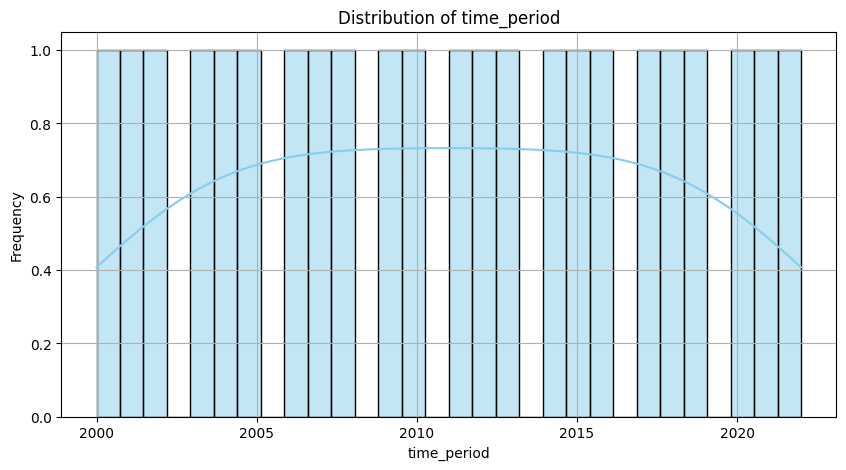

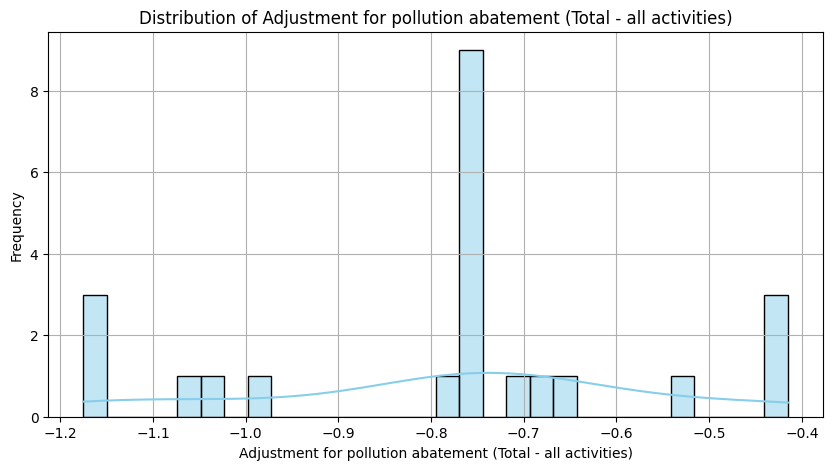

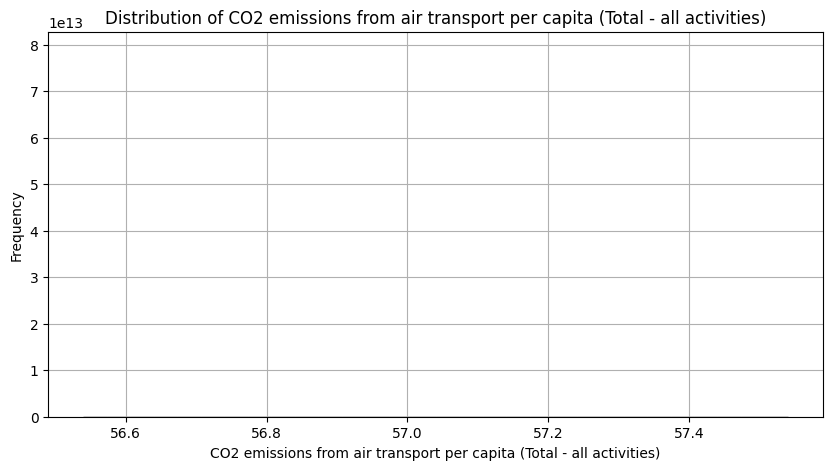

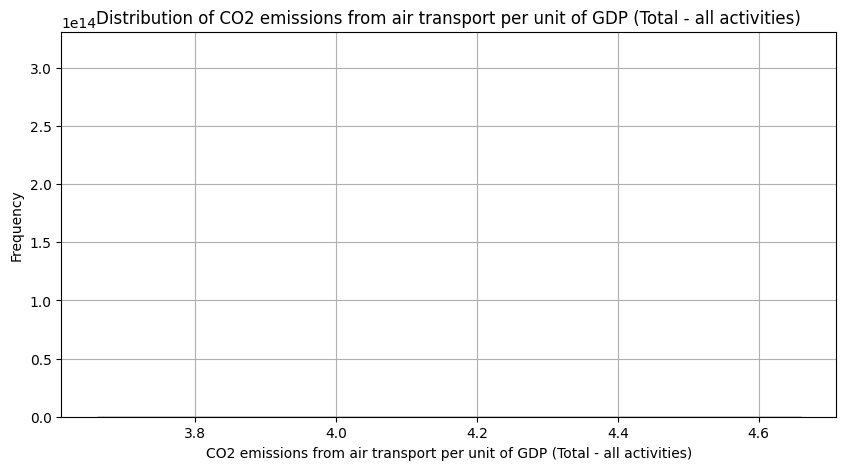

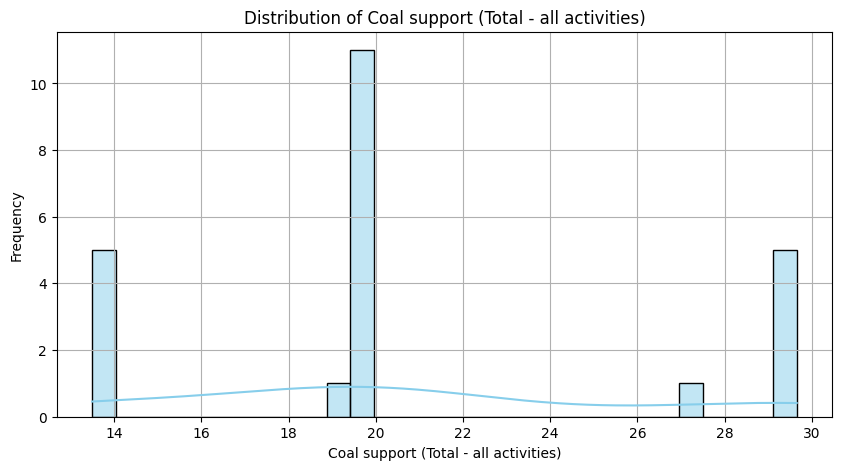

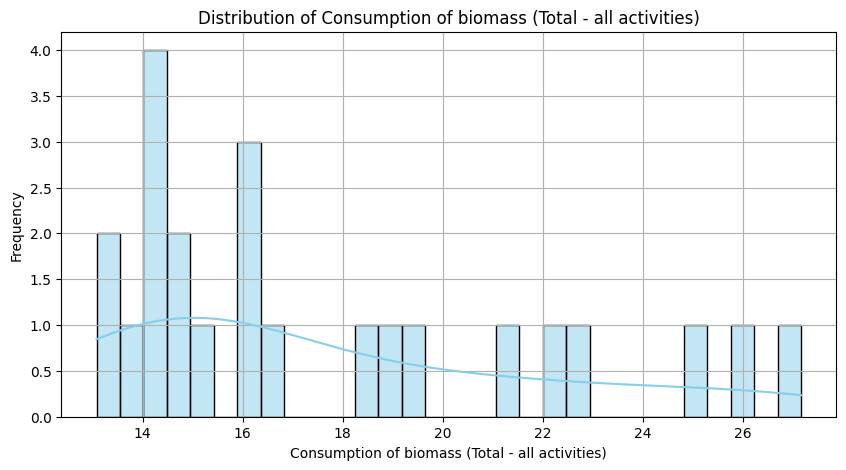

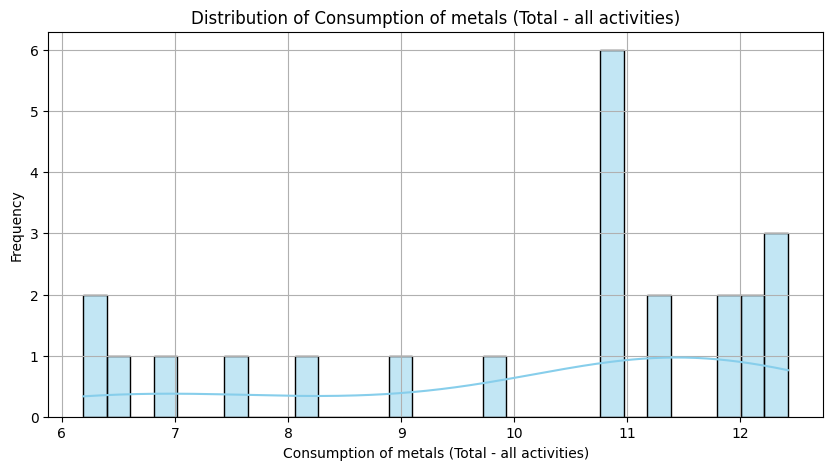

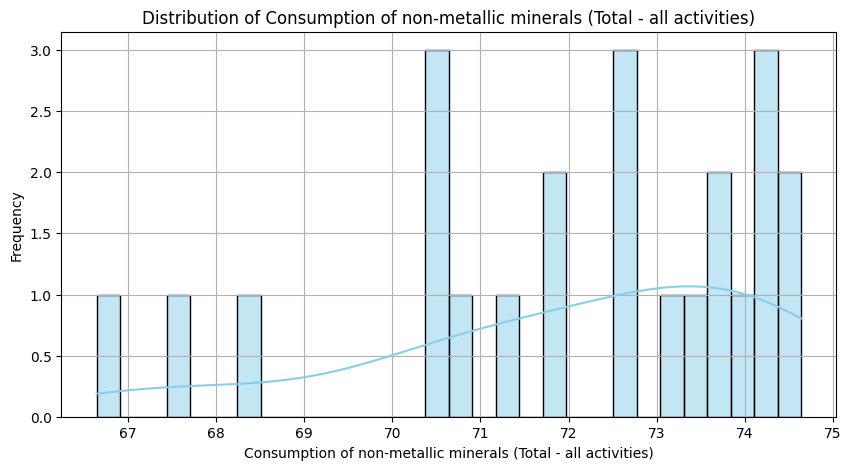

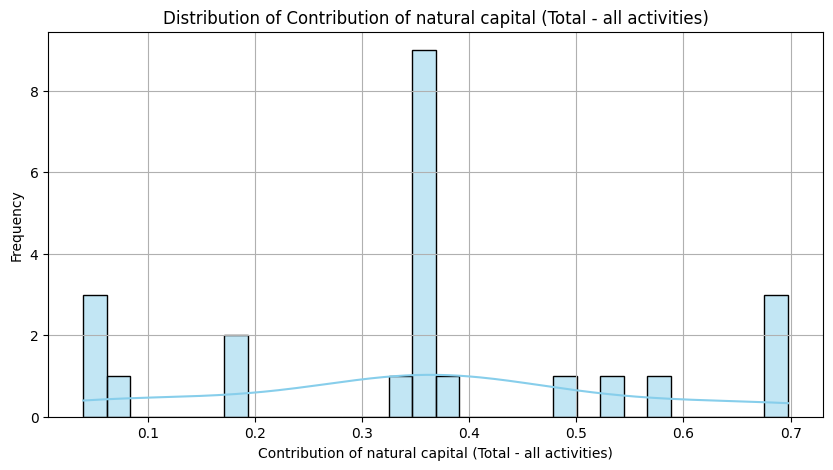

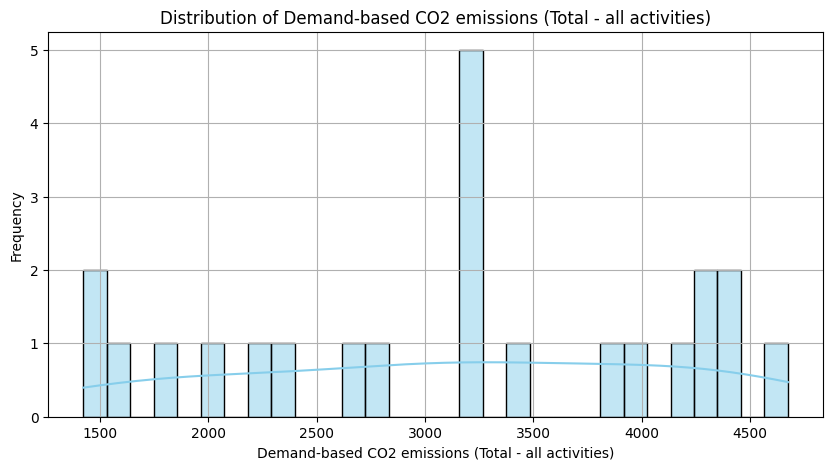

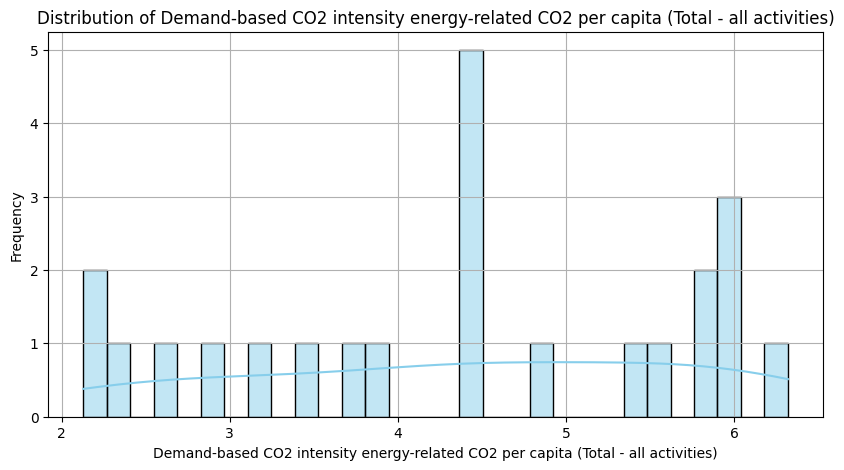

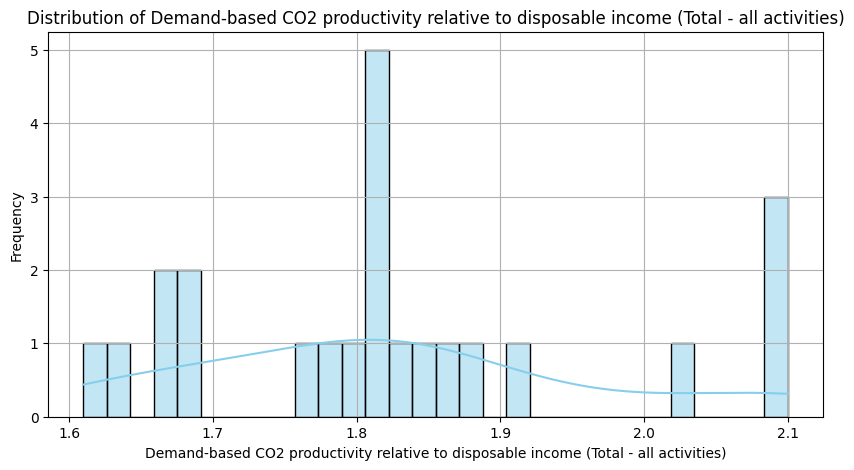

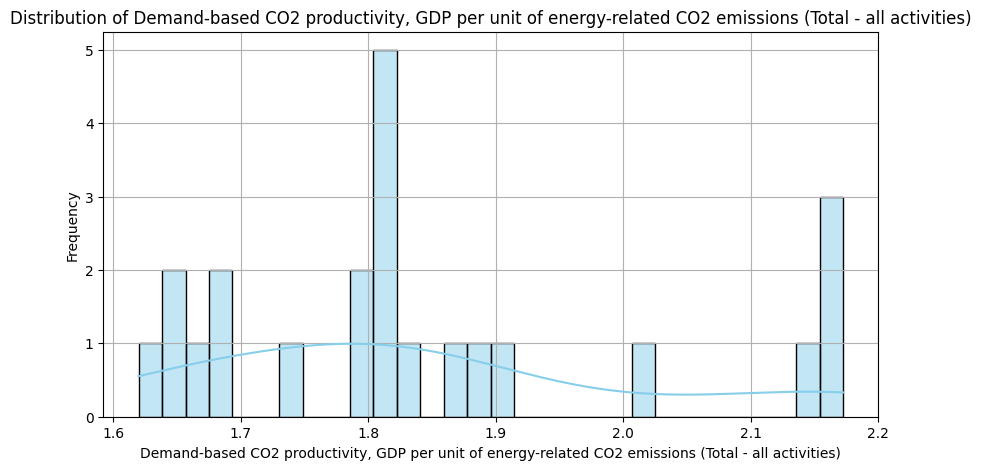

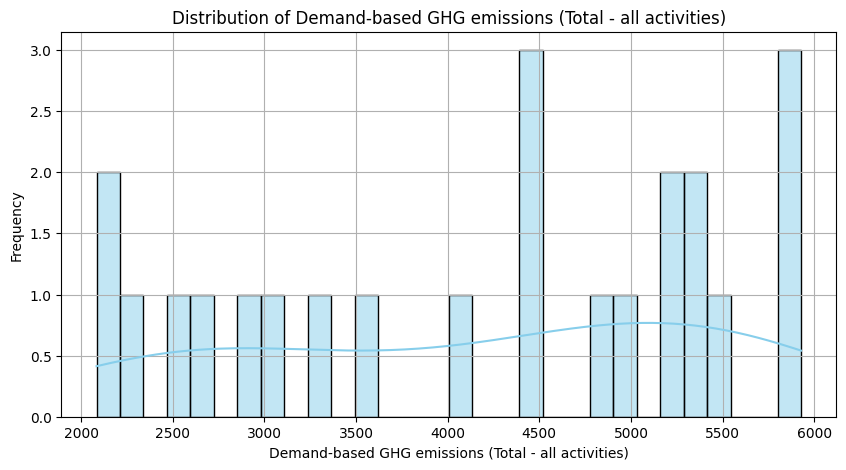

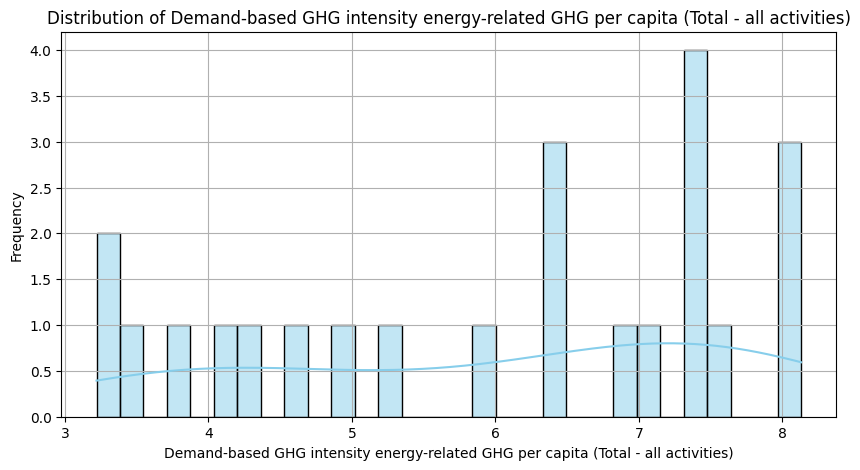

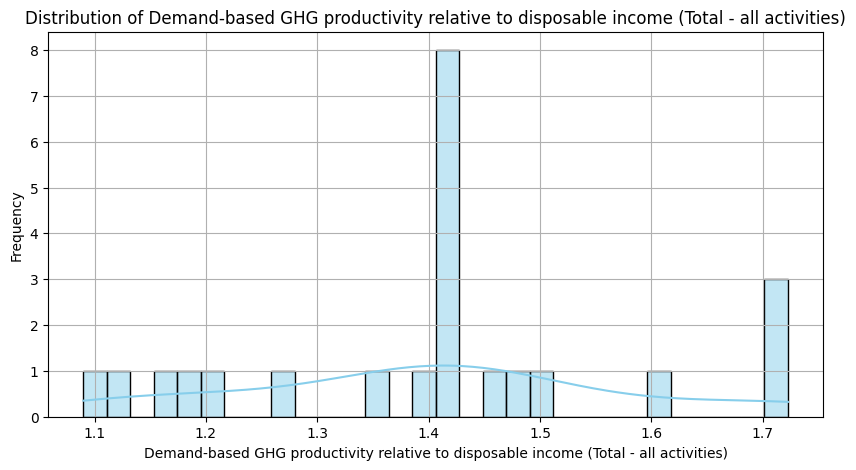

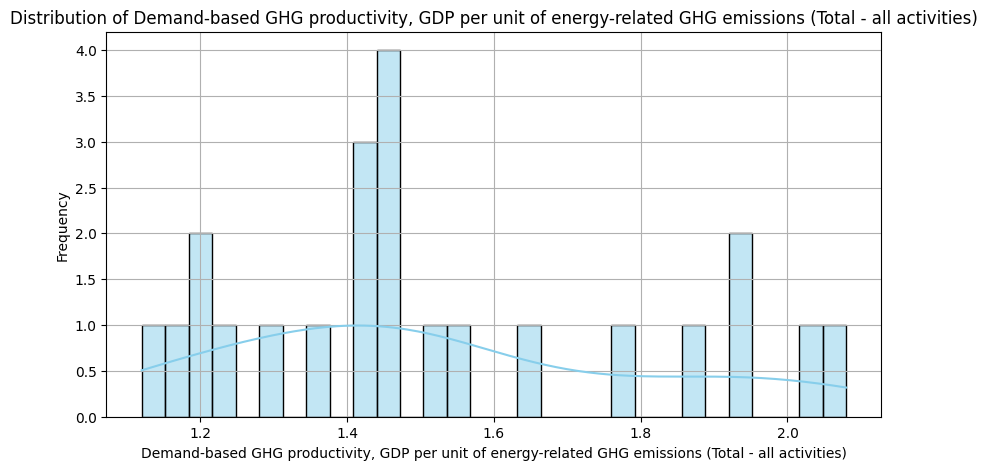

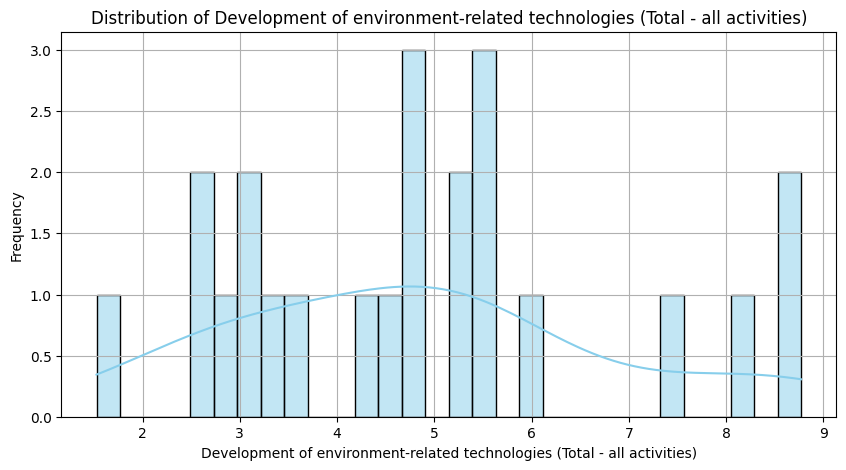

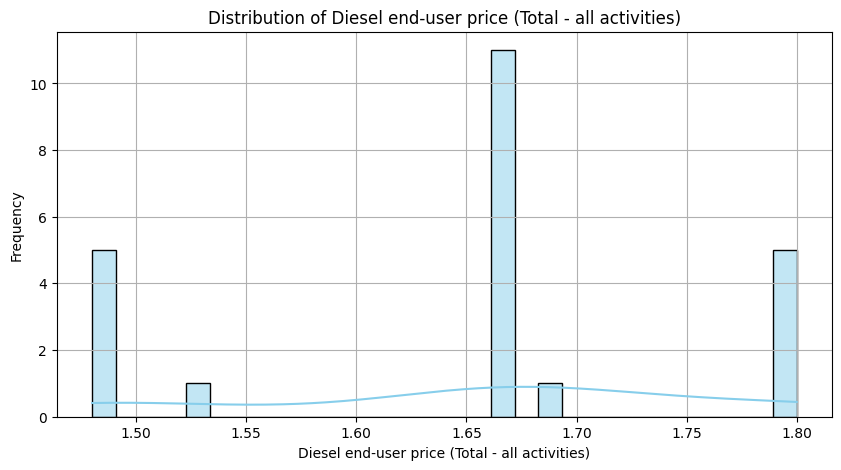

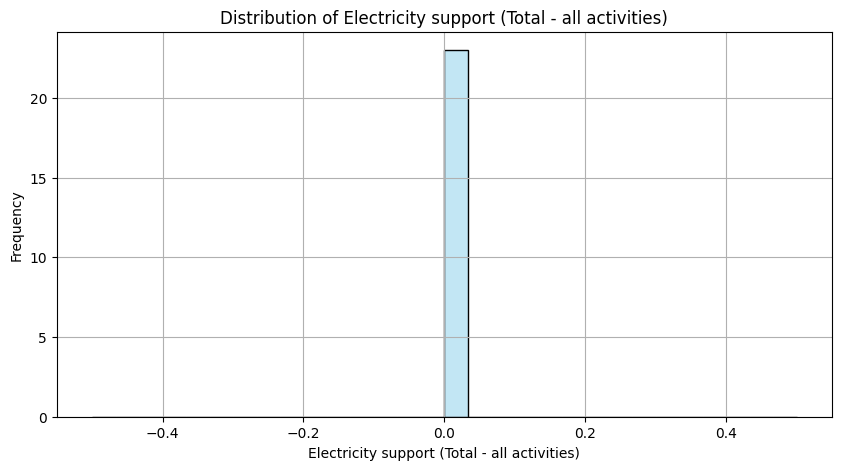

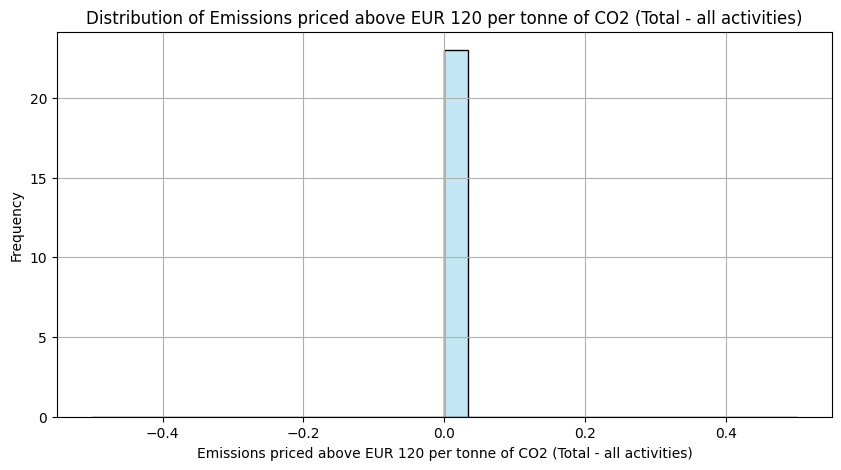

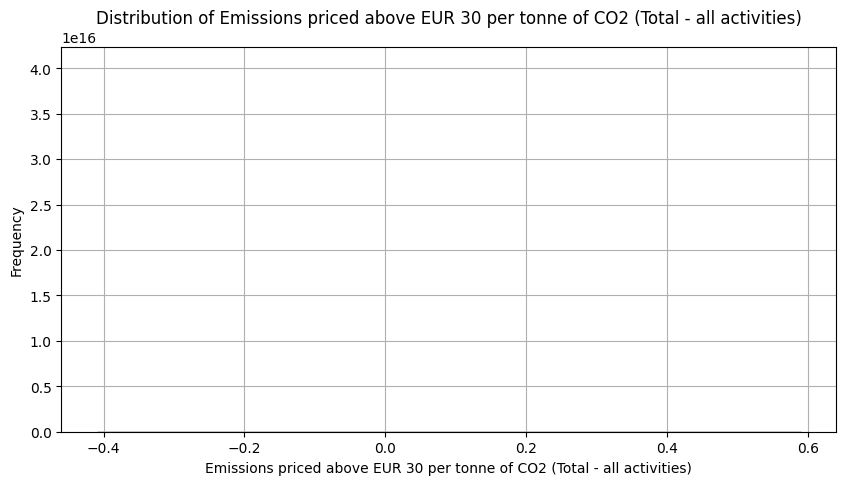

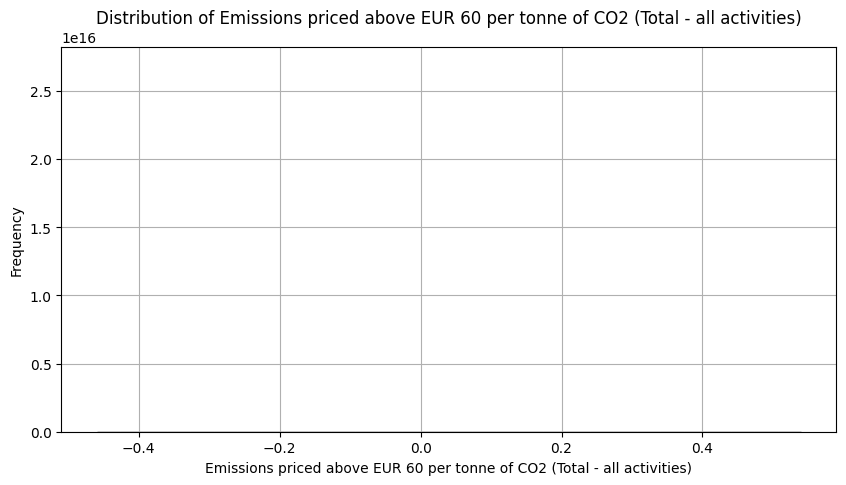

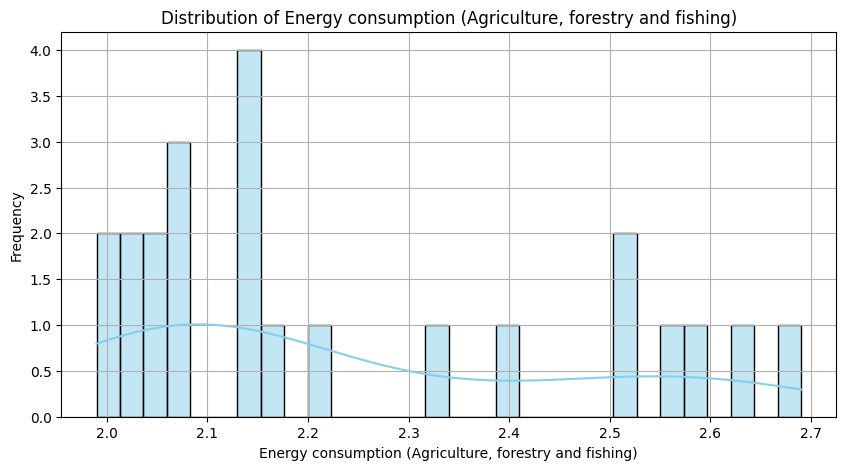

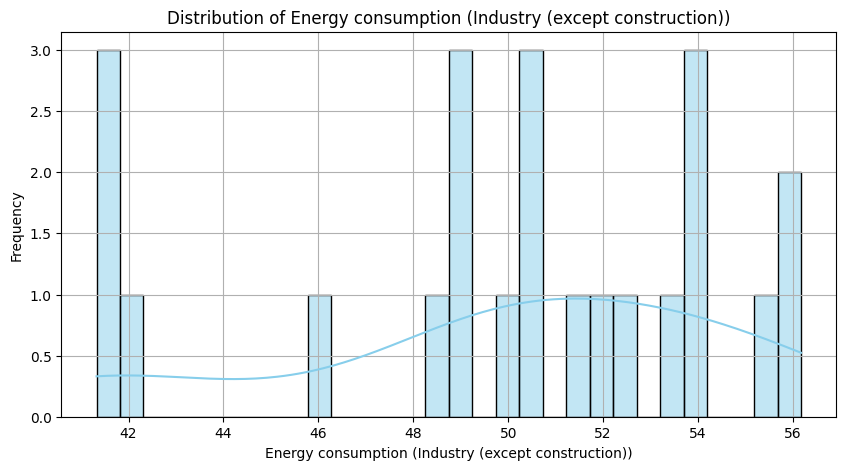

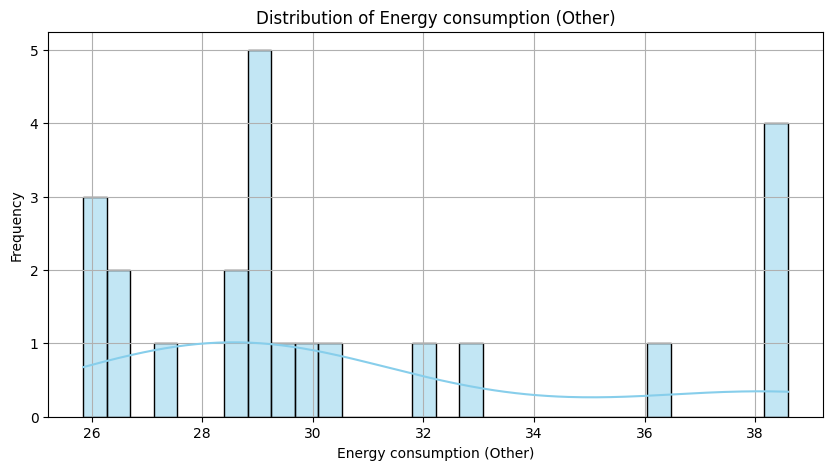

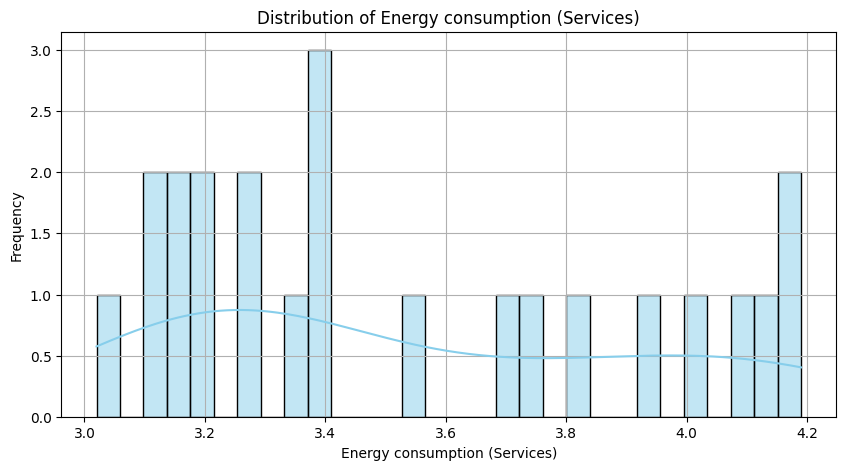

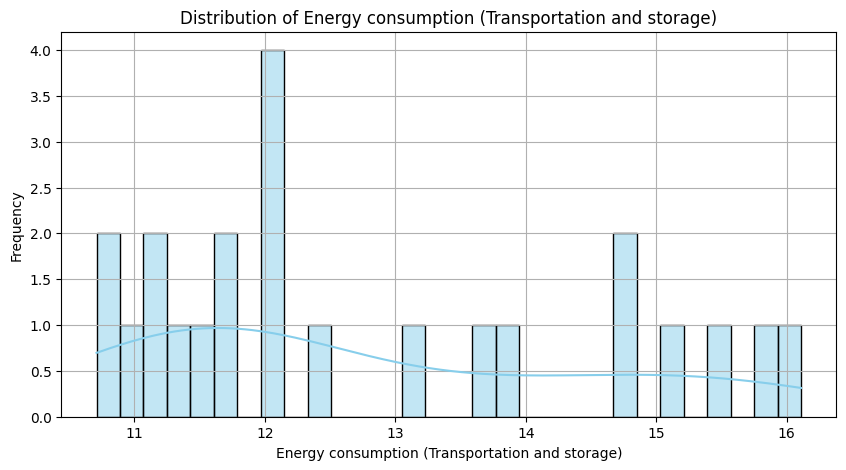

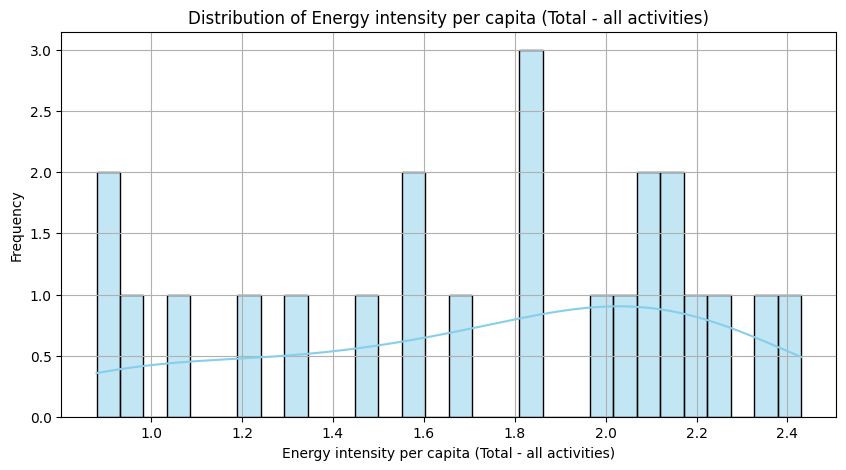

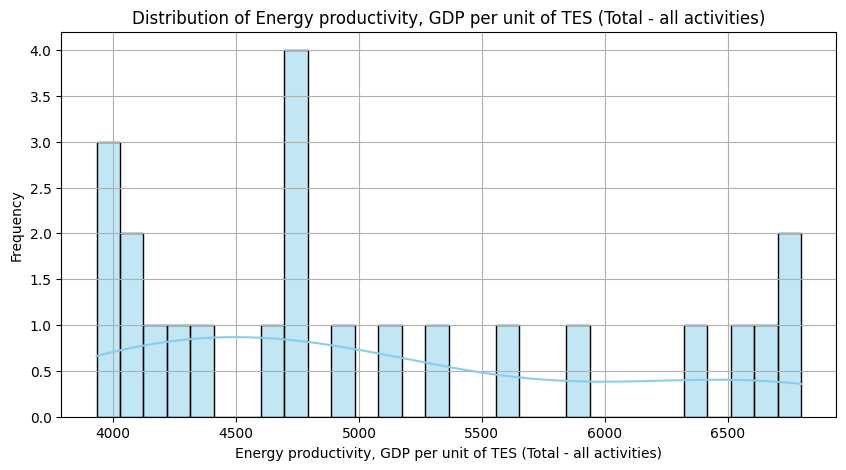

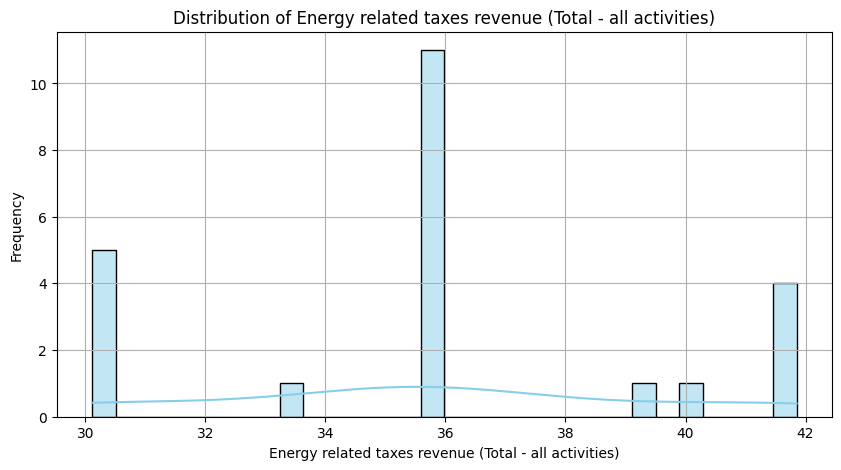

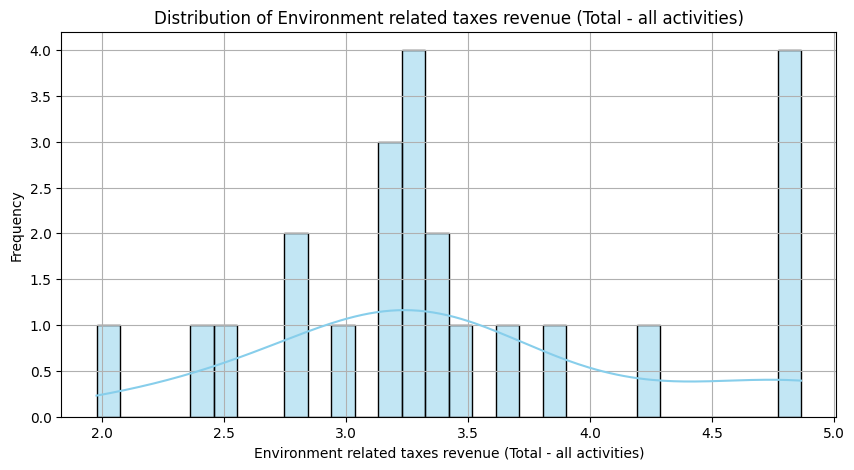

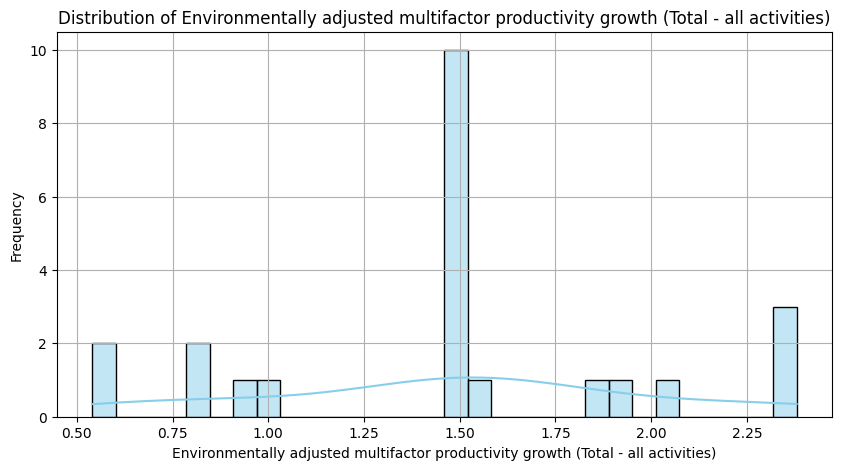

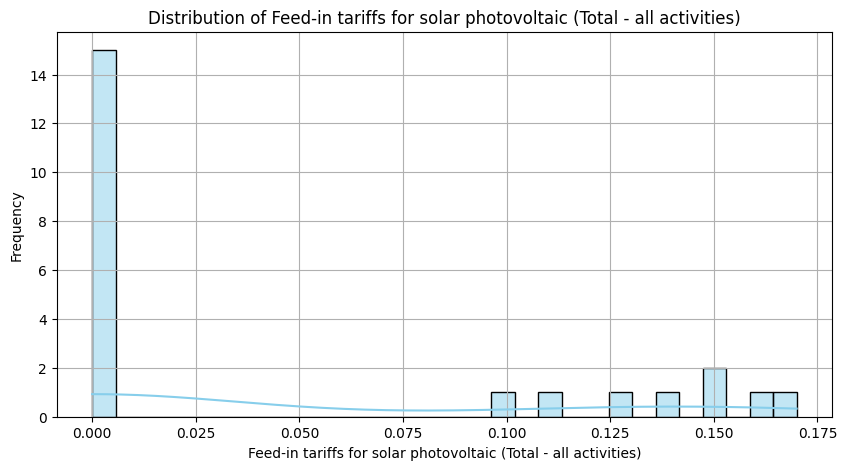

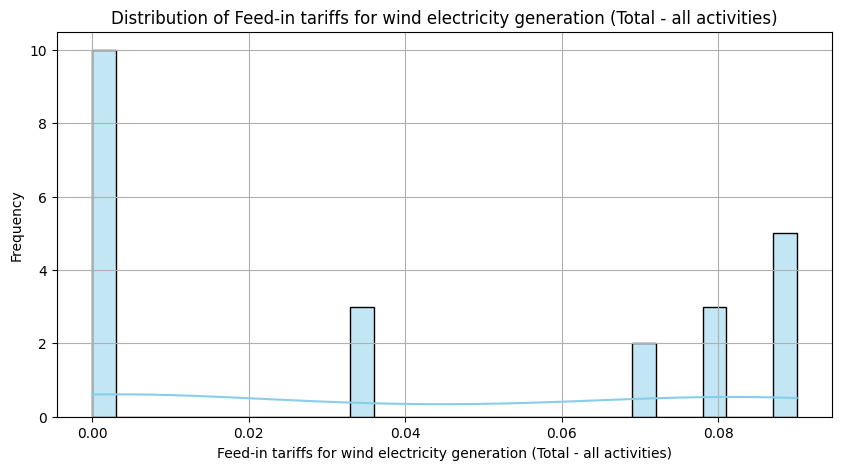

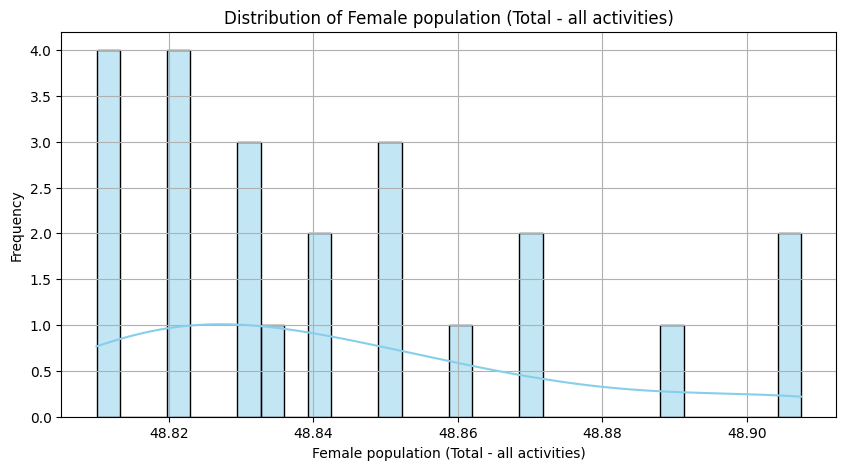

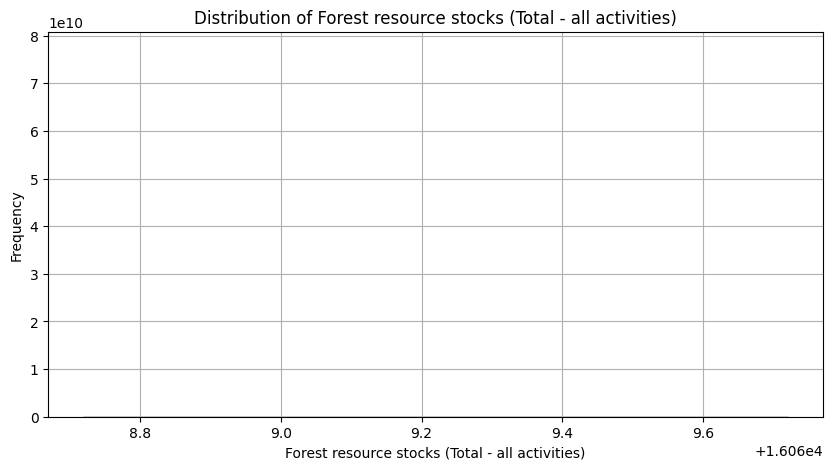

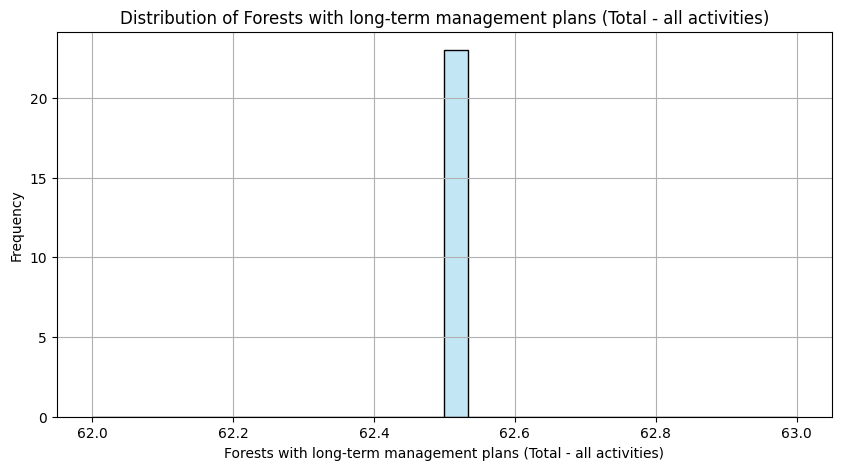

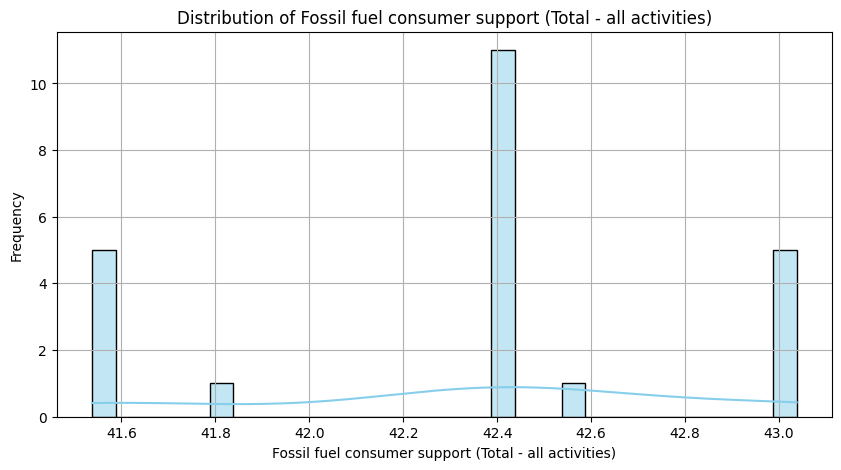

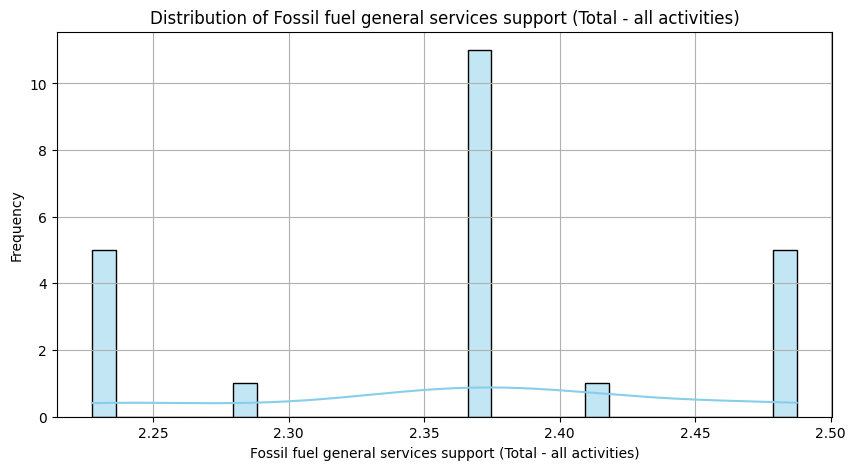

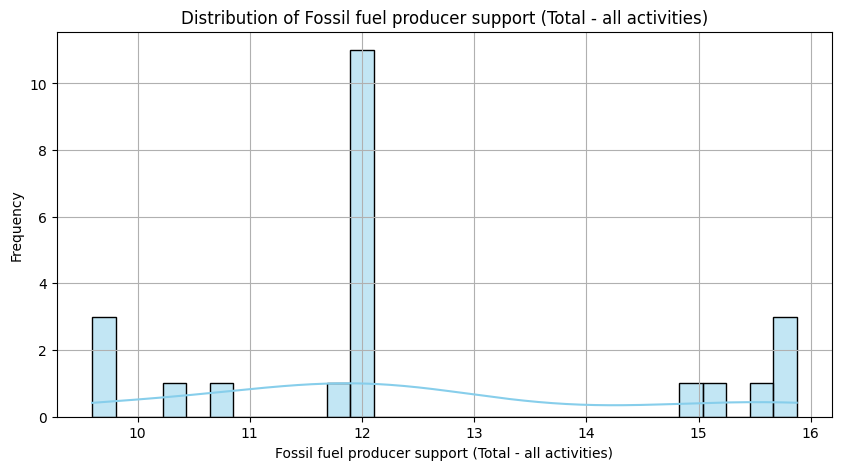

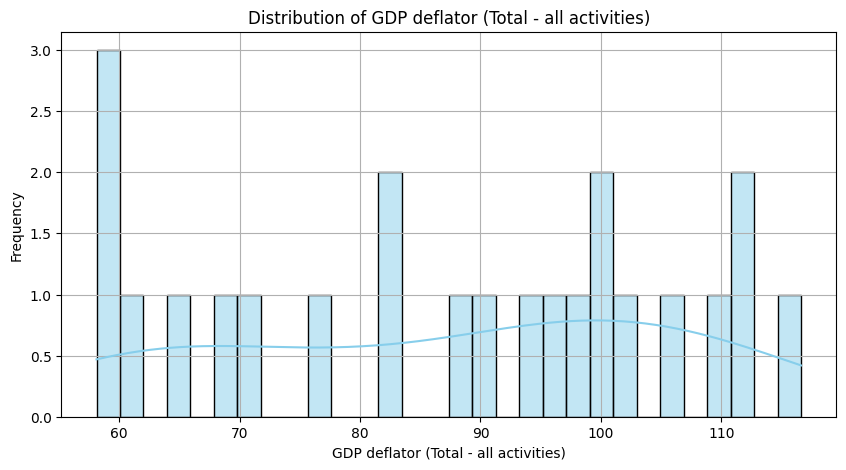

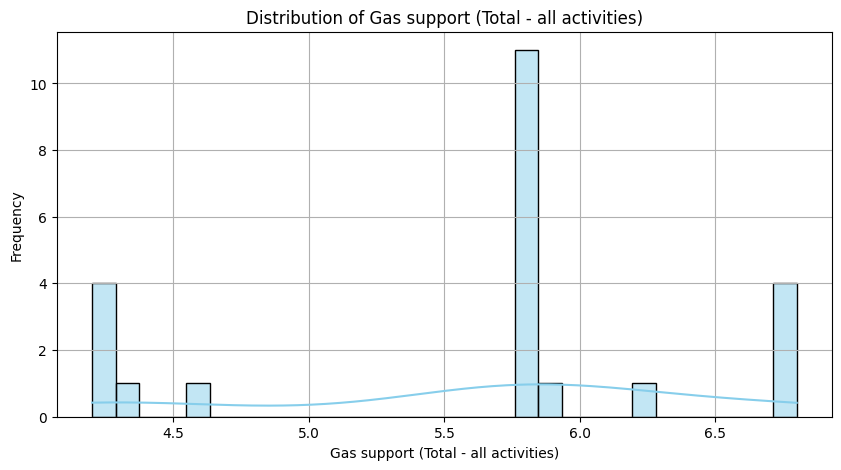

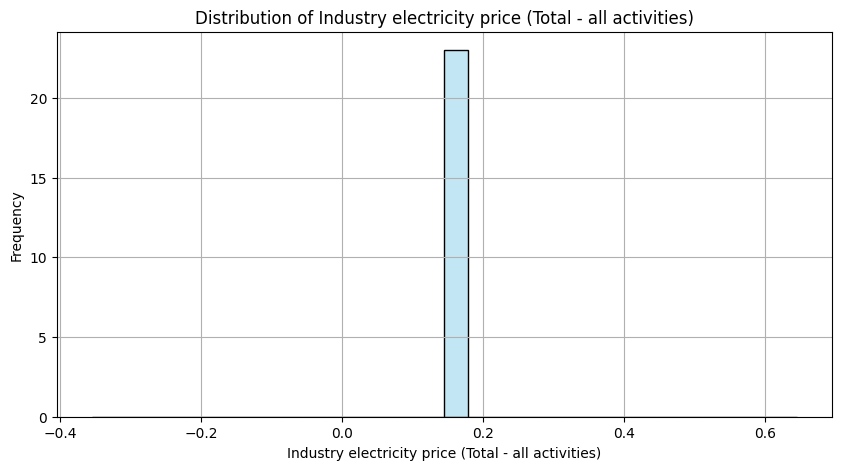

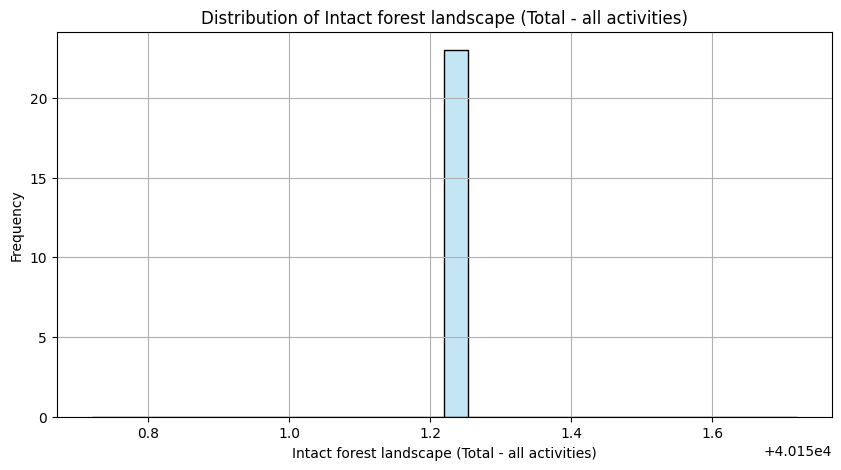

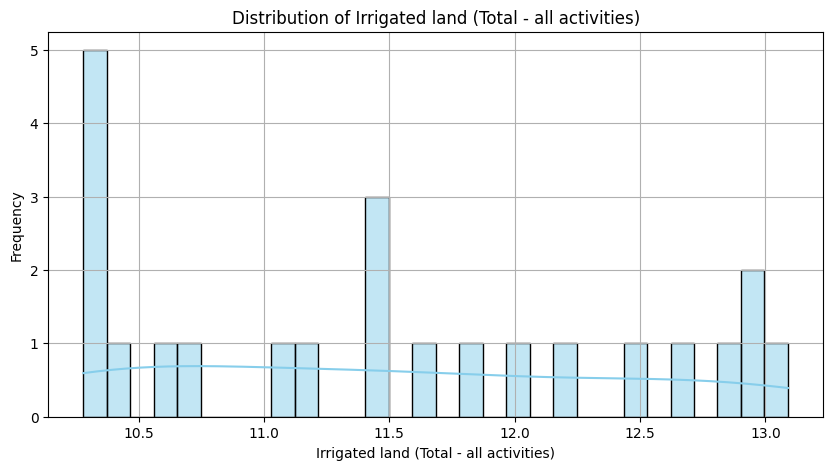

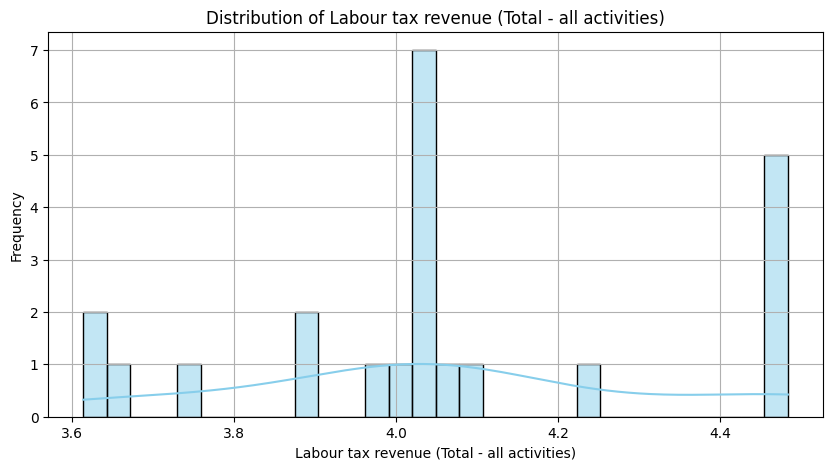

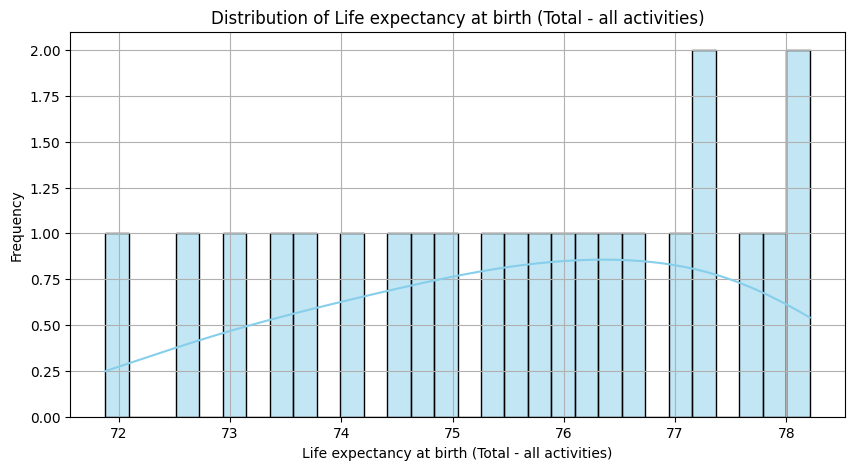

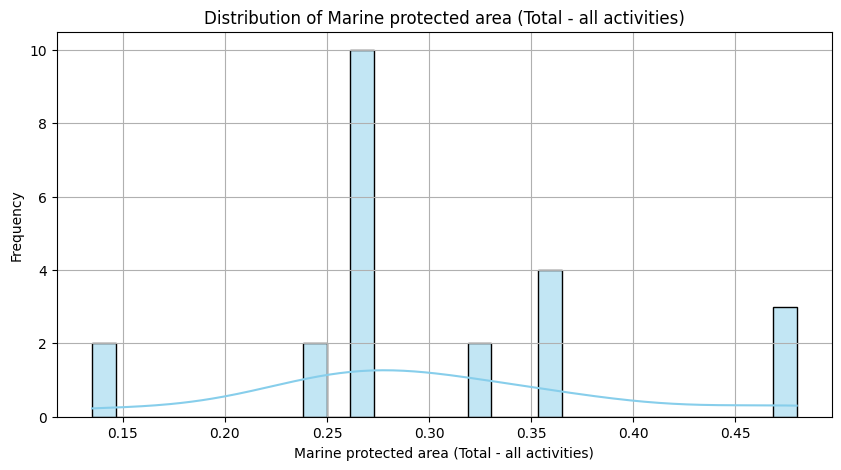

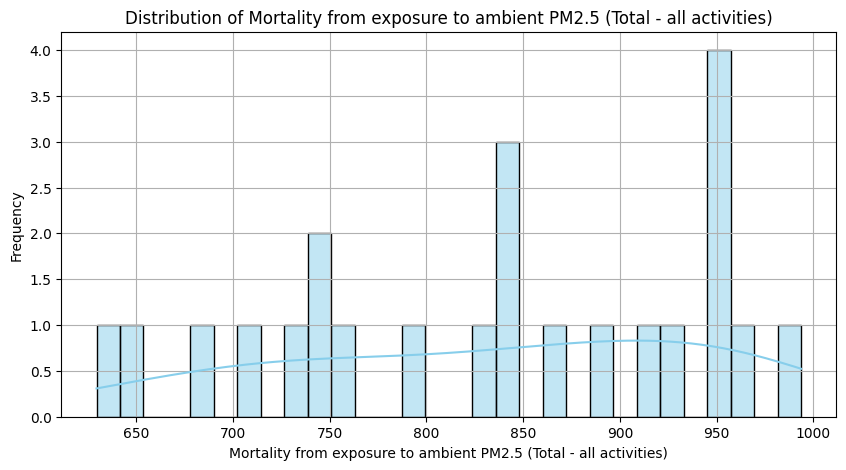

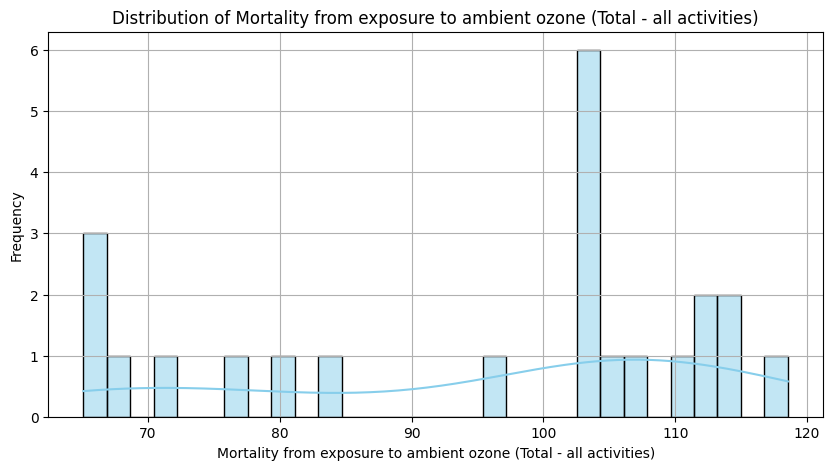

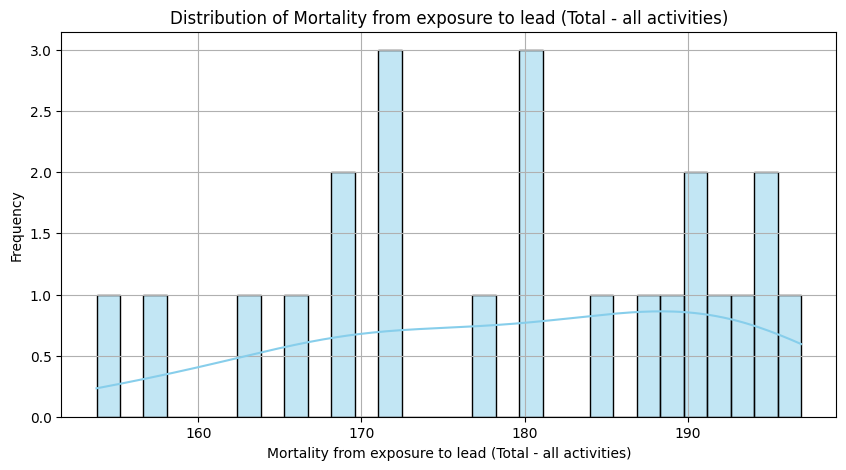

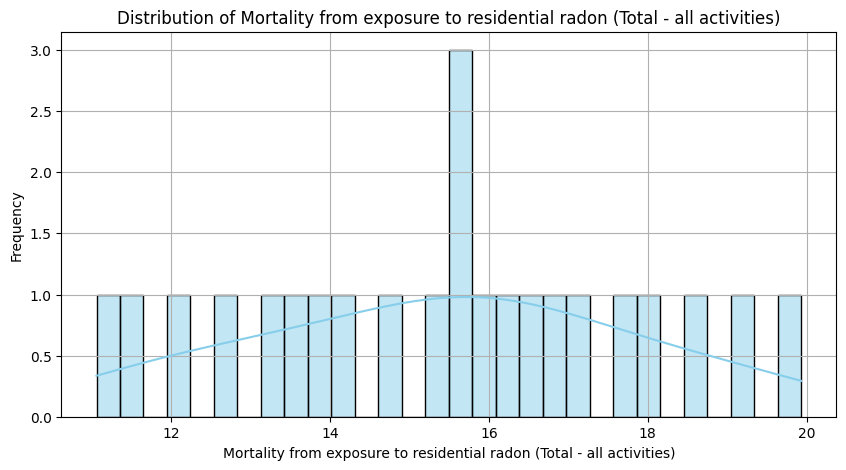

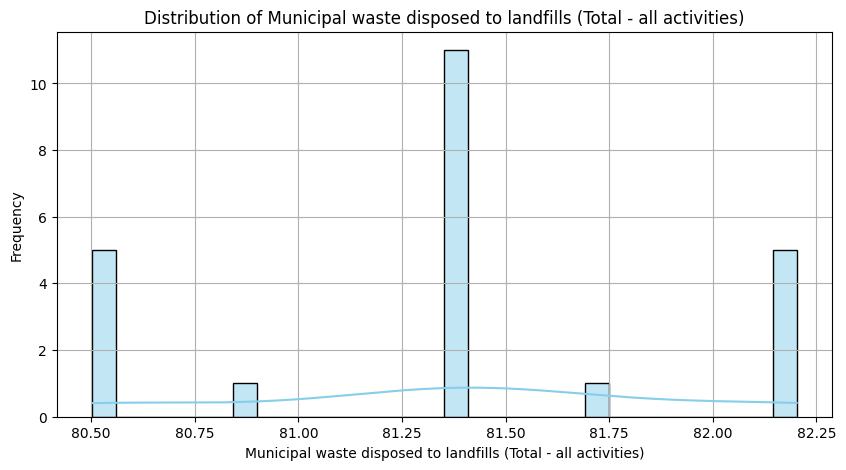

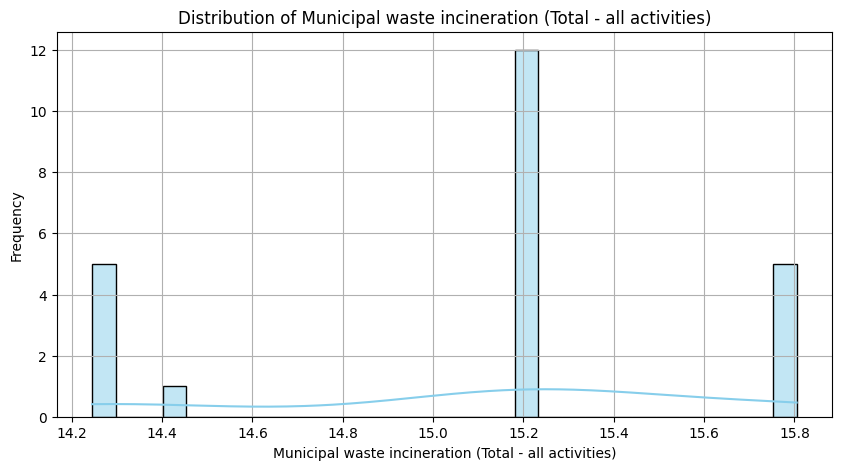

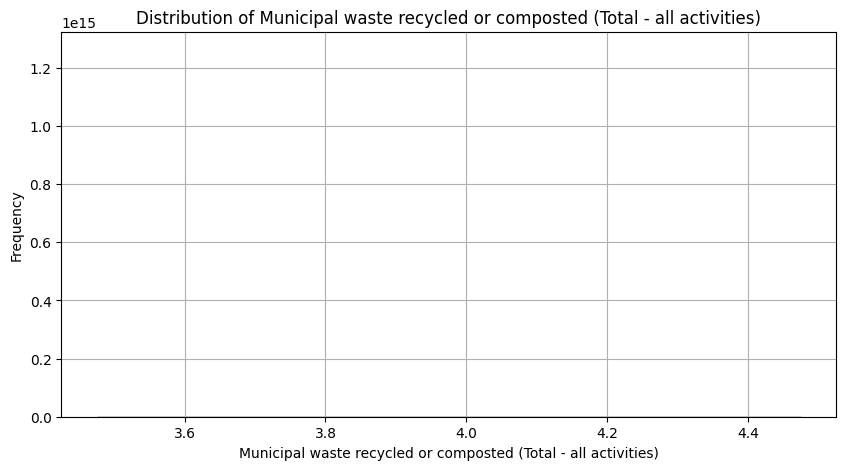

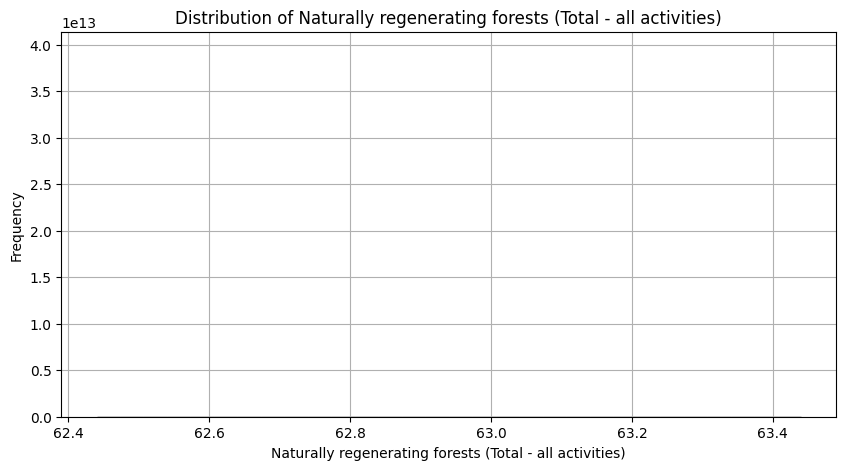

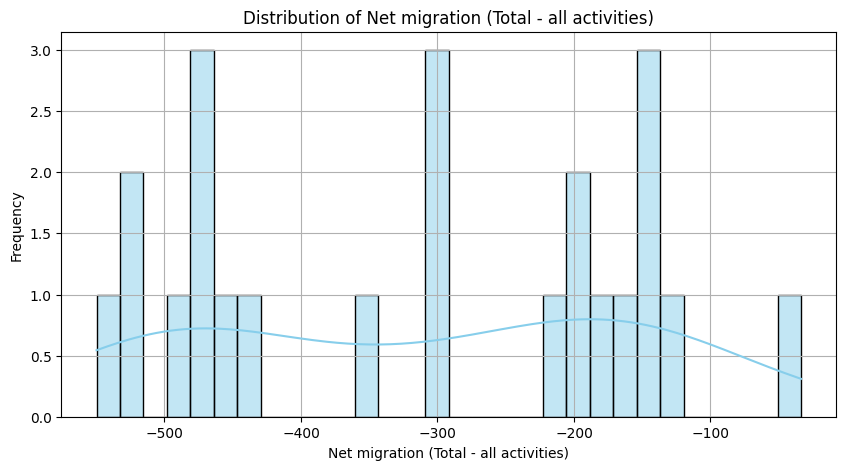

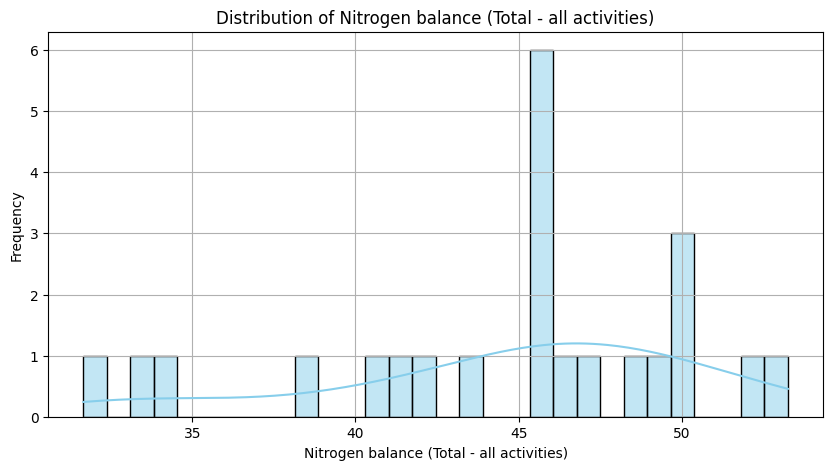

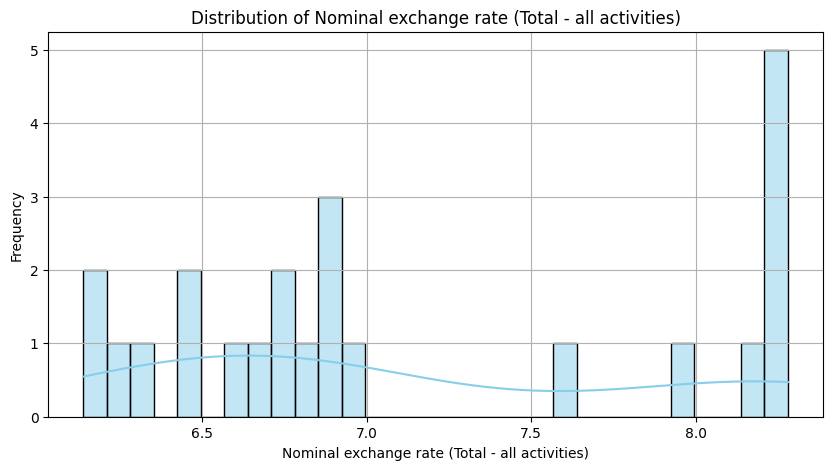

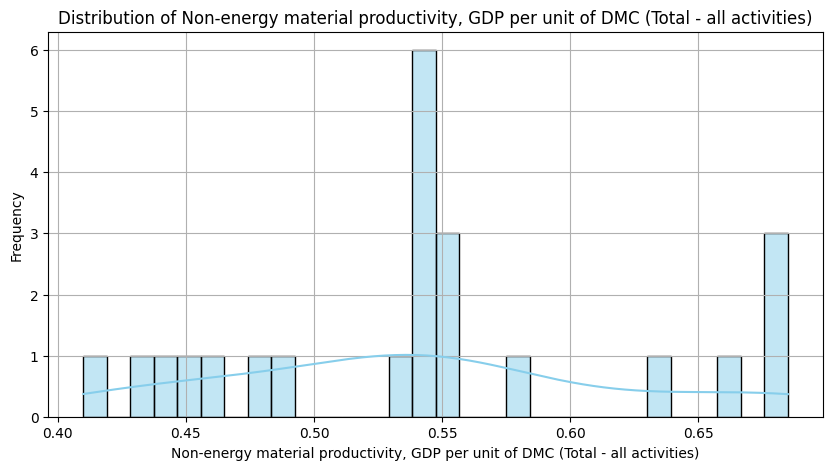

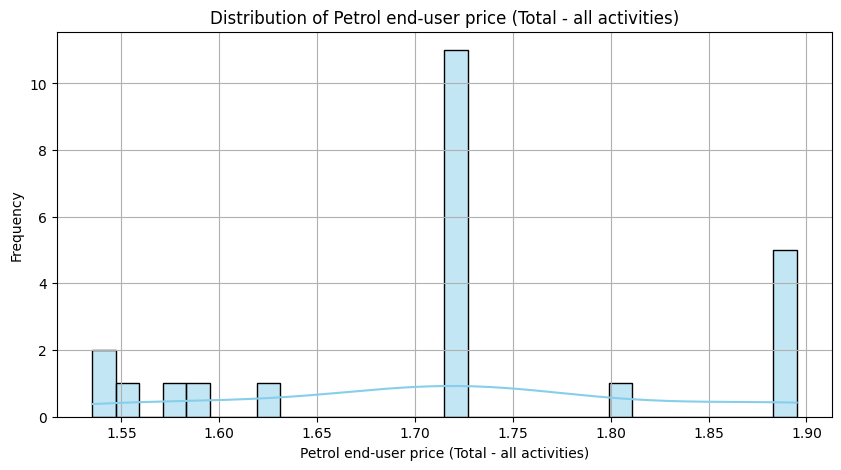

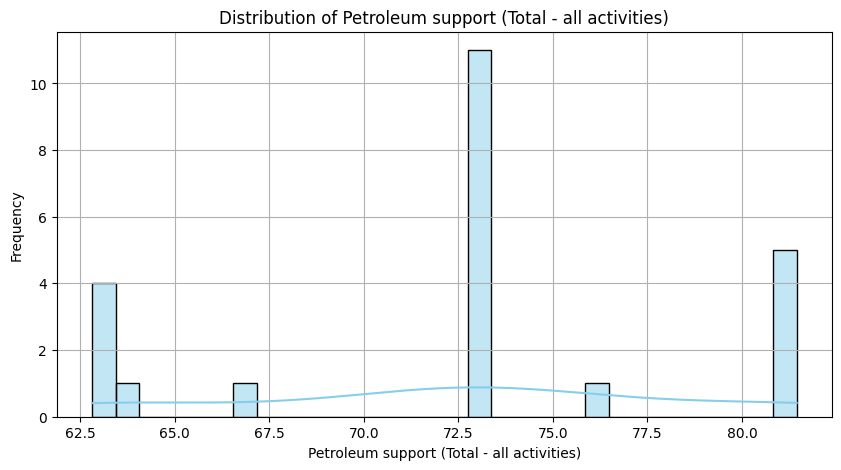

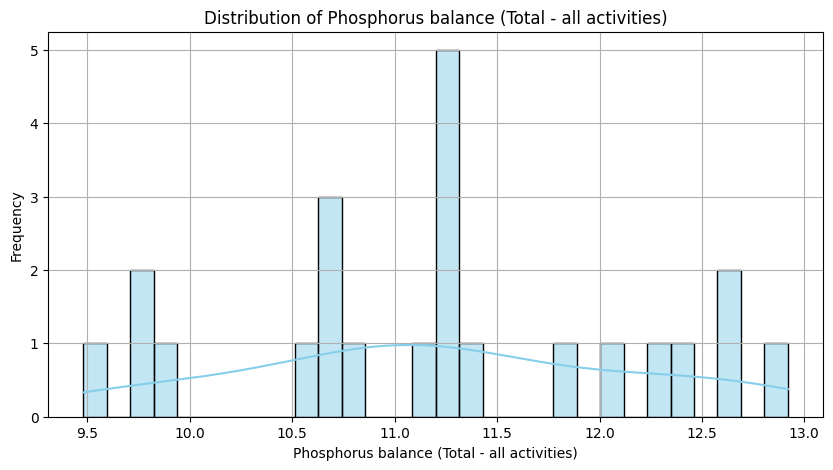

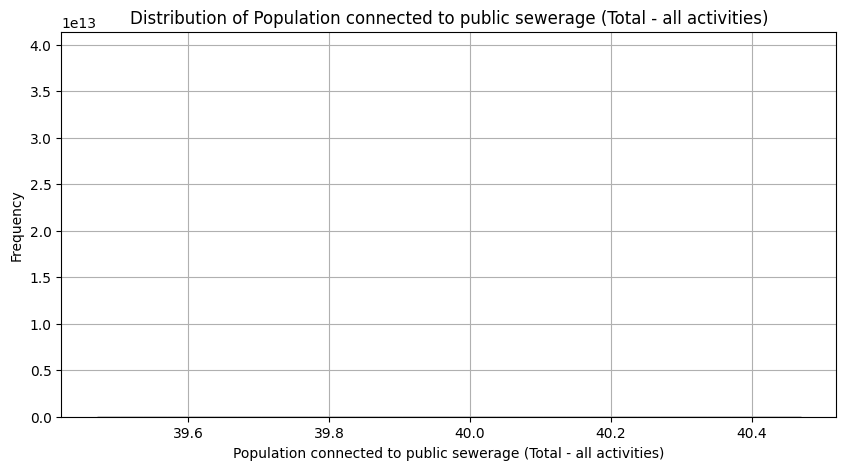

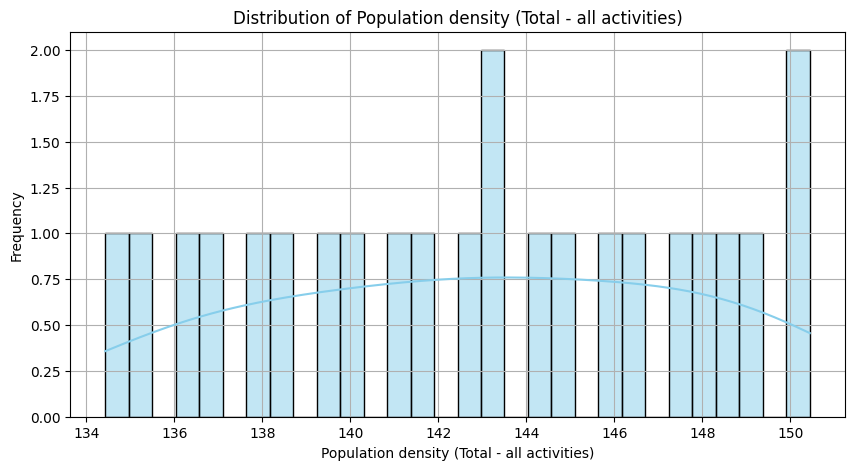

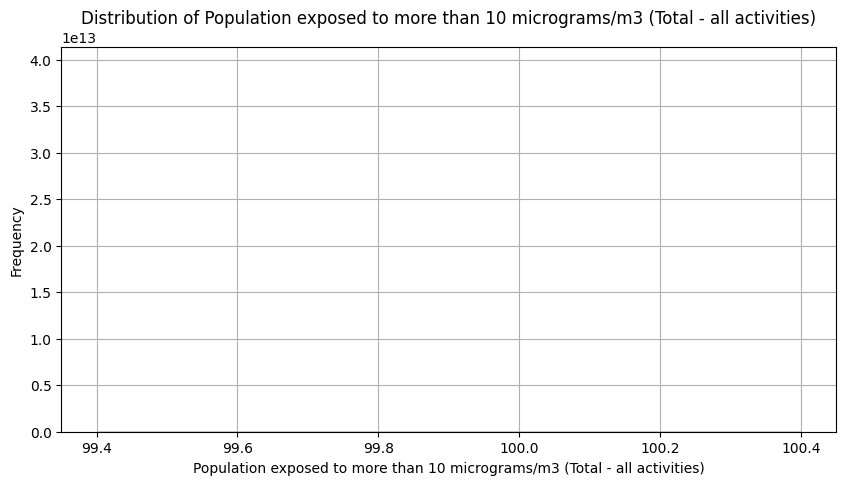

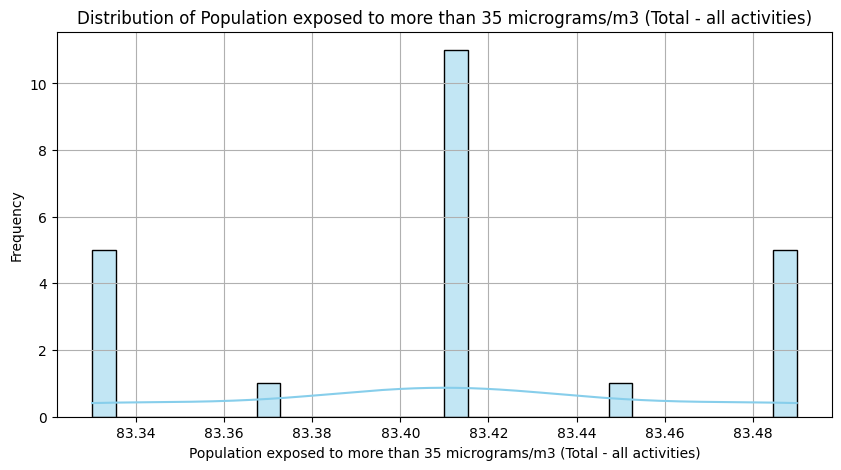

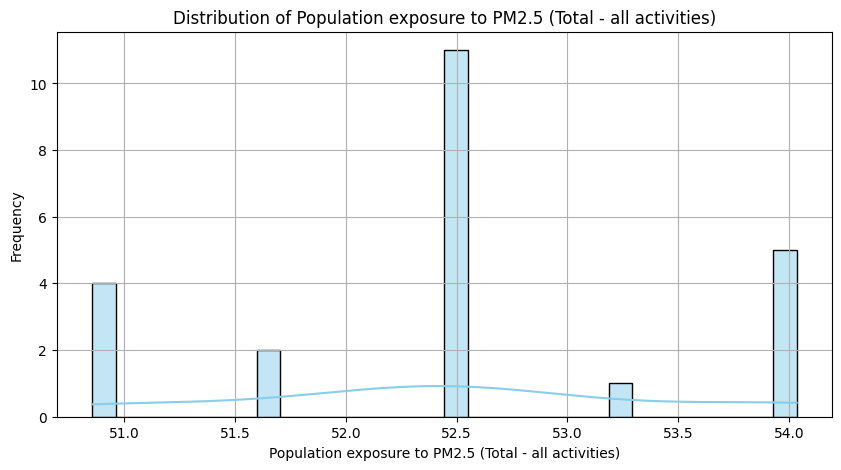

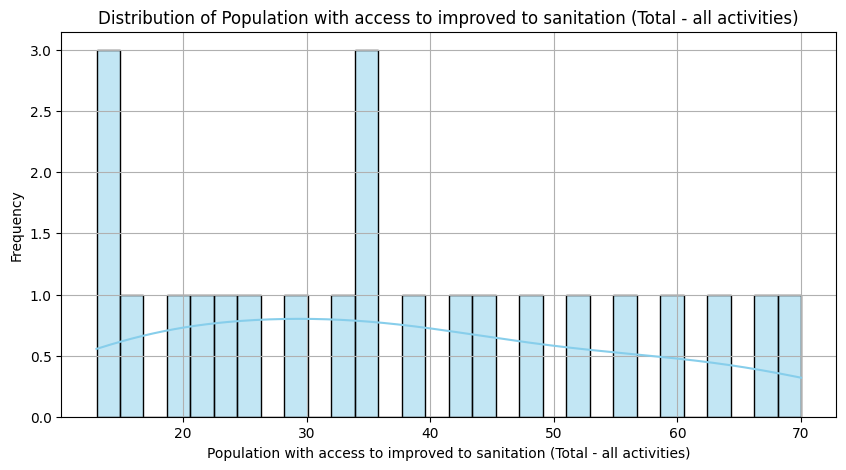

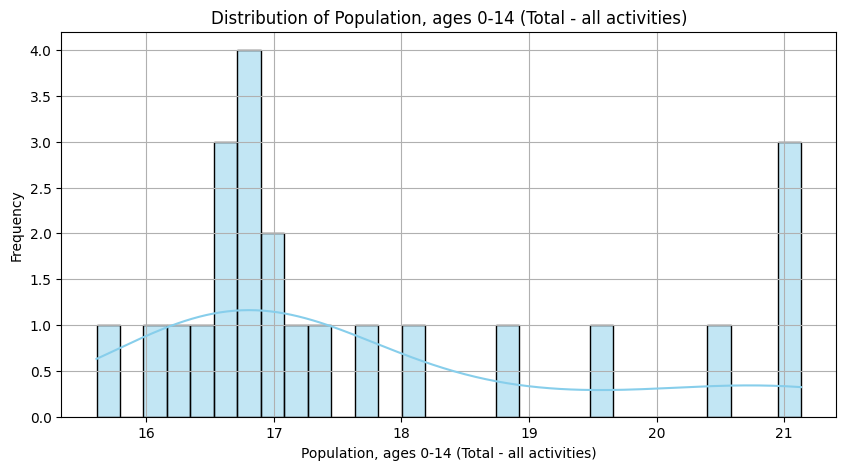

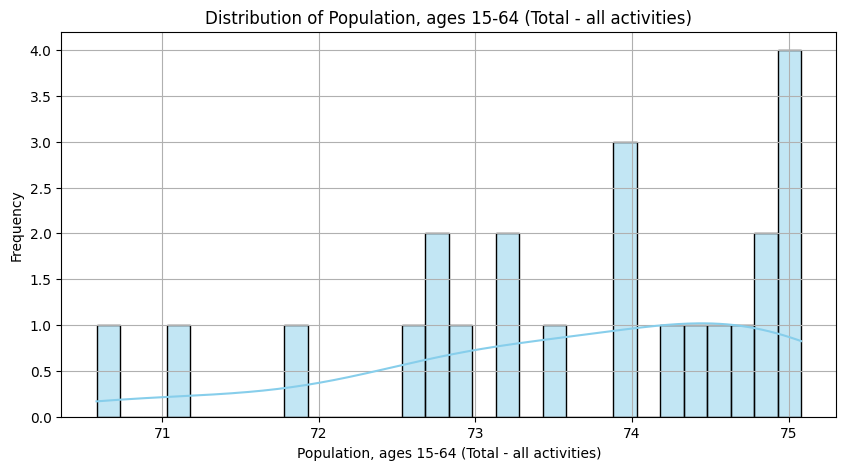

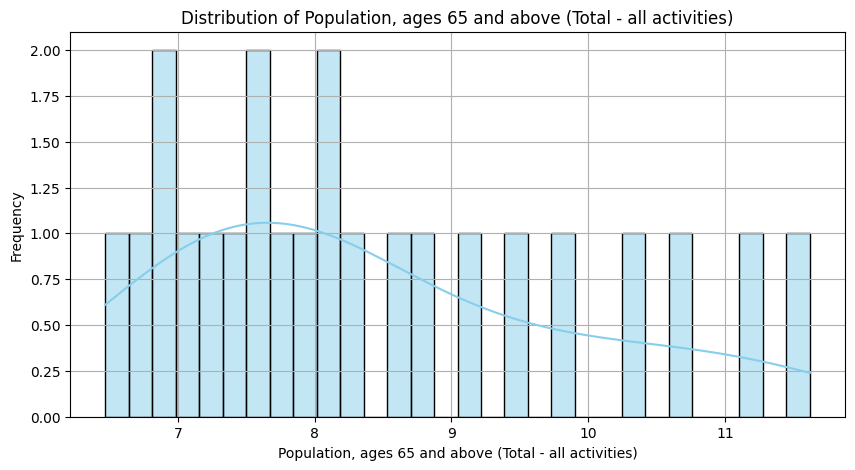

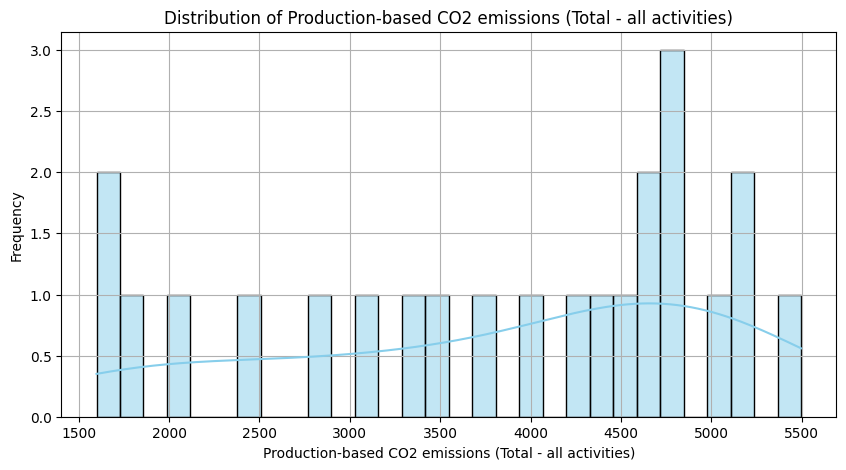

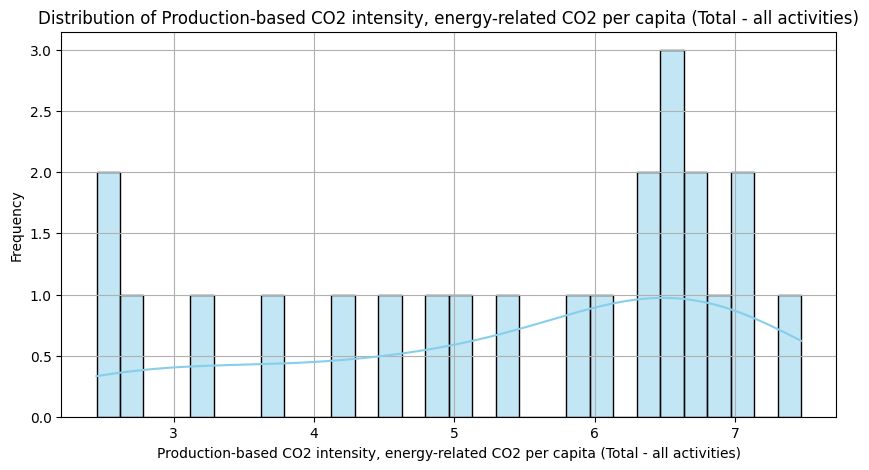

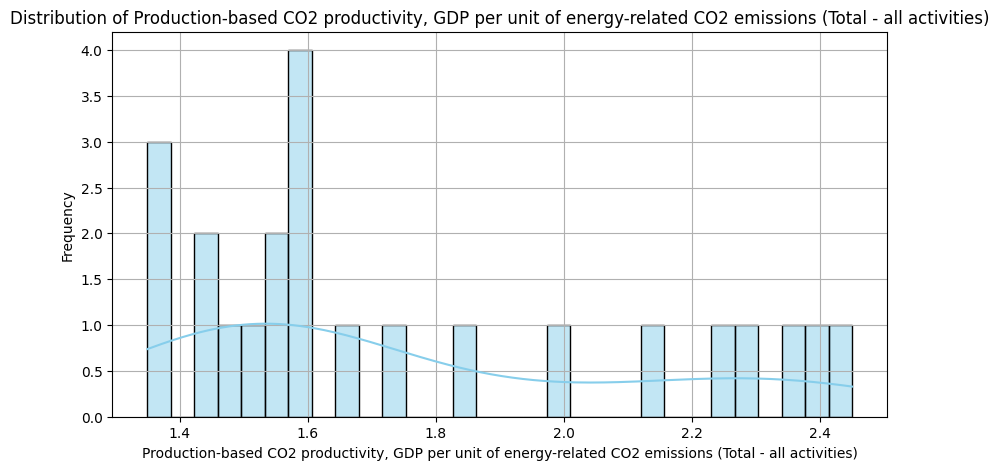

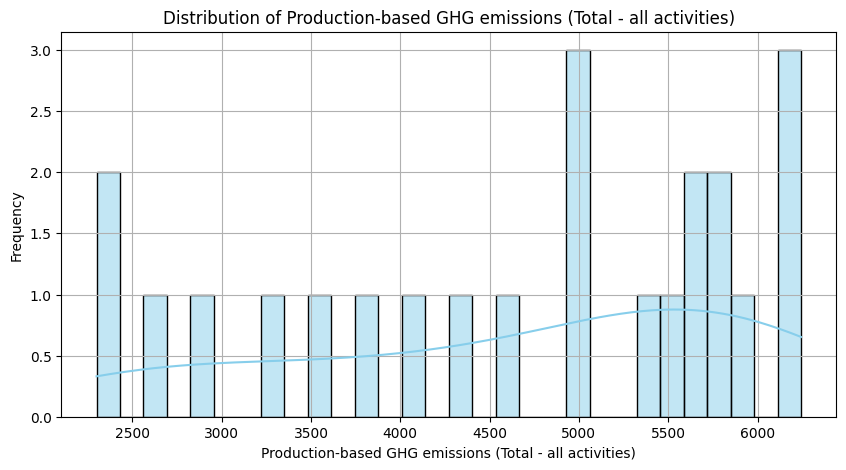

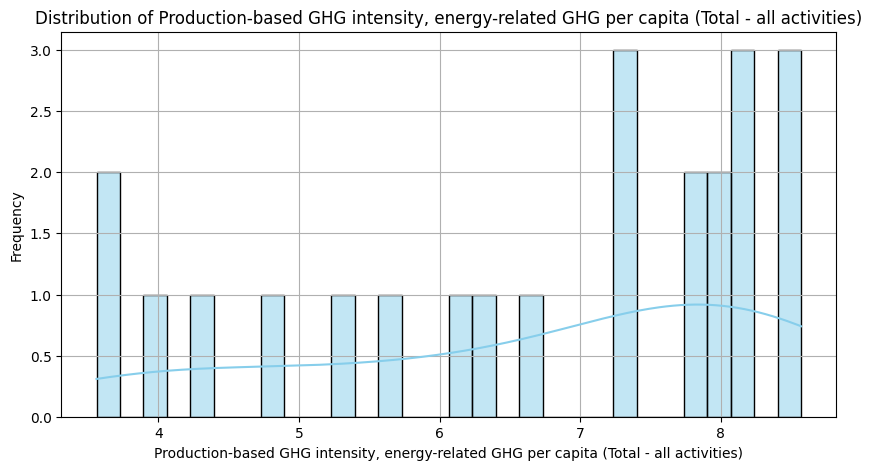

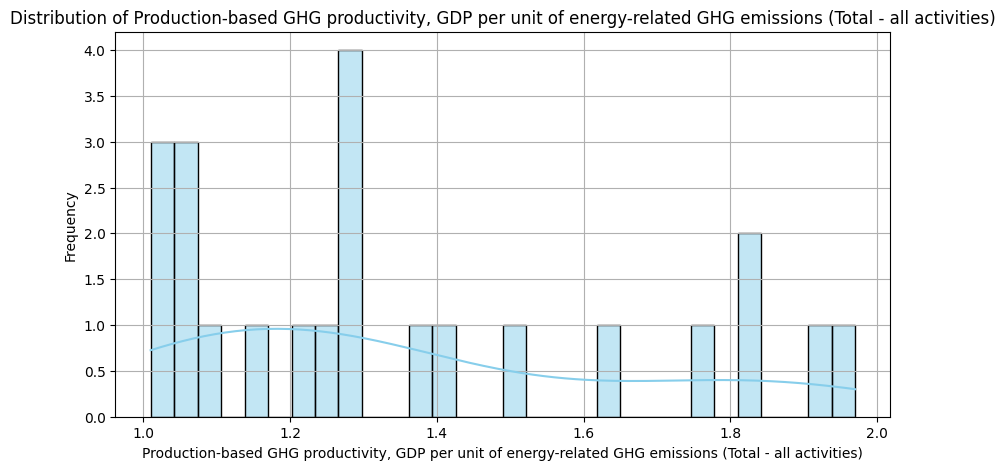

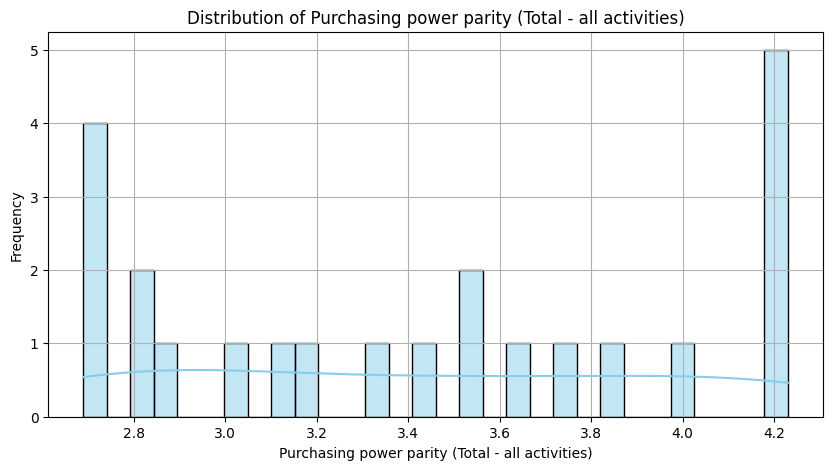

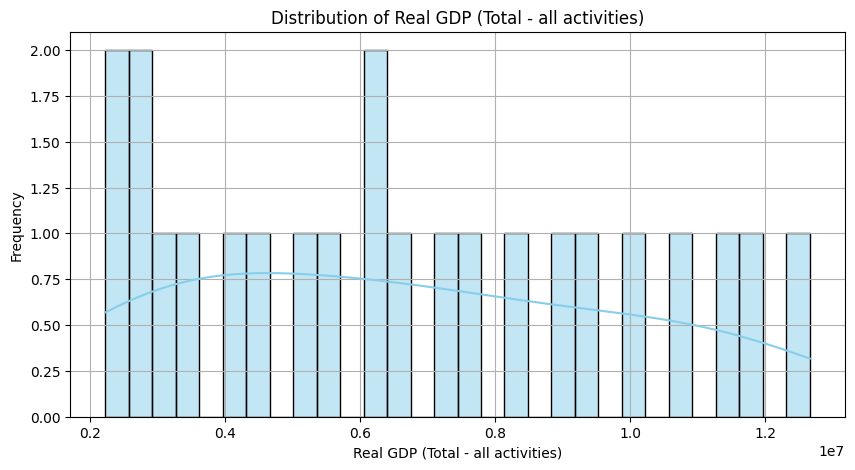

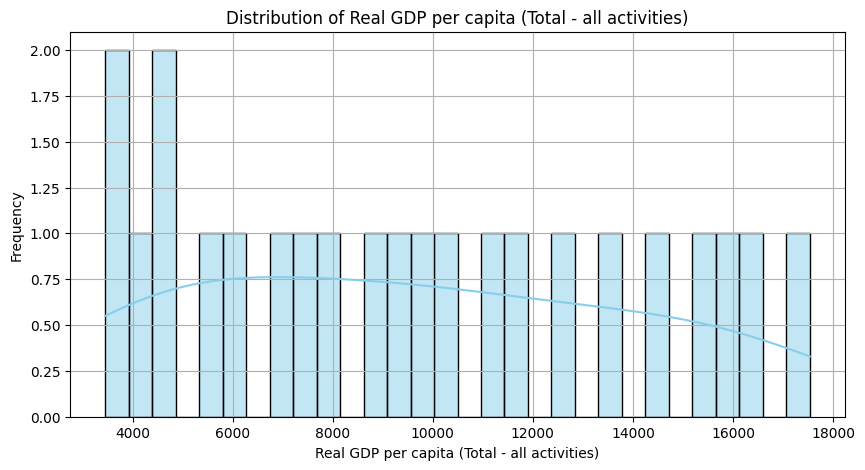

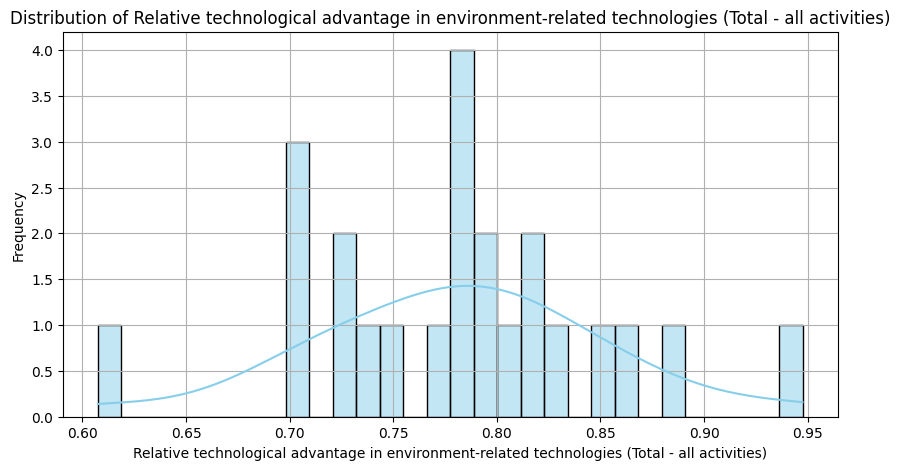

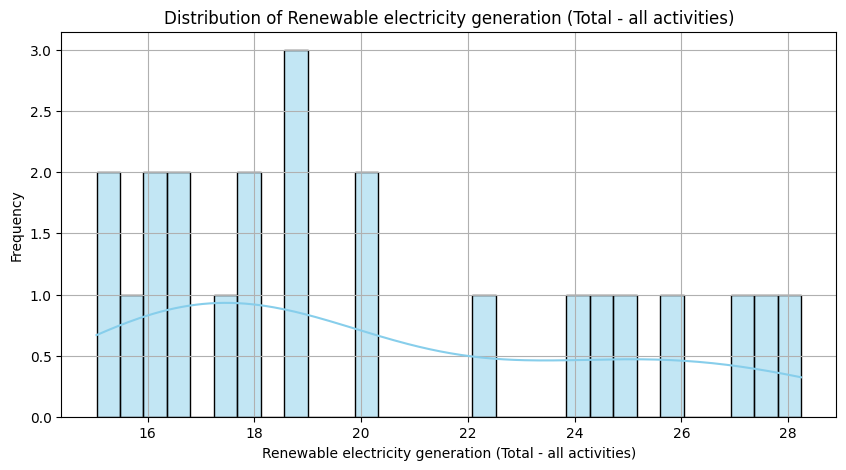

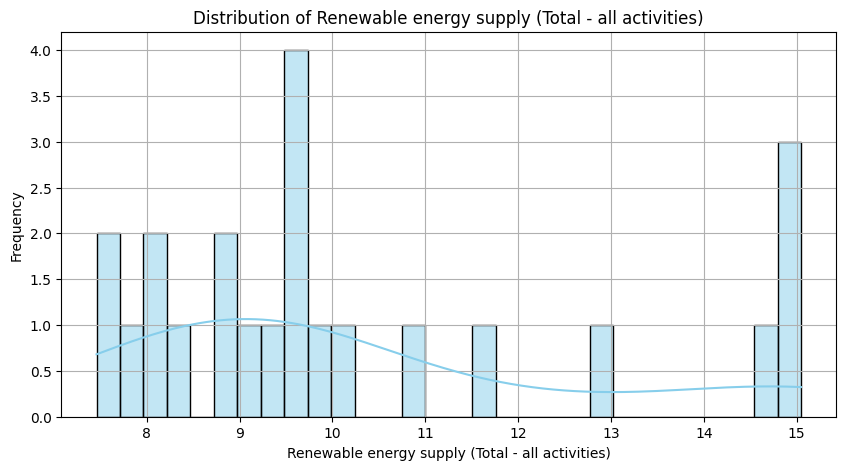

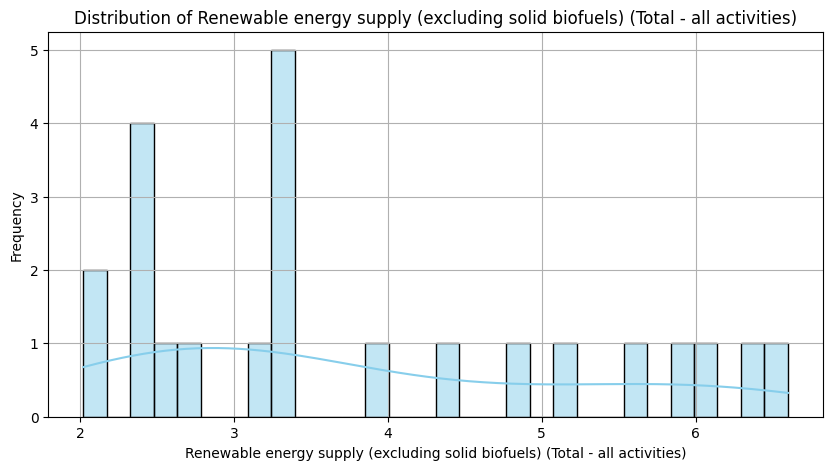

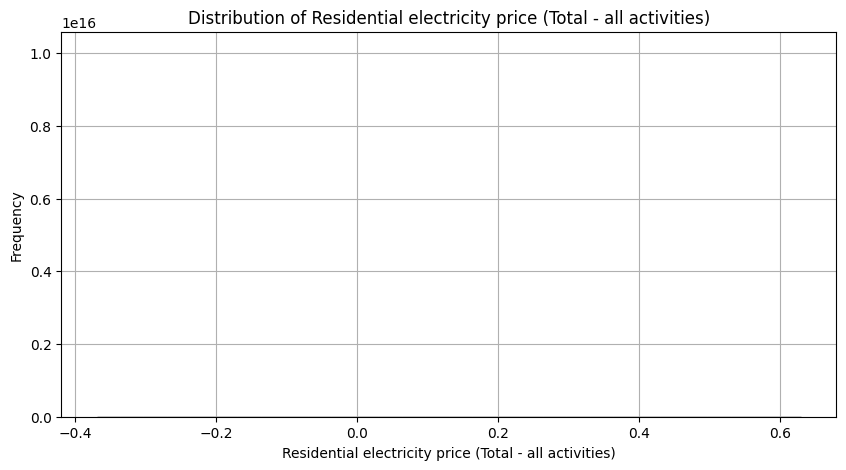

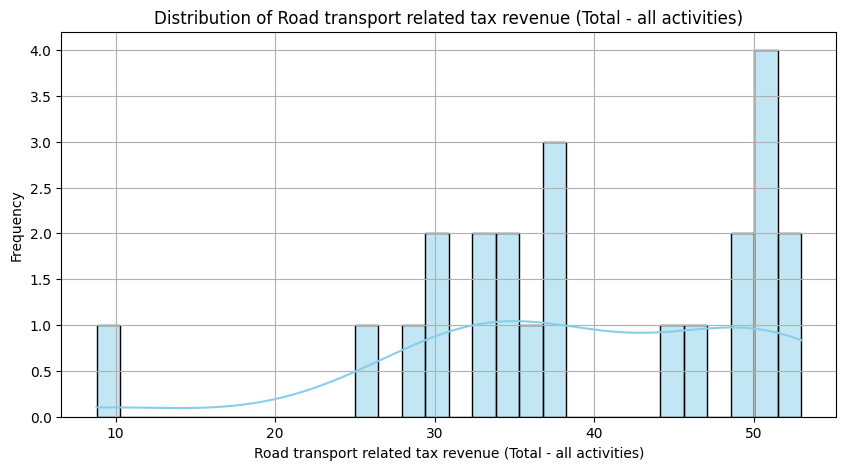

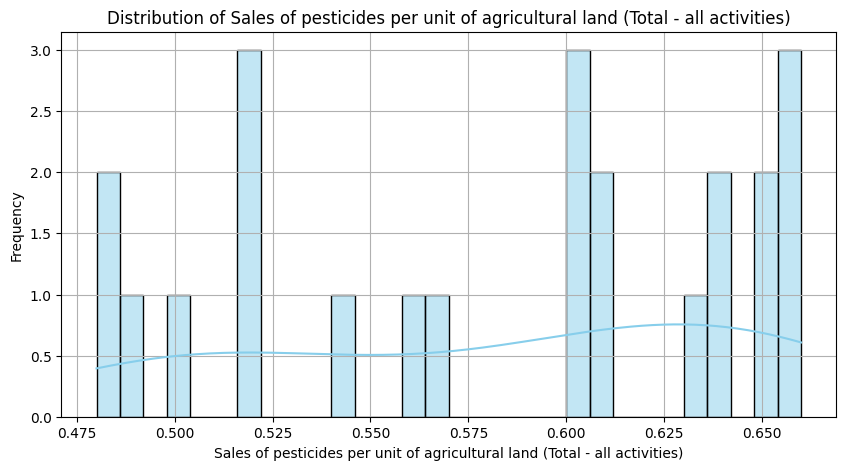

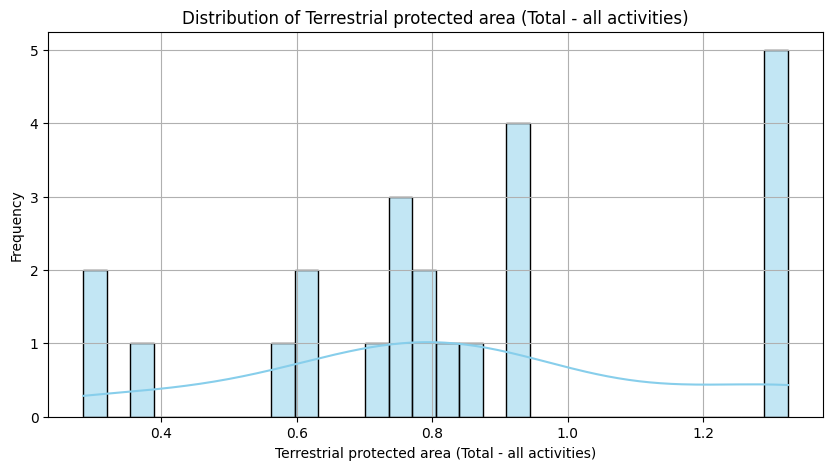

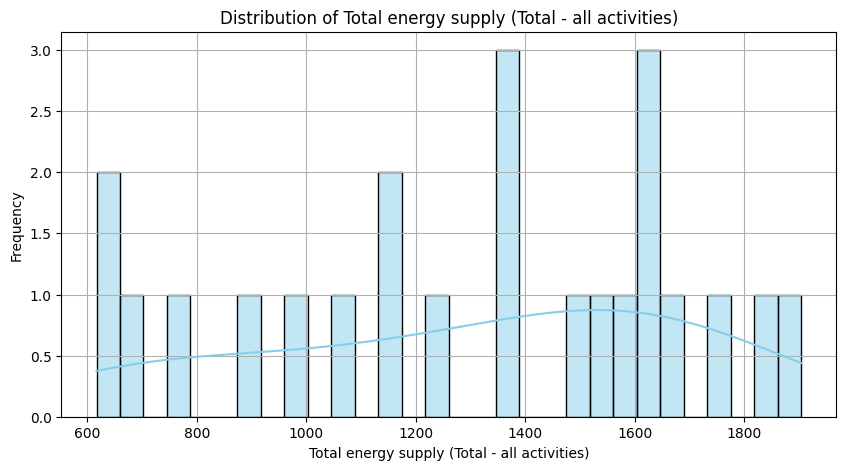

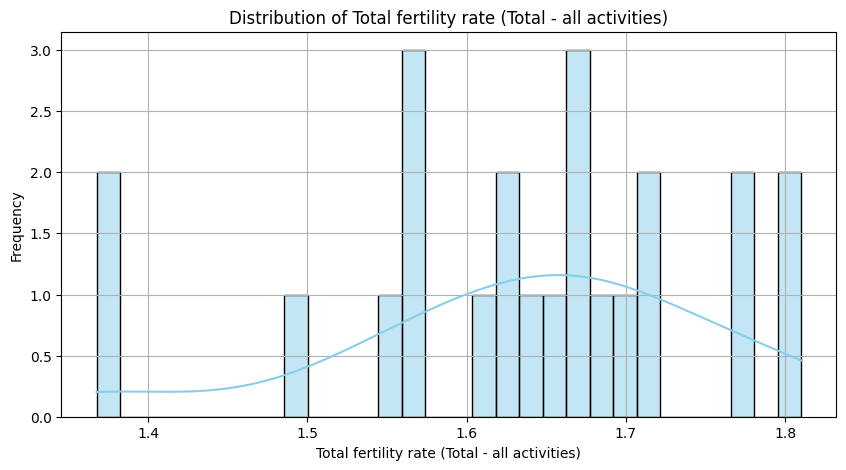

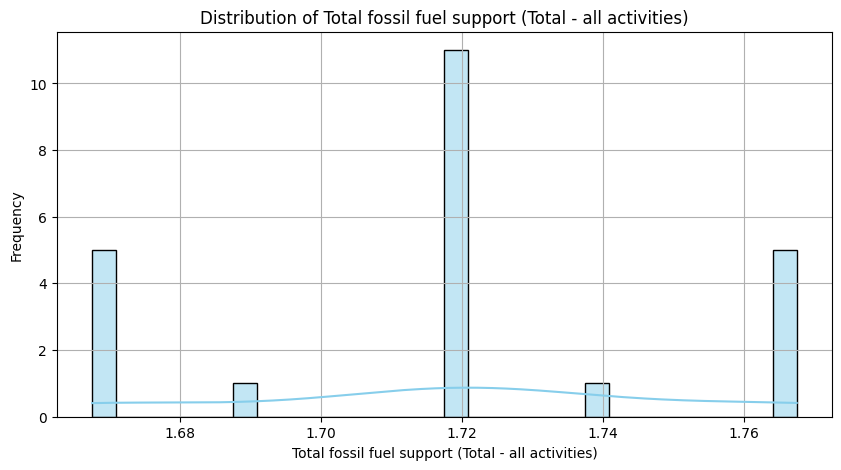

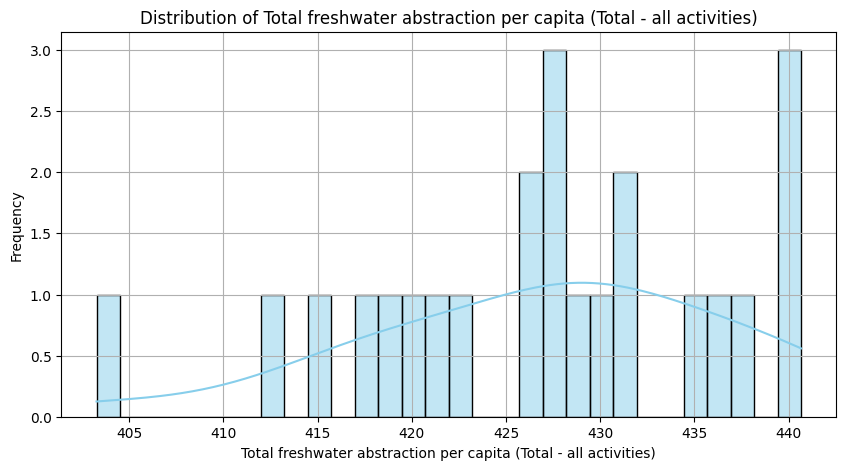

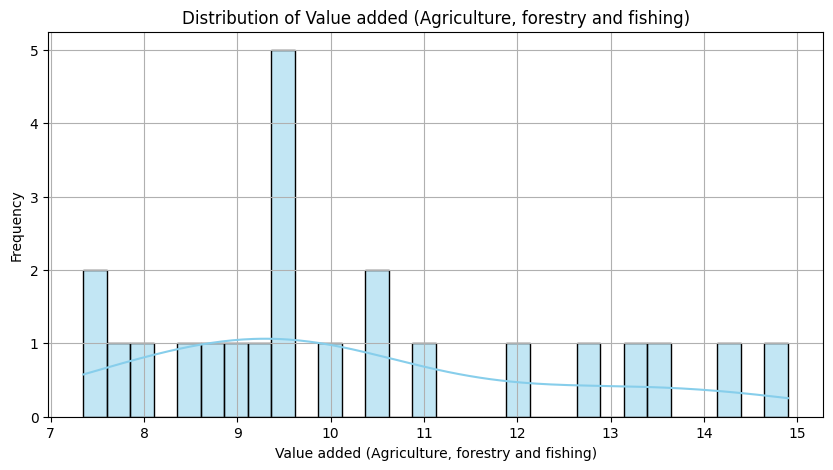

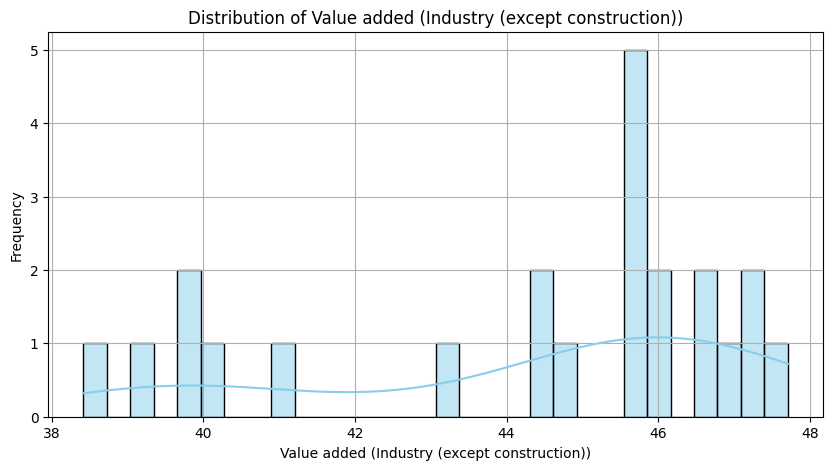

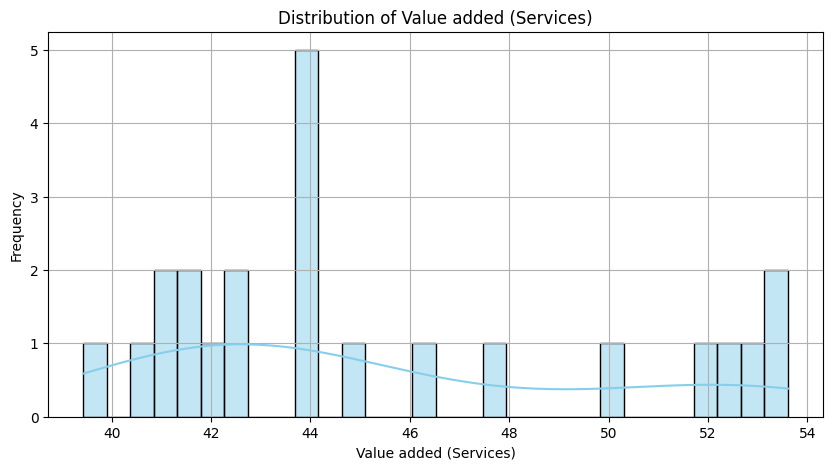

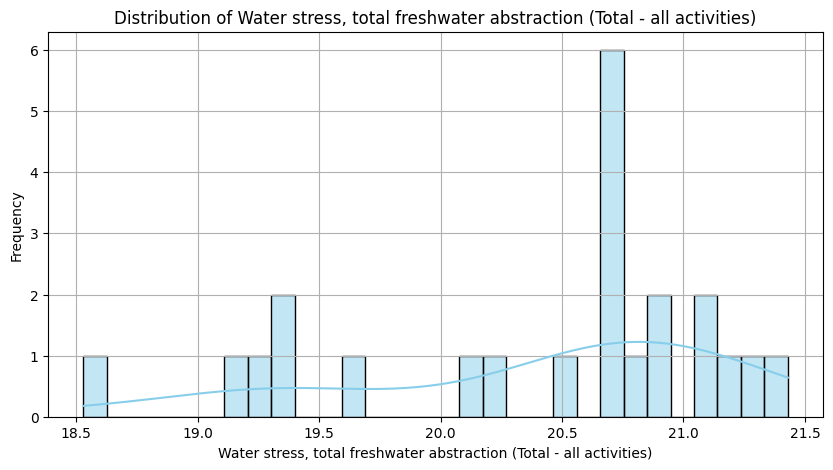

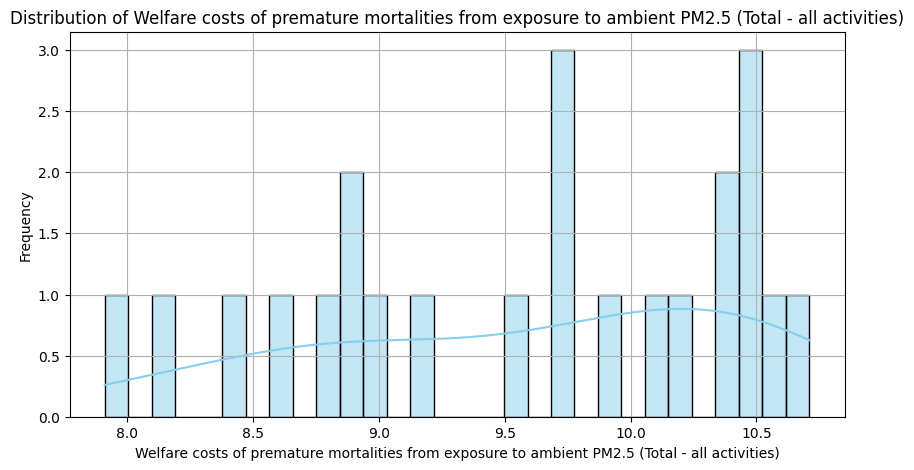

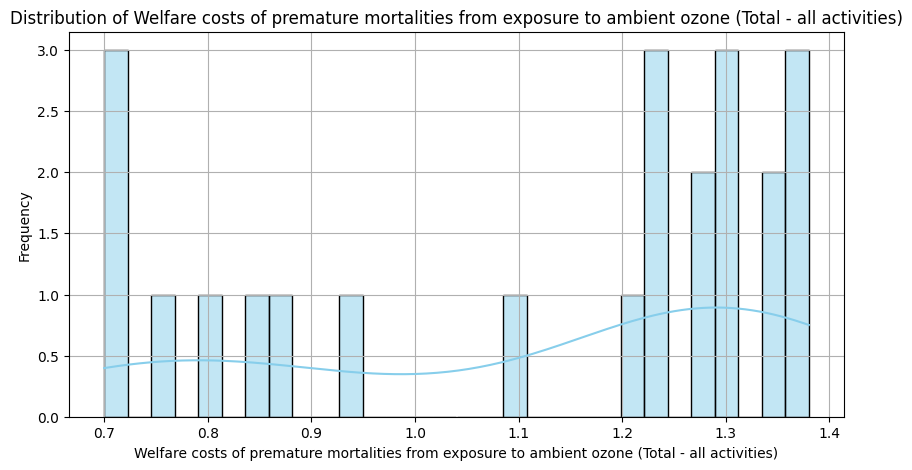

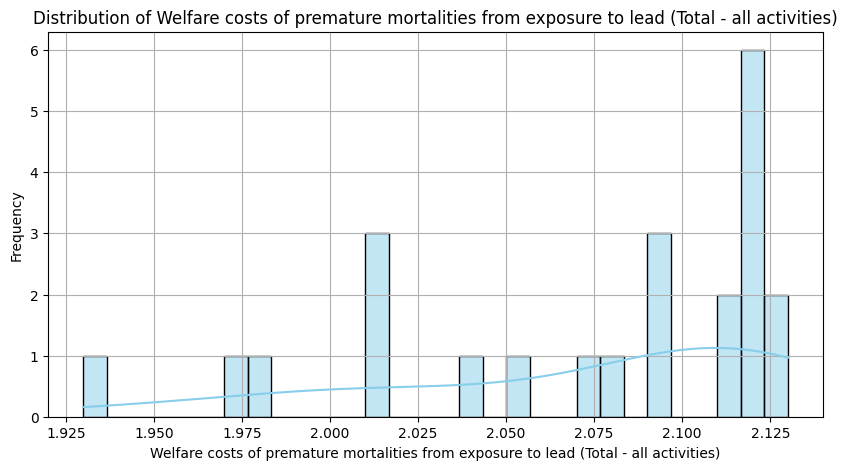

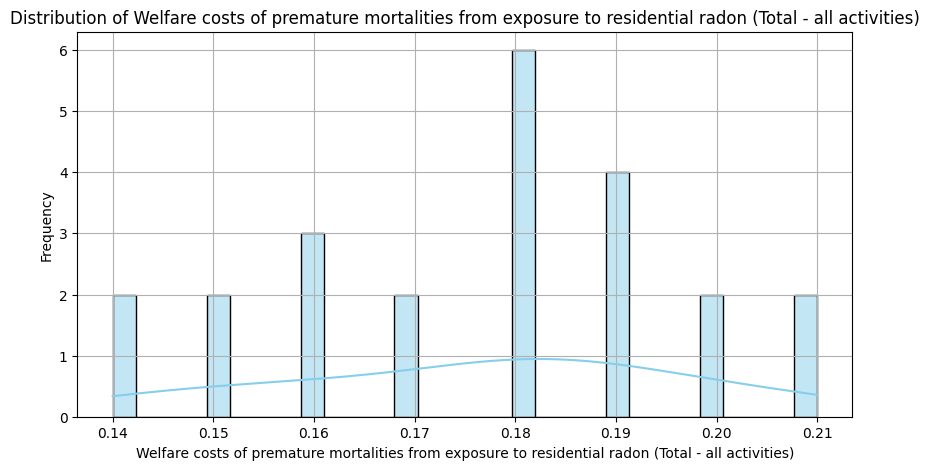

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih kolom numerik
numeric_columns = data_china.select_dtypes(include=['float64', 'int64']).columns

# Iterasi untuk semua kolom numerik
for column in numeric_columns:
    plt.figure(figsize=(10, 5))  # Ukuran gambar
    # Menghitung histogram
    sns.histplot(data_china[column], bins=30, kde=True, color='skyblue')  # Menambahkan kurva kepadatan
    plt.title(f'Distribution of {column}')  # Judul
    plt.xlabel(column)  # Label sumbu x
    plt.ylabel('Frequency')  # Label sumbu y
    plt.grid(True)  # Menampilkan grid
    plt.show()  # Menampilkan gambar

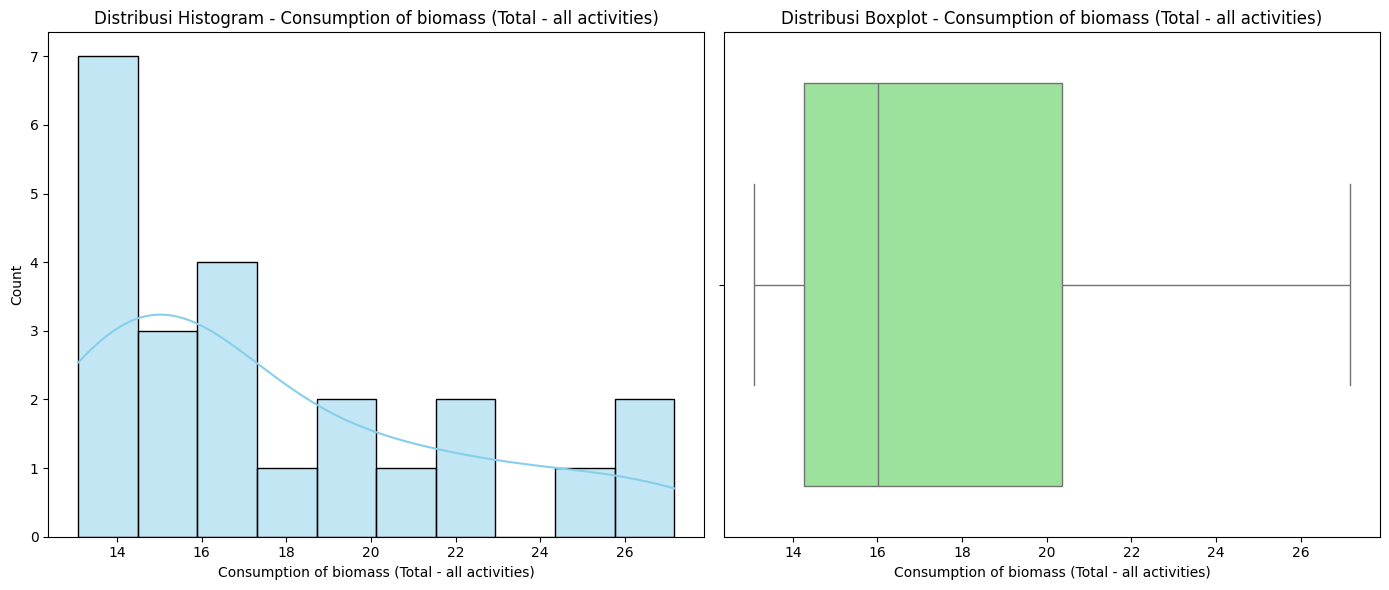

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ganti 'path_to_your_dataset.csv' dengan lokasi dataset Anda

# Memvisualisasikan kolom 'Consumption of biomass (Total - all activities)'
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data_china['Consumption of biomass (Total - all activities)'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Histogram - Consumption of biomass (Total - all activities)')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data_china['Consumption of biomass (Total - all activities)'], color='lightgreen')
plt.title('Distribusi Boxplot - Consumption of biomass (Total - all activities)')

# Menampilkan visualisasi
plt.tight_layout()
plt.show()


Berdasarkan visualisasi distribusi dari kolom "Consumption of biomass (Total - all activities)", terdapat beberapa insight yang dapat diperoleh:
Distribusi Data:

Data cenderung tidak simetris dan menunjukkan skewness ke arah kanan, dengan sebagian besar nilai berada di rentang yang lebih rendah (sekitar 14-16).
Ada penurunan tajam dalam jumlah pengamatan di nilai yang lebih tinggi, dengan sedikit pengamatan di atas angka 20.

## C.2.5. Hitunglah korelasi antar-fitur

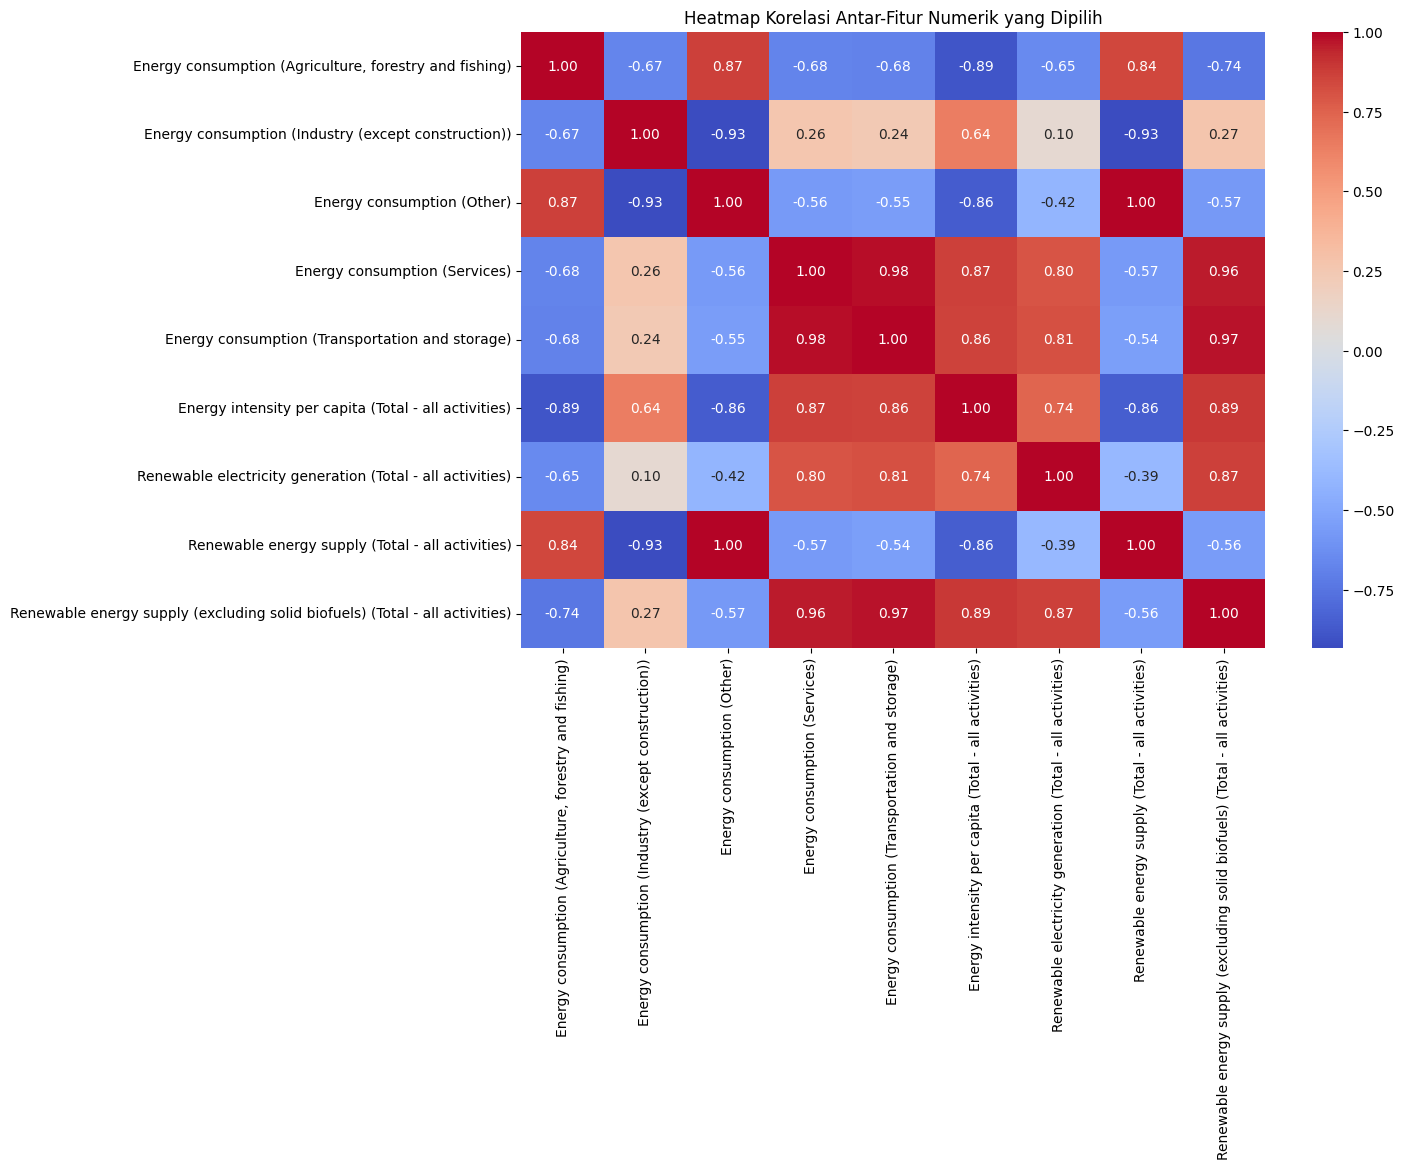

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Misalkan data_china sudah ada
# Pilih kolom-kolom yang ingin dianalisis
kolom_yang_dipilih = ['Energy consumption (Agriculture, forestry and fishing)',
                      'Energy consumption (Industry (except construction))',
                      'Energy consumption (Other)',
                      'Energy consumption (Services)',
                      'Energy consumption (Transportation and storage)',
                      'Energy intensity per capita (Total - all activities)',
                      'Renewable electricity generation (Total - all activities)',
                      'Renewable energy supply (Total - all activities)',
                      'Renewable energy supply (excluding solid biofuels) (Total - all activities)']

# Ambil kolom numerik yang dipilih
numerical_data = data_china[kolom_yang_dipilih].select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
correlation_matrix = numerical_data.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(12, 8))  # Menentukan ukuran heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Menampilkan heatmap
plt.title('Heatmap Korelasi Antar-Fitur Numerik yang Dipilih')
plt.show()


Korelasi Positif Tinggi **(warna merah mendekati 1.00)**: Menunjukkan bahwa ketika satu variabel meningkat, variabel lain cenderung meningkat secara linier. Misalnya, ada hubungan kuat antara:

1. **Energy consumption (Industry except construction) dan Energy consumption (Other) dengan korelasi 0.93**. Ini menunjukkan bahwa ketika konsumsi energi di sektor industri meningkat, konsumsi energi di sektor lain juga cenderung meningkat.

2. **Renewable energy supply dan Energy consumption (Other) dengan korelasi 1.00.** Artinya, keduanya sangat berkaitan. Jika pasokan energi terbarukan meningkat, konsumsi energi di sektor lain juga meningkat dengan kuat.

Korelasi Negatif Tinggi **(warna biru mendekati -1.00):** Menunjukkan hubungan terbalik, di mana jika satu variabel meningkat, variabel lain cenderung menurun. Misalnya:

korelasi negatif yang kuat antara **Energy consumption (Industry except construction) dan Energy consumption (Other)** dengan sektor-sektor seperti Agriculture, forestry and fishing (-0.67) dan Energy consumption (Services) (0.26). Ini mengindikasikan perbedaan pola konsumsi energi antar sektor.

# C.3.Feature Engineering

In [ ]:
# Renewable Energy Consumption
Renewable_Energy_Consumption = data_china['Renewable energy supply (Total - all activities)'] - data_china['Energy consumption (Other)']
print(Renewable_Energy_Consumption.head())

0   -23.55
1   -23.55
2   -23.55
3   -23.82
4   -23.43
dtype: float64


### Penjelasan Codingan:

1. **`Renewable_Energy_Consumption`**:
   - Kode ini menghitung **Renewable Energy Consumption** (Konsumsi Energi Terbarukan) dengan mengurangkan konsumsi energi dari sumber lain (**Energy consumption (Other)**) dari total suplai energi terbarukan (**Renewable energy supply (Total - all activities)**).
   - Rumus:
     \[
     \text{Renewable Energy Consumption} = \text{Renewable Energy Supply} - \text{Energy Consumption (Other)}
     \]
   - Ini menghasilkan perbedaan antara suplai energi terbarukan dan energi yang digunakan oleh sumber non-terbarukan.

2. **`print(Renewable_Energy_Consumption.head())`**:
   - Menampilkan 5 baris pertama dari hasil perhitungan konsumsi energi terbarukan untuk melihat nilai awalnya.

### Interpretasi Hasil:

- Nilai hasil seperti `-23.55`, `-23.82`, dan `-23.43` menunjukkan bahwa **konsumsi energi dari sumber non-terbarukan lebih besar daripada suplai energi terbarukan** sebesar 23.55 hingga 23.82 unit (misalnya, gigawatt-jam atau megawatt-jam, tergantung pada dataset).
- **Nilai negatif** berarti suplai energi terbarukan tidak cukup untuk memenuhi konsumsi energi, sehingga masih ada ketergantungan yang besar pada energi non-terbarukan.

### Kesimpulan:
- **Konsumsi energi terbarukan saat ini masih belum mencukupi** dibandingkan dengan konsumsi energi total dari sumber lain, yang mengindikasikan adanya ketergantungan besar pada energi non-terbarukan.
- **Masalah keberlanjutan**: Ini bisa menjadi masalah dari sudut pandang keberlanjutan, karena tujuan ideal adalah agar suplai energi terbarukan setidaknya bisa mencakup konsumsi total energi, sehingga ketergantungan pada energi non-terbarukan bisa dikurangi.

In [ ]:
total_energy_consumption = (
    data_china['Energy consumption (Agriculture, forestry and fishing)'] +
    data_china['Energy consumption (Industry (except construction))'] +
    data_china['Energy consumption (Other)'] +
    data_china['Energy consumption (Services)'] +
    data_china['Energy consumption (Transportation and storage)']
)

data_china['Non-Renewable Energy Consumption'] = total_energy_consumption - data_china['Renewable energy supply (Total - all activities)']
print(data_china[['Non-Renewable Energy Consumption']].head())

   Non-Renewable Energy Consumption
0                             80.99
1                             81.27
2                             81.72
3                             83.19
4                             87.11


### Penjelasan Codingan:

1. **`total_energy_consumption`**:
   Kode ini menghitung **total konsumsi energi** dengan menjumlahkan konsumsi energi dari berbagai sektor:
   - **Agriculture, forestry, and fishing**: Energi yang digunakan di sektor pertanian, kehutanan, dan perikanan.
   - **Industry (except construction)**: Konsumsi energi dari sektor industri, tidak termasuk konstruksi.
   - **Other**: Energi yang dikonsumsi oleh sektor lainnya (tidak termasuk sektor yang disebutkan secara eksplisit).
   - **Services**: Konsumsi energi dari sektor jasa.
   - **Transportation and storage**: Energi yang digunakan di sektor transportasi dan penyimpanan.

2. **`Non-Renewable Energy Consumption`**:
   - Setelah total konsumsi energi dari semua sektor dihitung, kode kemudian menghitung **Non-Renewable Energy Consumption** (konsumsi energi non-terbarukan) dengan mengurangi total suplai energi terbarukan dari total konsumsi energi.
   - Rumus:
     \[
     \text{Non-Renewable Energy Consumption} = \text{Total Energy Consumption} - \text{Renewable Energy Supply}
     \]
   - Nilai ini dimasukkan sebagai kolom baru di dataset (`data_china['Non-Renewable Energy Consumption']`).

3. **`print(data_china[['Non-Renewable Energy Consumption']].head())`**:
   - Menampilkan 5 baris pertama dari kolom **Non-Renewable Energy Consumption** untuk melihat hasil perhitungan.

### Interpretasi Hasil:
- Baris hasil menampilkan nilai konsumsi energi non-terbarukan untuk lima baris pertama.
- Nilai seperti `80.99`, `81.27`, dan `87.11` menunjukkan jumlah energi yang tidak berasal dari sumber terbarukan dalam unit yang digunakan oleh dataset (misalnya, gigawatt-jam atau megawatt-jam).
- **Peningkatan Nilai**: Seperti yang terlihat dari baris 3 hingga 4, nilai konsumsi energi non-terbarukan meningkat dari 83.19 menjadi 87.11, menunjukkan ketergantungan yang lebih besar pada sumber energi non-terbarukan di periode atau wilayah tersebut.

Secara keseluruhan, ini menandakan bahwa meskipun mungkin ada suplai energi terbarukan, penggunaan energi dari sumber non-terbarukan masih cukup signifikan dan bahkan cenderung meningkat.

In [ ]:
'''
# Simpan DataFrame ke file CSV
data_china.to_csv('data_china_processed.csv', index=False)

# Simpan DataFrame ke file Excel
data_china.to_excel('data_china_processed.xlsx', index=False)

# Untuk menyimpan ke Google Drive, Anda dapat menentukan path di Google Drive
# Misalnya, jika Anda ingin menyimpan file di folder 'My Drive/Data'
data_china.to_csv('data_china_processed.csv', index=False)
'''

"\n# Simpan DataFrame ke file CSV\ndata_china.to_csv('data_china_processed.csv', index=False)\n\n# Simpan DataFrame ke file Excel\ndata_china.to_excel('data_china_processed.xlsx', index=False)\n\n# Untuk menyimpan ke Google Drive, Anda dapat menentukan path di Google Drive\n# Misalnya, jika Anda ingin menyimpan file di folder 'My Drive/Data'\ndata_china.to_csv('data_china_processed.csv', index=False)\n"

In [ ]:
data_china.head()

time_period  Adjustment for pollution abatement (Total - all activities)  \
0         2000                                              -0.41             
1         2001                                              -0.41             
2         2002                                              -0.99             
3         2003                                              -1.18             
4         2004                                              -1.18             

   CO2 emissions from air transport per capita (Total - all activities)  \
0                                              57.04                      
1                                              57.04                      
2                                              57.04                      
3                                              57.04                      
4                                              57.04                      

   CO2 emissions from air transport per unit of GDP (Total - all activities)  \
0                                               4.16                           
1                                               4.16                           
2                                               4.16                           
3                                               4.16                           
4                                               4.16                           

   Coal support (Total - all activities)  \
0                                  19.79   
1                                  19.79   
2                                  19.79   
3                                  19.79   
4                                  19.79   

   Consumption of biomass (Total - all activities)  \
0                                            27.17   
1                                            26.17   
2                                            25.25   
3                                            22.77   
4                                            22.03   

   Consumption of metals (Total - all activities)  \
0                                            6.19   
1                                            6.22   
2                                            6.46   
3                                            6.82   
4                                            7.47   

   Consumption of non-metallic minerals (Total - all activities)  \
0                                              66.64               
1                                              67.61               
2                                              68.30               
3                                              70.41               
4                                              70.49               

   Contribution of natural capital (Total - all activities)  \
0                                               0.05          
1                                               0.04          
2                                               0.08          
3                                               0.19          
4                                               0.39          

   Demand-based CO2 emissions (Total - all activities)  \
0                                            1422.98     
1                                            1515.45     
2                                            1622.61     
3                                            1804.77     
4                                            2005.74     

   Demand-based CO2 intensity energy-related CO2 per capita (Total - all activities)  \
0                                               2.13                                   
1                                               2.25                                   
2                                               2.40                                   
3                                               2.65                                   
4                                               2.93                                   

   Demand-based CO2 p

In [ ]:
for column in data_china.columns:
  print(column)
'Renewable energy supply (Total - all activities)'

time_period
Adjustment for pollution abatement (Total - all activities)
CO2 emissions from air transport per capita (Total - all activities)
CO2 emissions from air transport per unit of GDP (Total - all activities)
Coal support (Total - all activities)
Consumption of biomass (Total - all activities)
Consumption of metals (Total - all activities)
Consumption of non-metallic minerals (Total - all activities)
Contribution of natural capital (Total - all activities)
Demand-based CO2 emissions (Total - all activities)
Demand-based CO2 intensity energy-related CO2 per capita (Total - all activities)
Demand-based CO2 productivity relative to disposable income (Total - all activities)
Demand-based CO2 productivity, GDP per unit of energy-related CO2 emissions (Total - all activities)
Demand-based GHG emissions (Total - all activities)
Demand-based GHG intensity energy-related GHG per capita (Total - all activities)
Demand-based GHG productivity relative to disposable income (Total - all activi

'Renewable energy supply (Total - all activities)'

# **Assignment 3 - Machine Learning**

# **A. Introduction**

**Organisation for Economic Co-operation and Development (OECD)** adalah organisasi internasional yang didirikan pada tahun 1961 dan terdiri dari 38 negara anggota, fokus pada pertumbuhan ekonomi berkelanjutan dan peningkatan kesejahteraan global. Meskipun **China** bukan anggota OECD, negara ini merupakan **Key Partner**, yang secara aktif terlibat dalam dialog kebijakan dan kolaborasi di berbagai isu global. Status ini memungkinkan Cina untuk berpartisipasi dalam inisiatif OECD tanpa menjadi anggota penuh.

Sumber: [OECD-China](https://www.oecd.org/en/countries/china-people-s-republic-of.html)

# **B. Data yang digunakan**

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Proses ekstraksi data
data_oecd_china = pd.read_csv('https://raw.githubusercontent.com/RiziqAden/Tugas-C-16-Mei-2024/refs/heads/main/oecd_china.csv')

# Tampilkan hasilnya
display(data_oecd_china.head())

time_period  Adjustment for pollution abatement (Total - all activities)  \
0         2000                                              -0.04             
1         2001                                              -0.41             
2         2002                                              -0.99             
3         2003                                              -1.51             
4         2004                                              -1.51             

   CO2 emissions from air transport per capita (Total - all activities)  \
0                                                NaN                      
1                                                NaN                      
2                                                NaN                      
3                                                NaN                      
4                                                NaN                      

   CO2 emissions from air transport per unit of GDP (Total - all activities)  \
0                                                NaN                           
1                                                NaN                           
2                                                NaN                           
3                                                NaN                           
4                                                NaN                           

   Coal support (Total - all activities)  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   Consumption of biomass (Total - all activities)  \
0                                            27.17   
1                                            26.17   
2                                            25.25   
3                                            22.77   
4                                            22.03   

   Consumption of metals (Total - all activities)  \
0                                            6.19   
1                                            6.22   
2                                            6.46   
3                                            6.82   
4                                            7.47   

   Consumption of non-metallic minerals (Total - all activities)  \
0                                              66.64               
1                                              67.61               
2                                              68.30               
3                                              70.41               
4                                              70.49               

   Contribution of natural capital (Total - all activities)  \
0                                               0.05          
1                                               0.04          
2                                               0.08          
3                                               0.19          
4                                               0.39          

   Conversion of non-water topermanent water surface (Total - all activities)  \
0                                                NaN                            
1                                                NaN                            
2                                                NaN                            
3                                                NaN                            
4                                                NaN                            

   Conversion of permanent water to not-water surface (Total - all activities)  \
0                                                NaN                             
1                                                NaN                             
2                                                NaN                             
3                                                NaN                             
4 

In [ ]:
# akses informasi umum pada data
display(data_oecd_china.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Columns: 110 entries, time_period to Welfare costs of premature mortalities from exposure to residential radon (Total - all activities)
dtypes: float64(109), int64(1)
memory usage: 19.9 KB


None

# **C. Data Preparation**

## C.1.1 Missing value

In [ ]:
# Tampilkan jumlah data
print(f'Jumlah Data : {data_oecd_china.shape[0]} Baris\n')

# Hitung missing value
data_kosong = data_oecd_china.isna().sum().to_frame(name = 'Jumlah Missing Value').reset_index()
data_kosong['Persentase NULL %'] = 100 * (data_kosong['Jumlah Missing Value'] /data_oecd_china.shape[0]).round(4)

# Tampilkan hasilnya
data_kosong = data_kosong.style\
    .map(lambda val : 'background-color: red' if val > 50 else '', subset=['Persentase NULL %'])\
    .format({'Persentase NULL %': '{:.2f}'})

display(data_kosong)

Jumlah Data : 23 Baris



mengatasi missing value

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Threshold untuk menghapus kolom dengan missing value
threshold_drop = 90

# Hitung persentase missing value
missing_percentage = (data_oecd_china.isna().sum() / len(data_oecd_china)) * 100

# Drop kolom dengan missing value lebih dari 90%
data_cleaned = data_oecd_china.loc[:, missing_percentage < threshold_drop]

# Imputation
imputer = SimpleImputer(strategy='median')  # Menggunakan median
data_china = pd.DataFrame(imputer.fit_transform(data_cleaned), columns=data_cleaned.columns)

# Ubah kolom 'time_period' menjadi integer (hilangkan desimal)
if 'time_period' in data_china.columns:
    data_china['time_period'] = data_china['time_period'].astype(int)

# Tampilkan hasilnya setelah drop, imputasi, dan konversi tipe
print(f"\nJumlah data setelah drop dan imputasi: {data_china.shape[0]} baris, {data_china.shape[1]} kolom\n")
display(data_china.head())


Jumlah data setelah drop dan imputasi: 23 baris, 102 kolom



time_period  Adjustment for pollution abatement (Total - all activities)  \
0         2000                                              -0.04             
1         2001                                              -0.41             
2         2002                                              -0.99             
3         2003                                              -1.51             
4         2004                                              -1.51             

   CO2 emissions from air transport per capita (Total - all activities)  \
0                                              57.04                      
1                                              57.04                      
2                                              57.04                      
3                                              57.04                      
4                                              57.04                      

   CO2 emissions from air transport per unit of GDP (Total - all activities)  \
0                                               4.16                           
1                                               4.16                           
2                                               4.16                           
3                                               4.16                           
4                                               4.16                           

   Coal support (Total - all activities)  \
0                                  19.79   
1                                  19.79   
2                                  19.79   
3                                  19.79   
4                                  19.79   

   Consumption of biomass (Total - all activities)  \
0                                            27.17   
1                                            26.17   
2                                            25.25   
3                                            22.77   
4                                            22.03   

   Consumption of metals (Total - all activities)  \
0                                            6.19   
1                                            6.22   
2                                            6.46   
3                                            6.82   
4                                            7.47   

   Consumption of non-metallic minerals (Total - all activities)  \
0                                              66.64               
1                                              67.61               
2                                              68.30               
3                                              70.41               
4                                              70.49               

   Contribution of natural capital (Total - all activities)  \
0                                               0.05          
1                                               0.04          
2                                               0.08          
3                                               0.19          
4                                               0.39          

   Demand-based CO2 emissions (Total - all activities)  \
0                                            1422.98     
1                                            1515.45     
2                                            1622.61     
3                                            1804.78     
4                                            2005.74     

   Demand-based CO2 intensity energy-related CO2 per capita (Total - all activities)  \
0                                               2.13                                   
1                                               2.25                                   
2                                               2.40                                   
3                                               2.65                                   
4                                               2.93                                   

   Demand-based CO2 p

## C.1.2 Duplikasi Data

In [ ]:
print(f'Banyak duplikasi pada data : {data_china.duplicated().sum()}')

Banyak duplikasi pada data : 0


## C.1.3 Outlier

deteksi outlier

In [ ]:
import pandas as pd

# Definisikan fungsi untuk mendeteksi outliers
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Ambil kolom numerik tanpa kolom 'time_period'
number_column = data_china.select_dtypes(include='number').drop(columns=['time_period'])

# List untuk menyimpan jumlah outlier
list_jumlah_outlier = []

# Hitung jumlah outlier untuk setiap kolom
for col in number_column.columns:
    jumlah_outlier = detect_outliers(number_column[col]).sum()
    list_jumlah_outlier.append(jumlah_outlier)

# Buat DataFrame untuk menampilkan hasil
data_outlier = pd.DataFrame({
    'measure': number_column.columns,
    'Jumlah Outlier': list_jumlah_outlier,
})

# Tampilkan hasil dengan style
style_data_outlier = data_outlier.style\
    .map(lambda val: 'background-color: red' if val > 0 else '', subset=['Jumlah Outlier'])

# Tampilkan hasil
display(style_data_outlier)

mengatasi outlier

In [ ]:
# Ambil kolom numerik tanpa kolom 'time_period'
number_column = data_china.select_dtypes(include='number').drop(columns=['time_period'])

In [ ]:
import pandas as pd
import numpy as np

def replace_outliers_iqr(df):

    # Menghitung Q1 dan Q3
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti outlier
    df = np.select(
        [df > upper_bound, df < lower_bound],
        [upper_bound, lower_bound],
        default = df
    )

    return df

In [ ]:
for col in number_column.columns :
    number_column[col] = replace_outliers_iqr(number_column[col])

In [ ]:
import pandas as pd

# Fungsi untuk mendeteksi outlier
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Ambil kolom numerik dari DataFrame yang telah ditangani
number_columns = number_column  # Jika number_column adalah data yang sudah ditangani outlier

# List untuk menyimpan jumlah outlier
outlier_counts = []

# Hitung jumlah outlier untuk setiap kolom
for col in number_columns.columns:
    outlier_count = detect_outliers_iqr(number_columns[col]).sum()
    outlier_counts.append(outlier_count)

# Buat DataFrame untuk menampilkan hasil
outlier_summary = pd.DataFrame({
    'Measure': number_columns.columns,
    'Jumlah Outlier': outlier_counts,
})

# Tampilkan hasil
style_outlier_summary = outlier_summary.style\
    .map(lambda val: 'background-color: red' if val > 0 else '', subset=['Jumlah Outlier'])

display(style_outlier_summary)


Feeture engineering

In [ ]:
import pandas as pd

# Menghitung total_energy_consumption dari number_column
total_energy_consumption = (
    number_column['Energy consumption (Agriculture, forestry and fishing)'] +
    number_column['Energy consumption (Industry (except construction))'] +
    number_column['Energy consumption (Other)'] +
    number_column['Energy consumption (Services)'] +
    number_column['Energy consumption (Transportation and storage)']
)

# Menambahkan kolom Non-Renewable Energy Consumption ke number_column
number_column['Non-Renewable Energy Consumption'] = total_energy_consumption - number_column['Renewable energy supply (Total - all activities)']

# Menampilkan hasil kolom Non-Renewable Energy Consumption
print(number_column[['Non-Renewable Energy Consumption']].head())

   Non-Renewable Energy Consumption
0                             80.99
1                             81.27
2                             81.72
3                             83.19
4                             87.11


<ipython-input-77-5bc7fa764d3a>:13: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



# D. EDA

## D.1.1 Mengambil data Fix

**China memiliki target ambisius untuk mencapai net zero carbon pada tahun 2060.** Namun, tingginya konsumsi energi non-renewable, seperti batu bara dan minyak bumi, menjadi tantangan besar dalam upaya ini. Untuk mengurangi ketergantungan pada energi non-renewable, penting untuk memahami faktor-faktor yang memengaruhi penggunaannya.

Penelitian ini **bertujuan untuk menganalisis beberapa variabel yang mungkin berdampak pada konsumsi energi non-renewable di China**, seperti dukungan terhadap batu bara, konsumsi biomassa, dukungan untuk bahan bakar fosil, dan produksi listrik dari energi terbarukan. Dengan memahami faktor-faktor ini, diharapkan kita dapat memberikan wawasan yang berguna untuk mendukung China dalam mencapai target net zero carbon pada tahun 2060.

resource : [China Not Zero Carbon 2060](https://www.irena.org/Publications/2022/Jul/Chinas-Route-to-Carbon-Neutrality)

In [ ]:
# Daftar kolom yang ingin dipilih
selected_columns = [
    'Non-Renewable Energy Consumption',
    'Coal support (Total - all activities)',
    'Consumption of biomass (Total - all activities)',
    'Consumption of metals (Total - all activities)',
    'Fossil fuel consumer support (Total - all activities)',
    'Renewable electricity generation (Total - all activities)',
    'Demand-based CO2 productivity, GDP per unit of energy-related CO2 emissions (Total - all activities)',
]

# Membuat DataFrame baru dengan kolom yang dipilih
data_china = number_column[selected_columns]

In [ ]:
display (data_china.head())

Non-Renewable Energy Consumption  Coal support (Total - all activities)  \
0                             80.99                                  19.79   
1                             81.27                                  19.79   
2                             81.72                                  19.79   
3                             83.19                                  19.79   
4                             87.11                                  19.79   

   Consumption of biomass (Total - all activities)  \
0                                            27.17   
1                                            26.17   
2                                            25.25   
3                                            22.77   
4                                            22.03   

   Consumption of metals (Total - all activities)  \
0                                            6.19   
1                                            6.22   
2                                            6.46   
3                                            6.82   
4                                            7.47   

   Fossil fuel consumer support (Total - all activities)  \
0                                              42.40       
1                                              42.40       
2                                              42.40       
3                                              42.40       
4                                              42.40       

   Renewable electricity generation (Total - all activities)  \
0                                              16.64           
1                                              18.96           
2                                              17.62           
3                                              15.04           
4                                              16.22           

   Demand-based CO2 productivity, GDP per unit of energy-related CO2 emissions (Total - all activities)  
0                                               1.62                                                     
1                                               1.65                                                     
2                                               1.68                                                     
3                                               1.66                                                     
4                                               1.65

## D.1.2 Statistik Deskriptif

In [ ]:
# Hitung statistik deskriptif
statistics = pd.DataFrame({
    'mean' : data_china.mean().round(2),
    'median': data_china.median(),
    'modus': data_china.mode().iloc[0],
    'min': data_china.min(),
    'max': data_china.max(),
    'q1' : data_china.quantile(0.25),
    'q2' : data_china.quantile(0.50),
    'q3' : data_china.quantile(0.75),
    'stdev' : data_china.std().round(2)
})

# Tampilkan hasilnya
display(statistics.T)

Non-Renewable Energy Consumption  \
mean                               88.88   
median                             90.33   
modus                              87.71   
min                                80.99   
max                                92.54   
q1                                 87.71   
q2                                 90.33   
q3                                 91.31   
stdev                               3.67   

        Coal support (Total - all activities)  \
mean                                    20.88   
median                                  19.79   
modus                                   19.79   
min                                     13.50   
max                                     29.65   
q1                                      19.55   
q2                                      19.79   
q3                                      23.59   
stdev                                    5.70   

        Consumption of biomass (Total - all activities)  \
mean                                              17.73   
median                                            16.01   
modus                                             16.01   
min                                               13.08   
max                                               27.17   
q1                                                14.28   
q2                                                16.01   
q3                                                20.37   
stdev                                              4.36   

        Consumption of metals (Total - all activities)  \
mean                                             10.14   
median                                           10.89   
modus                                            10.89   
min                                               6.19   
max                                              12.42   
q1                                                8.62   
q2                                               10.89   
q3                                               11.98   
stdev                                             2.16   

        Fossil fuel consumer support (Total - all activities)  \
mean                                                42.33       
median                                              42.40       
modus                                               42.40       
min                                                 41.54       
max                                                 43.04       
q1                                                  42.10       
q2                                                  42.40       
q3                                                  42.47       
stdev                                                0.52       

        Renewable electricity generation (Total - all activities)  \
mean                                                20.25           
median                                              18.79           
modus                                               15.04           
min                                                 15.04           
max                                                 28.24           
q1                                                  16.70           
q2                                                  18.79           
q3                                                  24.26           
stdev                                                4.32           

        Demand-based CO2 productivity, GDP per unit of energy-related CO2 emissions (Total - all activities)  
mean                                                 1.85                                                     
median                                               1.81                                                     
modus                                                1.81                                                     
min                                                  1.62                                                     
max    

Dari data diperoleh informasi terkait dukungan terhadap:
1.  **batu bara rata-rata 20.88, dengan standar deviasi sebesar 5.70, menunjukkan variasi yang cukup tinggi**. Dukungan terhadap batu bara ini bisa menjadi faktor yang signifikan dalam konsumsi energi non-renewable.

2. Renewable Electricity Generation:** Rata-rata sebesar 20.25 dengan variasi yang cukup besar (standar deviasi 4.32).** Peningkatan kapasitas energi terbarukan ini penting untuk mengurangi konsumsi energi non-renewable.

proses scalling

In [ ]:
data_china.head()

Non-Renewable Energy Consumption  Coal support (Total - all activities)  \
0                             80.99                                  19.79   
1                             81.27                                  19.79   
2                             81.72                                  19.79   
3                             83.19                                  19.79   
4                             87.11                                  19.79   

   Consumption of biomass (Total - all activities)  \
0                                            27.17   
1                                            26.17   
2                                            25.25   
3                                            22.77   
4                                            22.03   

   Consumption of metals (Total - all activities)  \
0                                            6.19   
1                                            6.22   
2                                            6.46   
3                                            6.82   
4                                            7.47   

   Fossil fuel consumer support (Total - all activities)  \
0                                              42.40       
1                                              42.40       
2                                              42.40       
3                                              42.40       
4                                              42.40       

   Renewable electricity generation (Total - all activities)  \
0                                              16.64           
1                                              18.96           
2                                              17.62           
3                                              15.04           
4                                              16.22           

   Demand-based CO2 productivity, GDP per unit of energy-related CO2 emissions (Total - all activities)  
0                                               1.62                                                     
1                                               1.65                                                     
2                                               1.68                                                     
3                                               1.66                                                     
4                                               1.65

## D.1.3 Korelasi

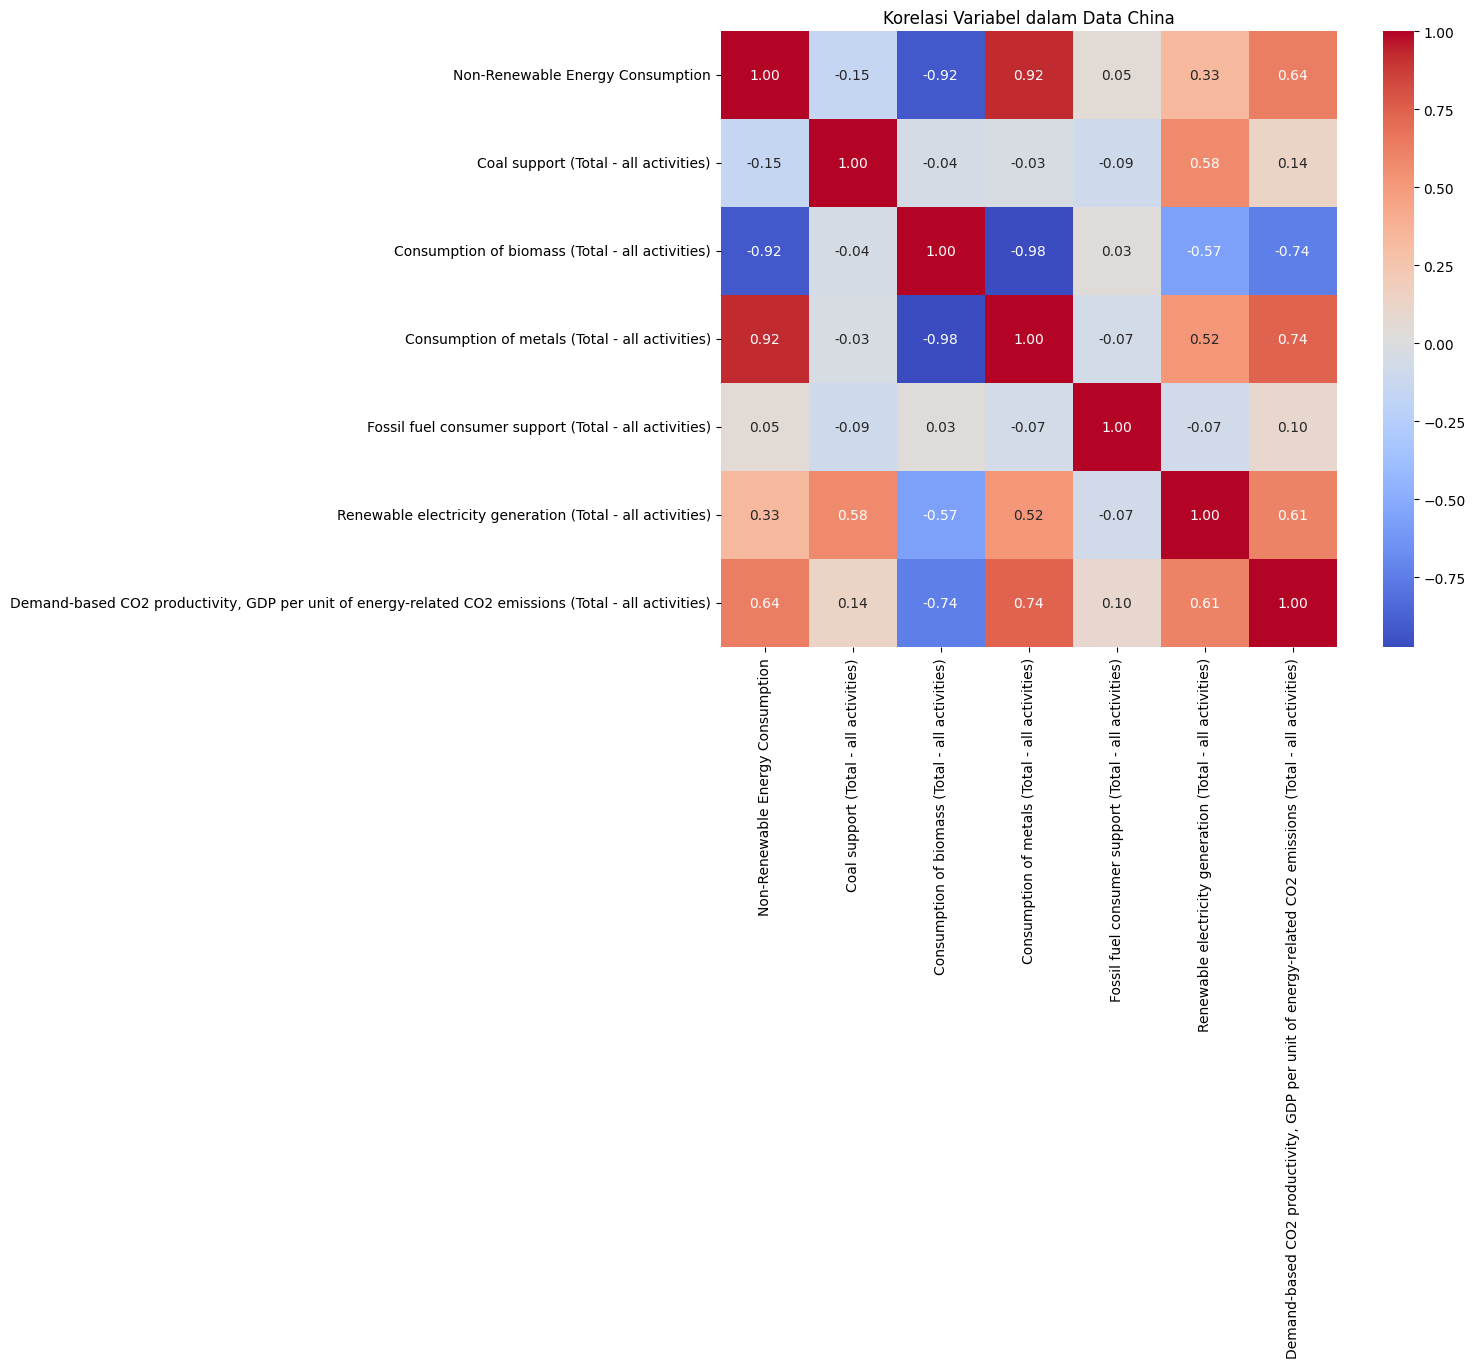

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = data_china.corr()

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Korelasi Variabel dalam Data China')
plt.show()

Korelasi -0.92 antara Consumption of Biomass dan Non-Renewable Energy Consumption menunjukkan adanya hubungan negatif yang sangat kuat. Ini berarti bahwa ketika konsumsi biomassa meningkat, konsumsi energi non-renewable cenderung menurun, dan sebaliknya. Biomassa mungkin digunakan sebagai sumber energi alternatif yang mengurangi ketergantungan pada energi non-renewable seperti batu bara atau minyak bumi.

Korelasi -0.98 antara Consumption of Biomass dan Consumption of Metals menunjukkan hubungan negatif yang sangat kuat. Kolerasi ini bisa menunjukkan bahwa kedua sumber daya ini mungkin digunakan sebagai alternatif satu sama lain dalam berbagai proses atau sektor energi dan industri. Misalnya, ketika lebih banyak biomassa digunakan sebagai bahan bakar atau bahan baku, kebutuhan atau permintaan akan logam bisa berkurang, mungkin karena pergeseran teknologi atau perubahan pada bahan yang digunakan dalam proses produksi.

In [ ]:
target = ['Non-Renewable Energy Consumption']
features = [
    'Coal support (Total - all activities)',
    'Consumption of biomass (Total - all activities)',
    'Fossil fuel consumer support (Total - all activities)',
    'Renewable electricity generation (Total - all activities)',
    'Demand-based CO2 productivity, GDP per unit of energy-related CO2 emissions (Total - all activities)'
]
X = data_china[features]
y = data_china[target]

Variabel independen (features) adalah faktor-faktor yang diprediksi akan memengaruhi konsumsi energi non-renewable.
Variabel dependen (target) adalah Non-Renewable Energy Consumption (Konsumsi Energi Non-Terbarukan), yang ingin kamu prediksi berdasarkan variabel independen di atas.

## D.4 Variance Inflation Factor (VIF)


Variance Inflation Factor (VIF) adalah ukuran yang digunakan untuk mendeteksi multikolinearitas dalam model regresi. Multikolinearitas terjadi ketika dua atau lebih variabel independen dalam model regresi memiliki korelasi yang tinggi satu sama lain, yang dapat menyebabkan masalah dalam estimasi koefisien regresi.
<br><br>
<table>
    <thead>
        <tr>
            <th>Nilai VIF</th>
            <th>Interpretasi</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>VIF = 1</td>
            <td>Tidak ada korelasi antara variabel independen tersebut dan yang lainnya.</td>
        </tr>
        <tr>
            <td>1 < VIF < 5</td>
            <td>Korelasi rendah, tidak ada masalah serius.</td>
        </tr>
        <tr>
            <td>5 <= VIF < 10</td>
            <td>Menandakan potensi masalah multikolinearitas.</td>
        </tr>
        <tr>
            <td>VIF ≥ 10</td>
            <td>Menunjukkan multikolinearitas yang serius dan biasanya dianggap sebagai batasan yang harus diperhatikan.</td>
        </tr>
    </tbody>
</table>
<br><br>

VIF Digunakan untuk
* Stabilitas Model: Multikolinearitas dapat membuat estimasi koefisien regresi tidak stabil dan sulit untuk diinterpretasikan.
* Pengujian Hipotesis: Mempengaruhi hasil pengujian hipotesis, yang dapat menyesatkan dalam pengambilan keputusan.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

# Mengambil fitur dari data
X = data_china[features]

# Menambahkan konstanta untuk VIF
X = add_constant(X)

# Menghitung VIF untuk setiap variabel
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Menghapus baris untuk konstanta
vif_data = vif_data.loc[vif_data['Variable'] != 'const']

# Tipe VIF
condition_VIF = [
    vif_data['VIF'] == 1,
    (1 < vif_data['VIF']) & (vif_data['VIF'] < 5),
    (5 <= vif_data['VIF']) & (vif_data['VIF'] < 10),
]

values_VIF = [
    'Tidak Ada Korelasi',
    'Korelasi Rendah',
    'Berpotensi Multikolinearitas',
]

# Menambahkan kolom tipe VIF
vif_data['tipe VIF'] = np.select(condition_VIF, values_VIF, default='Multikolinearitas Serius')

# Tampilkan hasilnya
display(vif_data)


Variable  VIF         tipe VIF
1              Coal support (Total - all activities) 1.88  Korelasi Rendah
2    Consumption of biomass (Total - all activities) 2.63  Korelasi Rendah
3  Fossil fuel consumer support (Total - all acti... 1.06  Korelasi Rendah
4  Renewable electricity generation (Total - all ... 3.09  Korelasi Rendah
5  Demand-based CO2 productivity, GDP per unit of... 2.67  Korelasi Rendah

# E. PEMODELAN

## 1. Pendefinisian Variabel

In [ ]:
target = ['Non-Renewable Energy Consumption']
features = [
    'Coal support (Total - all activities)',
    'Consumption of biomass (Total - all activities)',
    'Fossil fuel consumer support (Total - all activities)',
    'Renewable electricity generation (Total - all activities)',
    'Demand-based CO2 productivity, GDP per unit of energy-related CO2 emissions (Total - all activities)'
]
X = data_china[features]
y = data_china[target]

## Scalling

In [ ]:
# Import library yang dibutuhkan
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi scaler
min_max_scaler = MinMaxScaler()

# Melakukan scaling
X_scaled = min_max_scaler.fit_transform(X)

# Mengembalikan hasil scaling ke dalam DataFrame
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

# Tampilkan hasilnya
display(X_scaled.head())

Coal support (Total - all activities)  \
0                                   0.39   
1                                   0.39   
2                                   0.39   
3                                   0.39   
4                                   0.39   

   Consumption of biomass (Total - all activities)  \
0                                             1.00   
1                                             0.93   
2                                             0.86   
3                                             0.69   
4                                             0.64   

   Fossil fuel consumer support (Total - all activities)  \
0                                               0.58       
1                                               0.58       
2                                               0.58       
3                                               0.58       
4                                               0.58       

   Renewable electricity generation (Total - all activities)  \
0                                               0.12           
1                                               0.30           
2                                               0.20           
3                                               0.00           
4                                               0.09           

   Demand-based CO2 productivity, GDP per unit of energy-related CO2 emissions (Total - all activities)  
0                                               0.00                                                     
1                                               0.05                                                     
2                                               0.11                                                     
3                                               0.07                                                     
4                                               0.05

Proses ini bertujuan untuk mengubah rentang atau distribusi data sehingga nilai-nilainya berada dalam skala tertentu.

min max pada data target

In [ ]:
# Melakukan scaling
y_scaled = min_max_scaler.fit_transform(y)

# Mengembalikan hasil scaling ke dalam DataFrame
y_scaled = pd.DataFrame(y_scaled, columns = y.columns)

# Tampilkan hasilnya
display(y_scaled.head())

Non-Renewable Energy Consumption
0                              0.00
1                              0.02
2                              0.06
3                              0.19
4                              0.53

## Pendefinisian Model

Model XGBoost sering digunakan untuk regresi karena kemampuannya dalam menangani pola data yang kompleks dan non-linear. Dengan pendekatan berbasis pohon keputusan, XGBoost dapat menangkap interaksi non-linear antara variabel, yang sering kali tidak dapat ditangani dengan baik oleh model linear. Ditambah lagi, metode boosting pada XGBoost membangun pohon secara bertahap, di mana setiap pohon baru memperbaiki kesalahan yang dibuat oleh pohon sebelumnya. Regularisasi bawaan XGBoost membantu mengurangi risiko overfitting, membuat model ini sangat cocok untuk prediksi yang membutuhkan ketepatan tinggi pada data dengan pola yang kompleks.

In [ ]:
# Import library yang digunakan
from xgboost import XGBRegressor

# Buat objek XGBoost
modelXGB = XGBRegressor(objective='reg:squarederror')

# Tampilkan hasil objek
display(modelXGB)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Pendefinisian Metrix Evaluation

Mean Absolute Error (MAE) untuk mengukur performa model regresi. Dengan mengimpor make_scorer dan mean_absolute_error dari pustaka scikit-learn, kita dapat mengonversi fungsi MAE menjadi skor khusus yang bisa digunakan dalam evaluasi model, seperti cross-validation atau hyperparameter tuning. MAE sendiri menghitung rata-rata selisih absolut antara prediksi dan nilai aktual, membantu kita mengukur akurasi prediksi model. Dalam kasus ini, greater_is_better = False mengatur agar skor MAE diubah menjadi nilai negatif, karena semakin rendah nilai MAE, semakin baik performa model. Dengan mengatur skor dalam bentuk negatif, proses evaluasi dapat memilih model dengan skor MAE yang lebih rendah (lebih negatif) sebagai model terbaik, mengoptimalkan akurasi prediksi keseluruhan.

In [ ]:
# Import library yang digunakan
from sklearn.metrics import make_scorer, mean_absolute_error

# Definisikan MAE
neg_mae_scorer = make_scorer(
    mean_absolute_error,
    greater_is_better = False
)

## Cross Validation

Cross-validation adalah teknik evaluasi model yang membagi dataset menjadi beberapa bagian (atau folds) untuk melatih dan menguji model secara bergantian. Dalam setiap iterasi, model dilatih pada sebagian data (training set) dan diuji pada bagian lain (validation set), sehingga setiap data akan digunakan sebagai data pengujian setidaknya sekali. Hasil dari setiap iterasi digabungkan untuk mendapatkan rata-rata skor performa model. Teknik ini membantu memastikan bahwa model tidak overfitting dan memiliki kemampuan generalisasi yang baik pada data baru.

In [ ]:
# Import library
from sklearn.model_selection import cross_val_score

# Inisialisasi jumlah CV
jumlah_cv = 10

# Perform k-fold cross-validation
scores = cross_val_score(
    modelXGB,
    X_scaled, y_scaled,
    cv = jumlah_cv,
    scoring = neg_mae_scorer
)

# Ubah ke bentuk positif
scores = -scores

In [ ]:
import plotly.express as px

fig = px.bar(
    x = ['Percobaan ' + str(i+1) for i in range(len(scores))],
    y = scores,
    color_discrete_sequence = ['#FA8282']
)

mean_value = pd.Series(scores).mean()
std_value = pd.Series(scores).std()

fig.add_hline(
    y = mean_value,
    line_dash = 'dash',
    line_color = 'red',
    annotation_text = f'X̄ = {mean_value:.2f}<br>σ = {std_value:.2f}',
    annotation_position = "bottom right"
)

# Percantik tampilan
fig.update_layout(
    width = 1200,
    height = 600,
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    xaxis_title = 'Percobaan',
    yaxis_title = 'Error',
    title = dict(
        text = f"<b>Hasil Cross Validation dengan {jumlah_cv} Percobaan</b><br><sup>Pada Model XGBoost</sup>",
        font = dict(
            size = 25,
            color = '#0E2954'
        ),
        y = 0.94,
        x = 0.5
    )
)

fig.show(renderer = 'colab')


Dari hasil **10 kali percobaan**, nilai rata-rata Mean **Absolute Error (MAE) sebesar 0.12** menunjukkan bahwa, secara keseluruhan, prediksi model memiliki kesalahan rata-rata sebesar 0.12 dari nilai aktualnya. Semakin rendah nilai MAE, semakin akurat prediksi model.

**Simpangan baku (standard deviation) sebesar 0.08** menunjukkan seberapa besar variasi hasil MAE di antara 10 percobaan tersebut. Nilai 0.08 yang cukup kecil menunjukkan bahwa variasi dalam kesalahan prediksi di antara percobaan-percobaan tersebut tidak terlalu besar, yang berarti model menghasilkan prediksi yang cukup konsisten pada setiap percobaan.

Secara keseluruhan, MAE 0.12 dengan simpangan baku 0.08 menunjukkan bahwa model memiliki akurasi prediksi yang cukup baik dan konsisten.

## Learning Curve

Learning curve adalah grafik yang menunjukkan bagaimana performa model machine learning berubah seiring dengan jumlah data pelatihan yang digunakan. Learning curve membantu dalam memahami bagaimana model belajar dari data dan seberapa baik model tersebut dalam menggeneralisasi ke data baru.

In [ ]:
print(f'Total Data {X.shape[0]} baris')

Total Data 23 baris


In [ ]:
import numpy as np

# Buat proporsi data latih
proporsi_train = np.linspace(0.1, 1.0, 10)

# Tampilkan hasilnya
display(proporsi_train)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

perhitungan learning curve dengan library scikit learn

In [ ]:
from sklearn.model_selection import learning_curve

# Menghitung learning curve
train_sizes, train_scores, test_scores = learning_curve(
    modelXGB,
    X_scaled, y_scaled,
    cv = jumlah_cv,
    scoring = neg_mae_scorer,
    train_sizes = proporsi_train
)

In [ ]:
pd.set_option('display.float_format', '{:.6f}'.format)

# Rata - rata error train & test
train_scores_mean = np.abs(np.mean(train_scores, axis=1))
test_scores_mean = np.abs(np.mean(test_scores, axis=1))

# Buat dataframenya
pd.DataFrame({
    'train_sizes' : train_sizes,
    'test_sizes' : X.shape[0] - train_sizes,
    'train_scores_mean' : train_scores_mean,
    'test_scores_mean' : test_scores_mean
})

train_sizes  test_sizes  train_scores_mean  test_scores_mean
0            2          21           0.000904          0.715030
1            4          19           0.000550          0.565028
2            6          17           0.000422          0.219796
3            8          15           0.000479          0.133504
4           10          13           0.000467          0.119823
5           12          11           0.000368          0.118134
6           14           9           0.000406          0.117233
7           16           7           0.000399          0.110261
8           18           5           0.000443          0.100541
9           20           3           0.000495          0.114978

In [ ]:
import pandas as pd
import plotly.express as px

# Membuat DataFrame
df = pd.DataFrame({
    'train_sizes': train_sizes,
    'train_scores_mean': train_scores_mean,
    'test_scores_mean': test_scores_mean
})

# Membuat plot line
fig = px.line(df,
              x='train_sizes',
              y=['train_scores_mean', 'test_scores_mean'],
              labels={'value': 'Score', 'train_sizes': 'Training Sizes'},
              title='Learning Curve: Training and Validation Scores')

# Menambahkan keterangan
fig.update_traces(mode='lines+markers')  # Menampilkan garis dan marker

# Percantik tampilan
fig.update_layout(
    width = 1000,
    height = 600,
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    title = dict(
        text = f"<b>Learning Curves</b><br><sup><sup>Pada Model XGBoost</sup></sup>",
        font = dict(
            size = 25,
            color = '#0E2954'
        ),
        y = 0.94,
        x = 0.5
    )
)

# Menampilkan plot
fig.show(renderer = 'colab')

Terdapat perbedaan yang signifikan antara skor pelatihan dan skor pengujian ketika ukuran data pelatihan masih kecil, yang menandakan terjadinya overfitting.

## Hyperparameter Tuning

Hyperparameter tuning adalah proses menyesuaikan parameter-parameter model yang tidak dipelajari dari data, tetapi ditetapkan sebelum pelatihan dimulai untuk mengoptimalkan kinerja model. Hyperparameter tuning bertujuan untuk menemukan kombinasi nilai parameter yang menghasilkan performa terbaik pada data validasi, sehingga model dapat menggeneralisasi dengan baik tanpa overfitting atau underfitting.

In [ ]:
from sklearn.model_selection import learning_curve

jumlah_cv = 5

for alpha in [1, 2, 3]:
    for lambdas in [1, 2, 3]:
        for learn_rate in [0, 0.2, 0.4, 0.6]:
          for n_esti in [100, 200, 300]:
              # Buat objek XGBoost
              modelXGB_tuned = XGBRegressor(
              objective='reg:squarederror',
              max_depth=2,  # Coba lebih rendah
              max_leaves=2,
              reg_alpha=alpha,
              reg_lambda=lambdas,
              learning_rate=learn_rate,
              n_estimators=n_esti,
              min_child_weight=5
              )

              # Menghitung learning curve
              train_sizes_tuned, train_scores_tuned, test_scores_tuned = learning_curve(
                  modelXGB_tuned,
                  X_scaled, y_scaled,
                  cv = jumlah_cv,
                  scoring = neg_mae_scorer,
                  train_sizes = proporsi_train
              )

              # Rata - rata error train & test
              train_scores_mean_tuned = np.abs(np.mean(train_scores_tuned, axis=1))
              test_scores_mean_tuned = np.abs(np.mean(test_scores_tuned, axis=1))

              # Membuat DataFrame
              df_tuned = pd.DataFrame({
                  'train_sizes_tuned': train_sizes_tuned,
                  'train_scores_mean_tuned': train_scores_mean_tuned,
                  'test_scores_mean_tuned': test_scores_mean_tuned
              })

              # Membuat plot line
              fig = px.line(
                  df_tuned,
                  x = 'train_sizes_tuned',
                  y = ['train_scores_mean_tuned', 'test_scores_mean_tuned'],
                  labels = {'value': 'Score', 'train_sizes_tuned': 'Training Sizes'},
              )

              # Menambahkan keterangan
              fig.update_traces(
                  mode = 'lines+markers'
              )

              # Percantik tampilan
              fig.update_layout(
                  width = 1000,
                  height = 400,
                  plot_bgcolor = 'rgba(0, 0, 0, 0)',
                  title = dict(
                      text = f"<b>Learning Curves Pada Model XGBoost</b><br><sup><sup>Parameter (alpha : {alpha}, lambda : {lambdas}, learning_rate : {learn_rate}, n_estimators: {n_esti}</sup></sup>",
                      font = dict(
                          size = 25,
                          color = '#0E2954'
                      ),
                      y = 0.94,
                      x = 0.5
                  )
              )

              # Menampilkan plot
              fig.show(renderer = 'colab')

In [ ]:
# Melihat parameter yang bagus
# Buat list untuk menyimpan hasil hyperparameter dan skornya
results = []

for alpha in [1, 2, 3]:
    for lambdas in [1, 2, 3]:
        for learn_rate in [0, 0.2, 0.4, 0.6]:
            for n_esti in [100, 200, 300]:
                # Buat objek XGBoost
                modelXGB_tuned = XGBRegressor(
                    objective='reg:squarederror',
                    max_depth=2,  # Coba lebih rendah
                    max_leaves=2,
                    reg_alpha=alpha,
                    reg_lambda=lambdas,
                    learning_rate=learn_rate,
                    n_estimators=n_esti,
                    min_child_weight=5
                )

                # Menghitung learning curve
                train_sizes_tuned, train_scores_tuned, test_scores_tuned = learning_curve(
                    modelXGB_tuned,
                    X_scaled, y_scaled,
                    cv=jumlah_cv,
                    scoring=neg_mae_scorer,
                    train_sizes=proporsi_train
                )

                # Hitung rata-rata MAE untuk validation (test) score
                test_scores_mean_tuned = np.abs(np.mean(test_scores_tuned, axis=1))

                # Menyimpan hasil untuk setiap parameter
                avg_test_score = test_scores_mean_tuned[-1]  # Skor pada ukuran data terbesar
                results.append({
                    'alpha': alpha,
                    'lambda': lambdas,
                    'learning_rate': learn_rate,
                    'n_estimators': n_esti,
                    'test_mae': avg_test_score
                })

# Buat DataFrame dari hasil untuk analisis
df_results = pd.DataFrame(results)

# Temukan parameter dengan rata-rata test MAE terendah
best_params = df_results.loc[df_results['test_mae'].idxmin()]
print("Best Parameters:", best_params)


Best Parameters: alpha             1.000000
lambda            1.000000
learning_rate     0.400000
n_estimators    100.000000
test_mae          0.255889
Name: 6, dtype: float64


Dari hasil percobaan diatas diperoleh bahwa parameter terbaik adalah
Best Parameters:
* alpha             1.000000
* lambda            1.000000
* learning_rate     0.400000
* n_estimators    100.000000
<br>


dengan hasil test MAE
* test_mae          0.255889
<br>



Hal ini dikarenakan error pada data test menunjukan trend penurunan begitu juga dengan data train.

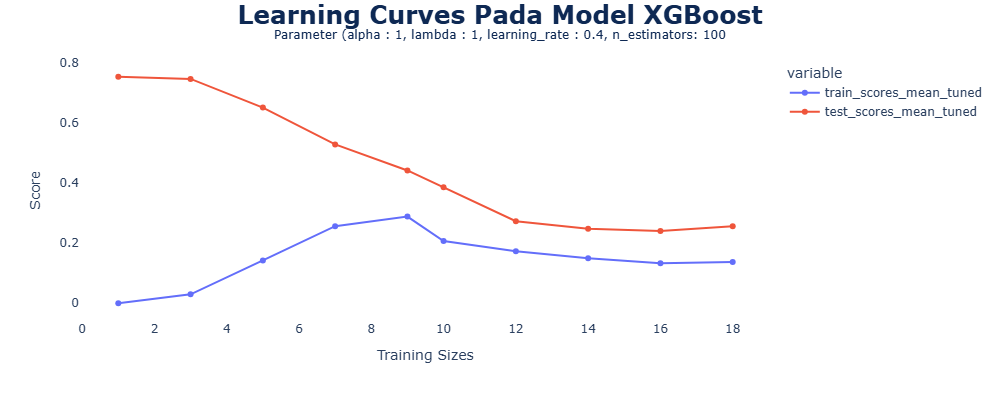

# Final Model

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42
)

membagi dataset menjadi data training dan data testing menggunakan fungsi train_test_split. Dengan pengaturan test_size=0.2, 80% data digunakan untuk melatih model, dan 20% lainnya untuk menguji performa model. Penggunaan random_state=42 memastikan pembagian data tetap konsisten setiap kali kode dijalankan. Hasil pembagian ini membantu mengevaluasi kinerja model pada data yang belum pernah dilihat sebelumnya, sehingga memungkinkan penilaian generalisasi model.

In [ ]:
# Import library yang dibutuhkan
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi scaler
min_max_scaler = [MinMaxScaler() for i in range(4)]

# Melakukan scaling
X_train_scaled = min_max_scaler[0].fit_transform(X_train)
y_train_scaled = min_max_scaler[1].fit_transform(y_train)
X_test_scaled = min_max_scaler[2].fit_transform(X_test)
y_test_scaled = min_max_scaler[3].fit_transform(y_test)

# Mengembalikan hasil scaling ke dalam DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
y_train_scaled = pd.DataFrame(y_train_scaled, columns = y_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
y_test_scaled = pd.DataFrame(y_test_scaled, columns = y_test.columns)

# Tampilkan hasilnya
display(X_train_scaled.head())

Coal support (Total - all activities)  \
0                               0.000000   
1                               0.389542   
2                               0.000000   
3                               0.389542   
4                               0.389542   

   Consumption of biomass (Total - all activities)  \
0                                         0.073338   
1                                         1.000000   
2                                         0.019862   
3                                         0.613445   
4                                         0.929717   

   Fossil fuel consumer support (Total - all activities)  \
0                                           1.000000       
1                                           0.575000       
2                                           1.000000       
3                                           0.575000       
4                                           0.575000       

   Renewable electricity generation (Total - all activities)  \
0                                           0.373485           
1                                           0.296970           
2                                           0.398485           
3                                           0.086364           
4                                           0.195455           

   Demand-based CO2 productivity, GDP per unit of energy-related CO2 emissions (Total - all activities)  
0                                           0.421053                                                     
1                                           0.000000                                                     
2                                           0.478469                                                     
3                                           0.057416                                                     
4                                           0.057416

melakukan normalisasi data pada X_train, y_train, X_test, dan y_test menggunakan MinMaxScaler untuk mengubah nilai-nilai menjadi skala antara 0 dan 1. Setiap bagian data (X_train, y_train, X_test, y_test) distandardisasi secara terpisah menggunakan scaler yang berbeda, dan hasilnya dikonversi kembali menjadi DataFrame agar lebih mudah dibaca. Langkah ini membantu meningkatkan kinerja model, terutama pada algoritma yang sensitif terhadap skala data.

rentang data menjadi 0 - 1

In [ ]:
# Buat objek XGBoost
modelXGB_tuned = XGBRegressor(
    objective = 'reg:squarederror',
    max_depth = 2,
    max_leaves = 2,
    reg_alpha = 1,
    reg_lambda = 1,
    learning_rate = 0.4,
    n_estimators = 100,

)

# Membuat model XGBoost
modelXGB_tuned.fit(X_train_scaled, y_train_scaled)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

melatih model XGBoost Regressor dengan parameter yang sudah diatur
1. objective='reg:squarederror': Menentukan tujuan model, yaitu untuk meminimalkan kesalahan kuadrat pada regresi.
2. max_depth=2: Mengatur kedalaman maksimum pohon keputusan menjadi 2, untuk menjaga model tetap sederhana dan mencegah overfitting.
3. max_leaves=2: Mengontrol jumlah maksimum daun dalam setiap pohon, membatasi kompleksitas pohon.
reg_alpha=1 dan reg_lambda=1: Menambahkan regulasi L1 dan L2 untuk mengurangi risiko overfitting dengan menghukum kompleksitas model.
4. learning_rate=0.4: Menentukan laju pembelajaran, yang mengendalikan seberapa besar setiap pohon baru yang ditambahkan mempengaruhi model. Nilai 0.4 membuat pembelajaran lebih agresif.
5. n_estimators=100: Jumlah pohon yang dibangun dalam model, yaitu 100, untuk menciptakan prediksi yang lebih stabil.

data ini disesuaikan dengan learning curve terbaik pada hyperparameter turning

In [ ]:
from sklearn.metrics import mean_absolute_error

# Make predictions on the test set
y_pred = modelXGB_tuned.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error
mae = mean_absolute_error(y_test_scaled, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 0.23


menghitung Mean Absolute Error (MAE) antara hasil prediksi (y_pred) dan data aktual (y_test_scaled). Nilai MAE sebesar 0.23 menunjukkan bahwa, rata-rata, prediksi model meleset sekitar 0.23 unit dari nilai sebenarnya. Semakin kecil nilai MAE, semakin baik kinerja model dalam membuat prediksi yang akurat pada data testing.

In [ ]:
hasil_prediksi = pd.DataFrame({
     'y_test_scaled' : y_test_scaled['Non-Renewable Energy Consumption'],
     'y_pred_scaled' : y_pred.flatten(),
     'y_test' : min_max_scaler[3].inverse_transform(y_test_scaled).flatten(),
     'y_pred' : min_max_scaler[3].inverse_transform([y_pred]).flatten()
})

hasil_prediksi['selisih_scaled'] = abs(hasil_prediksi['y_test_scaled'] - hasil_prediksi['y_pred_scaled'])
hasil_prediksi['selisih_asli'] = abs(hasil_prediksi['y_test'] - hasil_prediksi['y_pred'])

hasil_prediksi

y_test_scaled  y_pred_scaled    y_test    y_pred  selisih_scaled  \
0       1.000000       0.791623 91.540000 89.341621        0.208377   
1       0.957346       0.791623 91.090000 89.341621        0.165723   
2       0.000000       0.404088 80.990000 85.253128        0.404088   
3       0.901422       0.686094 90.500000 88.228287        0.215328   
4       0.931754       0.791623 90.820000 89.341621        0.140131   

   selisih_asli  
0      2.198379  
1      1.748379  
2      4.263128  
3      2.271713  
4      1.478379

Tabel ini menunjukkan hasil perbandingan antara nilai asli (y_test) dan nilai prediksi (y_pred) dari model, baik dalam bentuk yang sudah diskalakan (y_test_scaled, y_pred_scaled) maupun dalam bentuk asli. Kolom selisih_scaled dan selisih_asli menunjukkan perbedaan antara nilai asli dan prediksi dalam kedua skala. Hasil ini menunjukkan bahwa prediksi model cukup mendekati nilai sebenarnya, dengan selisih kecil di sebagian besar baris, mencerminkan performa model yang cukup akurat.

In [ ]:
hasil_prediksi[['selisih_scaled', 'selisih_asli']].describe()

selisih_scaled  selisih_asli
count        5.000000      5.000000
mean         0.226729      2.391995
std          0.103856      1.095677
min          0.140131      1.478379
25%          0.165723      1.748379
50%          0.208377      2.198379
75%          0.215328      2.271713
max          0.404088      4.263128

In [ ]:
modelXGB_tuned.feature_names_in_
modelXGB_tuned.feature_importances_

array([0., 1., 0., 0., 0.], dtype=float32)

Hasil array([0., 1., 0., 0., 0.], dtype=float32) menunjukkan bahwa dari lima fitur yang ada, hanya satu fitur yang memiliki kontribusi signifikan terhadap prediksi model, dengan nilai penting 1. Fitur ini adalah fitur kedua, sementara fitur lainnya tidak memberikan kontribusi sama sekali (nilai pentingnya 0). Ini mengindikasikan bahwa model sangat bergantung pada satu fitur tersebut untuk menghasilkan prediksi, sementara fitur lainnya tidak memberikan informasi tambahan yang berguna dalam proses prediksi.

In [ ]:
# feature encoding
data_china = pd.get_dummies(data_china, columns=['reference_area'])
data_china.head()

time_period  Adjustment for pollution abatement (Total - all activities)  \
0         2000                                              -0.04             
1         2001                                              -0.41             
2         2002                                              -0.99             
3         2003                                              -1.51             
4         2004                                              -1.51             

   CO2 emissions from air transport per capita (Total - all activities)  \
0                                              57.04                      
1                                              57.04                      
2                                              57.04                      
3                                              57.04                      
4                                              57.04                      

   CO2 emissions from air transport per unit of GDP (Total - all activities)  \
0                                               4.16                           
1                                               4.16                           
2                                               4.16                           
3                                               4.16                           
4                                               4.16                           

   Coal support (Total - all activities)  \
0                                  19.79   
1                                  19.79   
2                                  19.79   
3                                  19.79   
4                                  19.79   

   Consumption of biomass (Total - all activities)  \
0                                            27.17   
1                                            26.17   
2                                            25.25   
3                                            22.77   
4                                            22.03   

   Consumption of metals (Total - all activities)  \
0                                            6.19   
1                                            6.22   
2                                            6.46   
3                                            6.82   
4                                            7.47   

   Consumption of non-metallic minerals (Total - all activities)  \
0                                              66.64               
1                                              67.61               
2                                              68.30               
3                                              70.41               
4                                              70.49               

   Contribution of natural capital (Total - all activities)  \
0                                               0.05          
1                                               0.04          
2                                               0.08          
3                                               0.19          
4                                               0.39          

   Demand-based CO2 emissions (Total - all activities)  \
0                                            1422.98     
1                                            1515.45     
2                                            1622.61     
3                                            1804.77     
4                                            2005.74     

   Demand-based CO2 intensity energy-related CO2 per capita (Total - all activities)  \
0                                               2.13                                   
1                                               2.25                                   
2                                               2.40                                   
3                                               2.65                                   
4                                               2.93                                   

   Demand-based CO2 p

In [ ]:
desc = data_china.describe()
q1 = desc.loc["25%"]
q3 = desc.loc["75%"]
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Clipping seluruh kolom numerik secara langsung
data_china = data_china.clip(lower=lower_bound, upper=upper_bound, axis=1)

data_china.head()

time_period  Adjustment for pollution abatement (Total - all activities)  \
0         2000                                              -0.41             
1         2001                                              -0.41             
2         2002                                              -0.99             
3         2003                                              -1.18             
4         2004                                              -1.18             

   CO2 emissions from air transport per capita (Total - all activities)  \
0                                              57.04                      
1                                              57.04                      
2                                              57.04                      
3                                              57.04                      
4                                              57.04                      

   CO2 emissions from air transport per unit of GDP (Total - all activities)  \
0                                               4.16                           
1                                               4.16                           
2                                               4.16                           
3                                               4.16                           
4                                               4.16                           

   Coal support (Total - all activities)  \
0                                  19.79   
1                                  19.79   
2                                  19.79   
3                                  19.79   
4                                  19.79   

   Consumption of biomass (Total - all activities)  \
0                                            27.17   
1                                            26.17   
2                                            25.25   
3                                            22.77   
4                                            22.03   

   Consumption of metals (Total - all activities)  \
0                                            6.19   
1                                            6.22   
2                                            6.46   
3                                            6.82   
4                                            7.47   

   Consumption of non-metallic minerals (Total - all activities)  \
0                                              66.64               
1                                              67.61               
2                                              68.30               
3                                              70.41               
4                                              70.49               

   Contribution of natural capital (Total - all activities)  \
0                                               0.05          
1                                               0.04          
2                                               0.08          
3                                               0.19          
4                                               0.39          

   Demand-based CO2 emissions (Total - all activities)  \
0                                            1422.98     
1                                            1515.45     
2                                            1622.61     
3                                            1804.77     
4                                            2005.74     

   Demand-based CO2 intensity energy-related CO2 per capita (Total - all activities)  \
0                                               2.13                                   
1                                               2.25                                   
2                                               2.40                                   
3                                               2.65                                   
4                                               2.93                                   

   Demand-based CO2 p